# MIDTERM PROJECT PETE 686

## Team Members

### 1. Sri Naga Sai Gopala Krishna Kala
### 2. Nandini Shankar

## Task 1

## Identifying and imputing missing data before train-test-split

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Shale_Gas.csv')

In [3]:
#df.drop('FirstProdDate', axis =1, inplace = True)

In [4]:
df.head()

Operator     TD    TVD  TotalFluid  TotalProppant  TopPerf  BottomPerf  \
0        P  16098  10101    173409.2      6226000.0    10445       15916   
1        P  16927  10088    210602.0      7260000.0    10166       15916   
2        P  14511   9735    147372.7      4438660.0    10068       14300   
3        P  15161   9721    167104.9      5415940.0    10154       14945   
4        P  15153   9823    169611.9      5419180.0    10232       14905   

  FluidType  LateralLength  ChokeTopDescription  ...  Porosity  \
0      SLKW        4051.50              0.25000  ...    0.0819   
1      SLKW        4590.00              0.25000  ...    0.0819   
2      SLKW        3212.25              0.25000  ...    0.1200   
3      SLKW        3635.25              0.21875  ...    0.1200   
4      SLKW        3570.75              0.25000  ...    0.1200   

   TotalGasBCFPerSection  Temperature     Pressure     KOP  FirstProdDate  \
0                75.2214       280.40  8009.190909  1400.0           2016   
1                75.2214       280.40  8009.190909  4423.5           2016   
2               189.2644       266.64  7328.196000  4548.0           2014   
3               189.2644       266.64  7328.196000  4402.0           2014   
4               190.2331       267.68  7378.914909  4502.0           2014   

   minLateralSpacing  numOfOffsetLateralSpacingWells       EUR           IP  
0        2631.552728                               1  10500000  4311.304105  
1        1308.706458                               2   9800000  4174.570115  
2        1512.592043                               1  13800000  5208.021675  
3        1467.752020                               2  14800000  5596.057143  
4        1468.171250                               1  12300000  5024.213793  

[5 rows x 28 columns]

In [5]:
df.describe()

TD           TVD     TotalFluid  TotalProppant       TopPerf  \
count    185.000000    185.000000     180.000000   1.820000e+02    185.000000   
mean   17255.367568  10373.994595  238768.429611   1.065082e+07  10683.897297   
std     1594.211971    886.740523  132147.315357   5.207726e+06    988.571848   
min    13596.000000   8604.000000   57243.860000   7.150000e+05   8720.000000   
25%    15953.000000   9757.000000  147320.900000   5.932182e+06  10112.000000   
50%    17155.000000  10168.000000  183113.200000   1.023100e+07  10486.000000   
75%    18206.000000  10767.000000  305605.300000   1.404600e+07  11016.000000   
max    21594.000000  13000.000000  711477.100000   2.661400e+07  17603.000000   

         BottomPerf  LateralLength  ChokeTopDescription  MaxFlowingPSI  \
count    185.000000     184.000000           185.000000     185.000000   
mean   16982.264865    4829.658872             4.320861    4622.167568   
std     1589.276462    1184.334717            38.159769    1231.230027   
min    12510.000000    1122.750000             0.187500      15.000000   
25%    15661.000000    3831.750000             0.250000    4095.000000   
50%    16907.000000    4831.125000             0.343750    4575.000000   
75%    17853.000000    5739.937500             0.375000    5056.000000   
max    21075.000000    8415.000000           368.593750    8204.000000   

       MaxShutinPSI  ...    Porosity  TotalGasBCFPerSection  Temperature  \
count    177.000000  ...  185.000000             185.000000   185.000000   
mean    5575.000000  ...    0.101601             127.452912   277.732649   
std     1106.543621  ...    0.018331              52.630402    17.641534   
min     2400.000000  ...    0.048800              54.685100   243.540000   
25%     4792.000000  ...    0.095500              75.182000   264.000000   
50%     5435.000000  ...    0.106000             124.120600   272.620000   
75%     6248.000000  ...    0.116800             180.412000   285.320000   
max     9350.000000  ...    0.120600             190.662400   328.420000   

           Pressure          KOP  FirstProdDate  minLateralSpacing  \
count    185.000000   182.000000     185.000000         159.000000   
mean    7893.087711  4146.403956    2016.275676        1240.211989   
std      904.298402  1448.469604       1.163159         347.414411   
min     6233.334750   595.500000    2014.000000         445.397387   
25%     7200.000000  4259.500000    2015.000000         982.736044   
50%     7621.508205  4641.750000    2016.000000        1261.086161   
75%     8257.908091  5042.375000    2017.000000        1355.496604   
max    10554.305480  6215.500000    2018.000000        2745.700244   

       numOfOffsetLateralSpacingWells           EUR            IP  
count                      185.000000  1.850000e+02    185.000000  
mean                         1.340541  1.034649e+07   8559.237912  
std                          0.713023  4.174170e+06   3316.253229  
min                          0.000000  1.800000e+06   3353.632184  
25%                          1.000000  7.400000e+06   5646.551724  
50%                          1.000000  9.800000e+06   8302.561248  
75%                          2.000000  1.310000e+07  10878.493270  
max                          2.000000  2.400000e+07  19330.525120  

[8 rows x 26 columns]

In [6]:
df.isna().any(axis = 0)

Operator                          False
TD                                False
TVD                               False
TotalFluid                         True
TotalProppant                      True
TopPerf                           False
BottomPerf                        False
FluidType                          True
LateralLength                      True
ChokeTopDescription               False
MaxFlowingPSI                     False
MaxShutinPSI                       True
FlowGas                           False
FlowWater                          True
SurfaceX                          False
SurfaceY                          False
Z_BelowSurface                    False
Isopach                           False
Porosity                          False
TotalGasBCFPerSection             False
Temperature                       False
Pressure                          False
KOP                                True
FirstProdDate                     False
minLateralSpacing                  True


##### Plotting the features in the Shale_Gas dataset

In [7]:
from sklearn.preprocessing import LabelEncoder

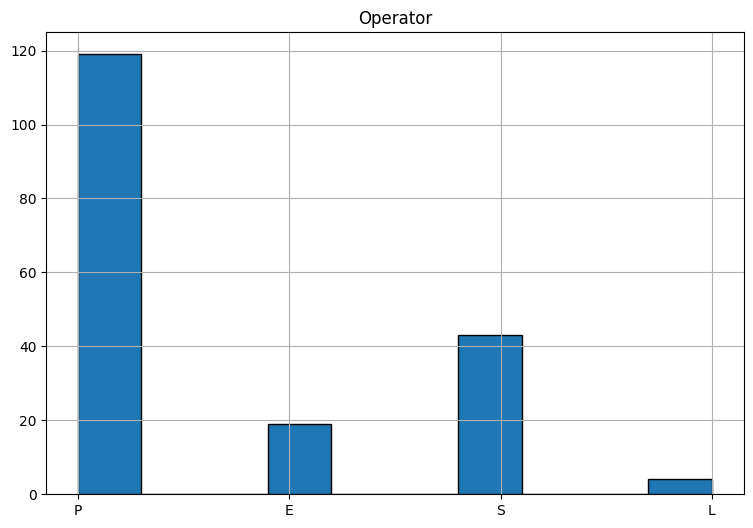

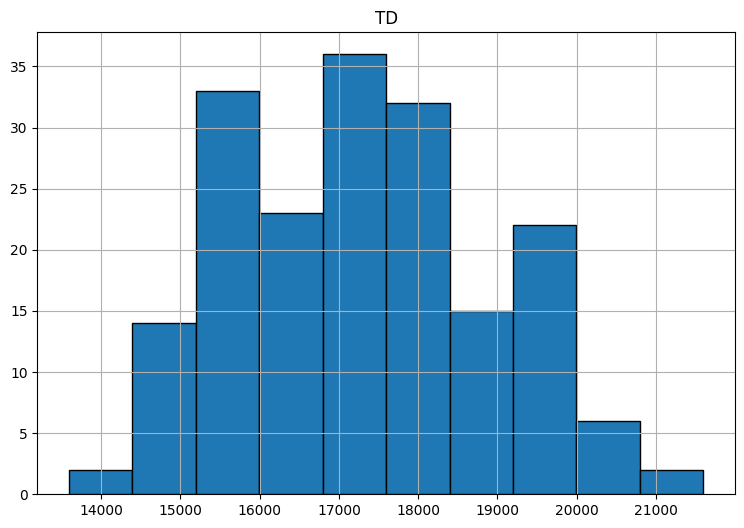

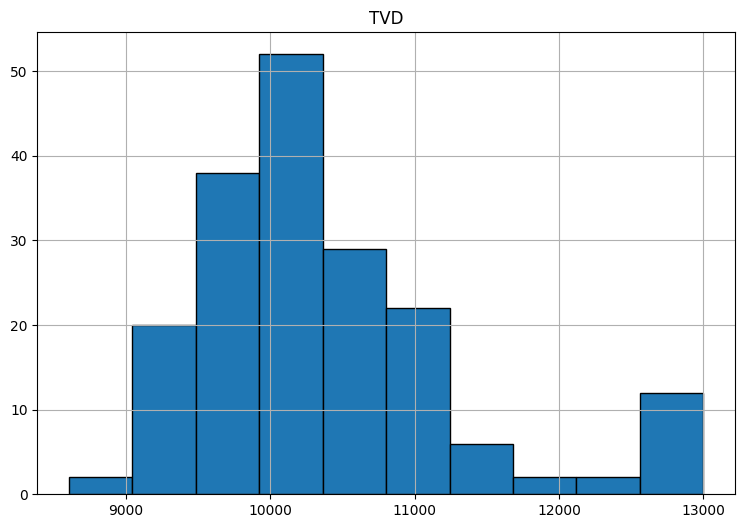

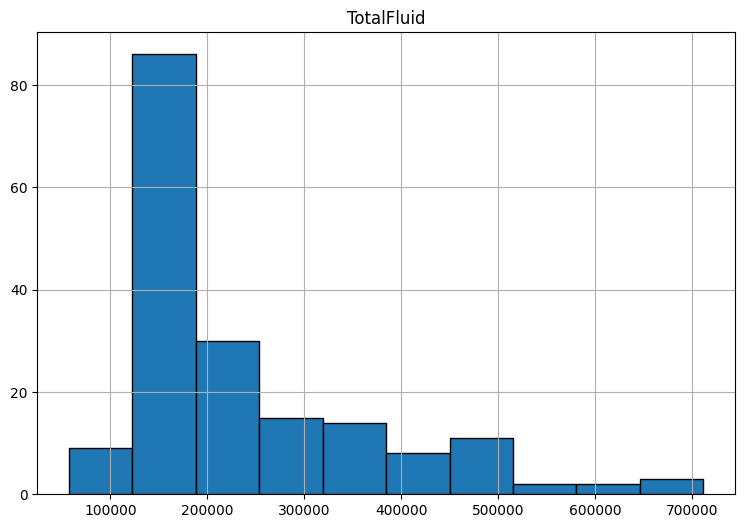

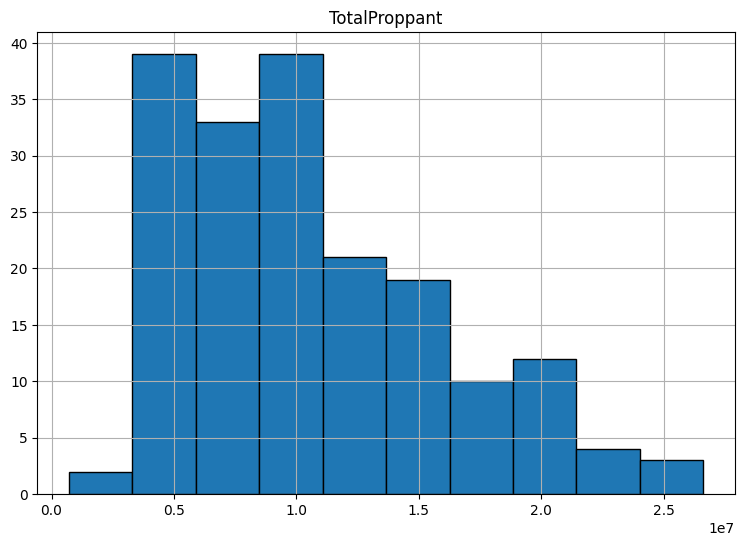

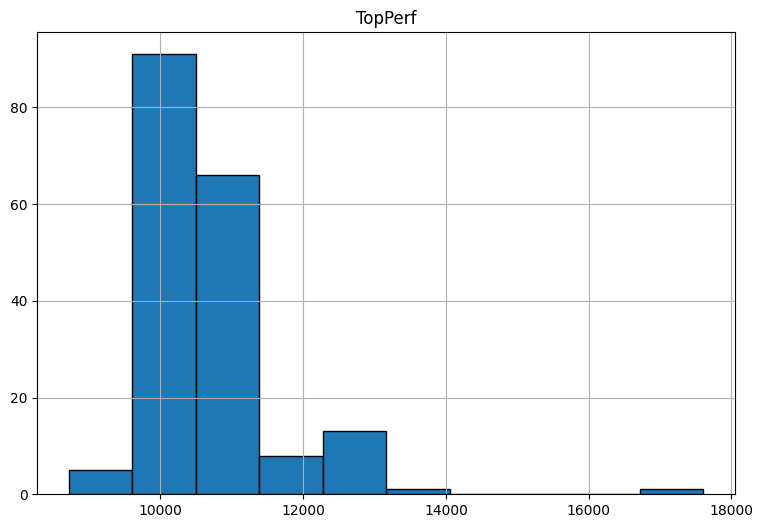

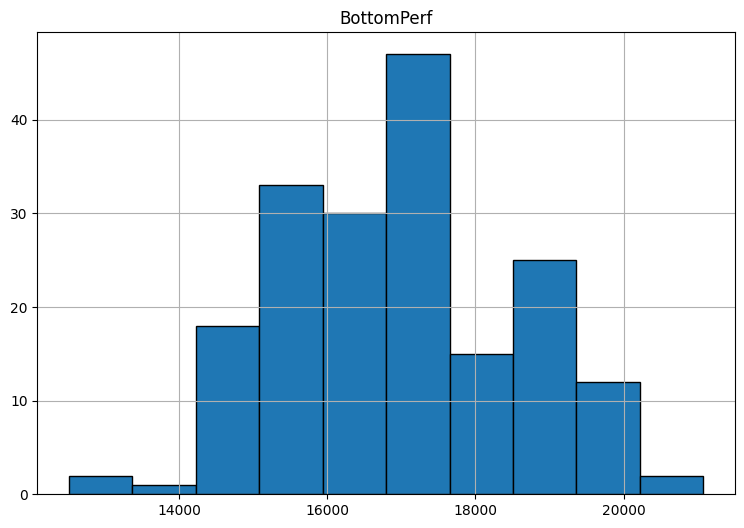

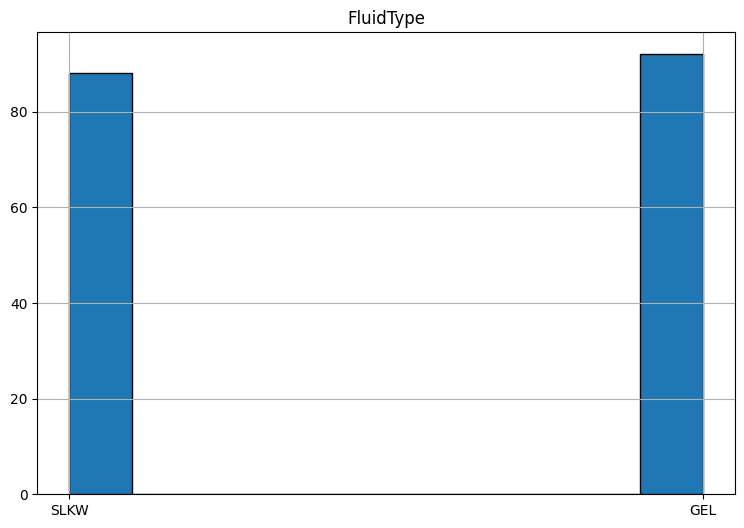

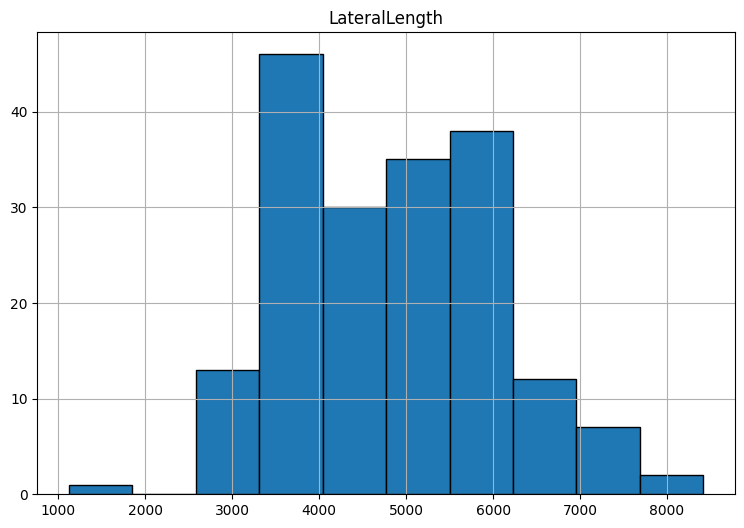

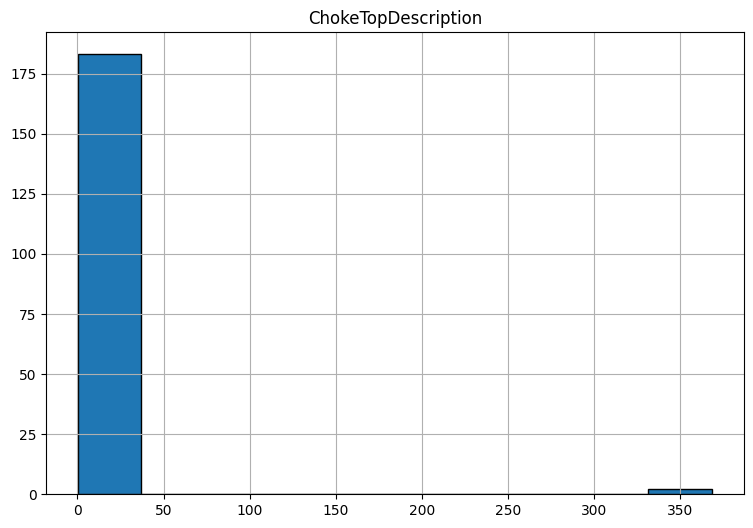

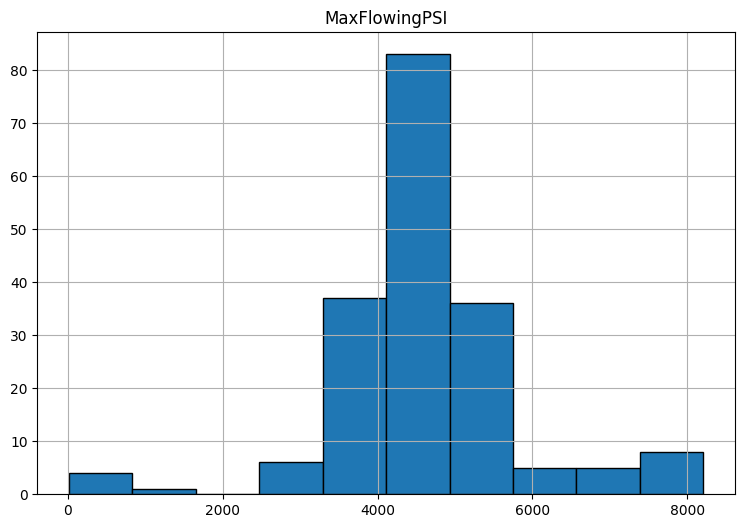

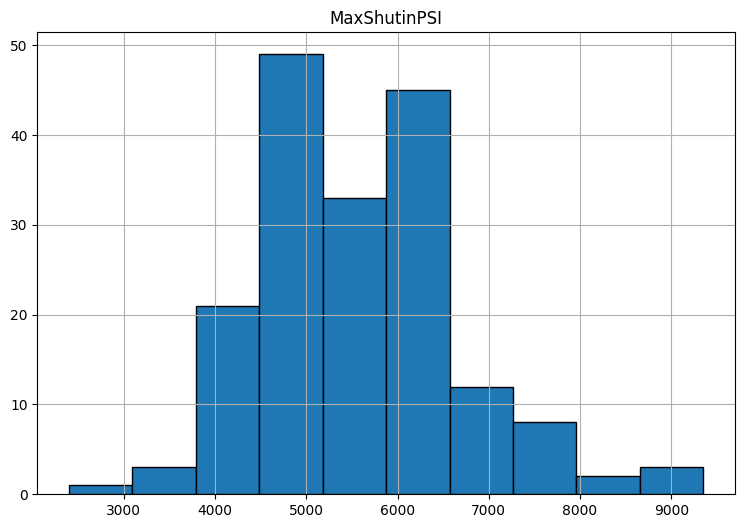

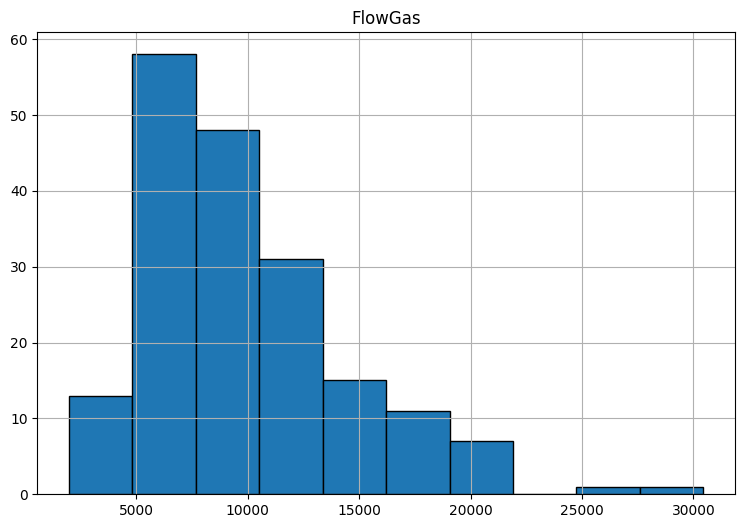

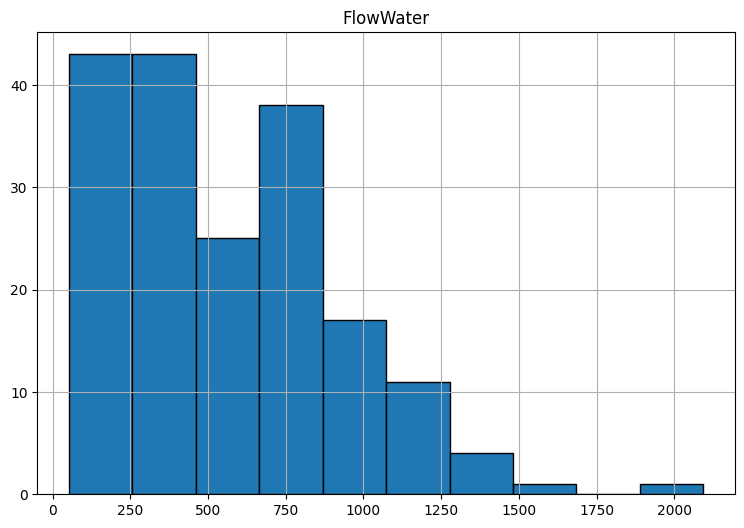

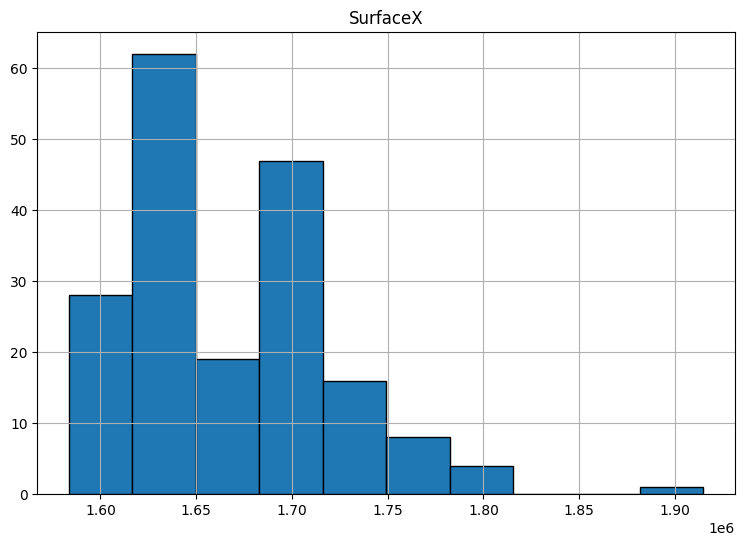

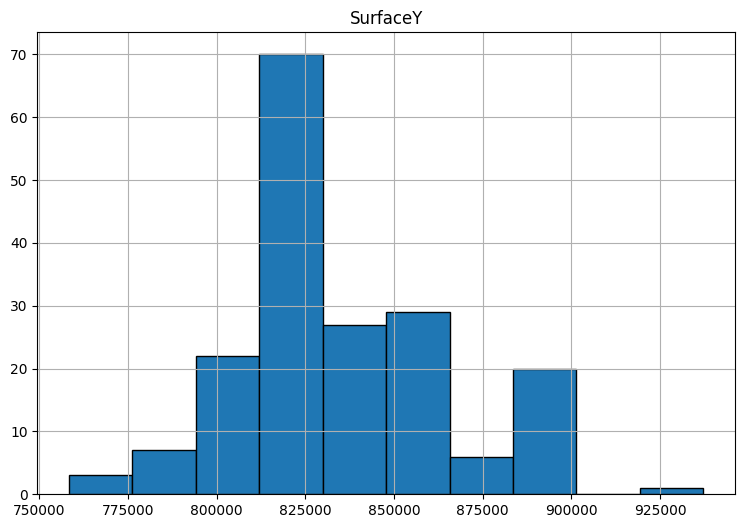

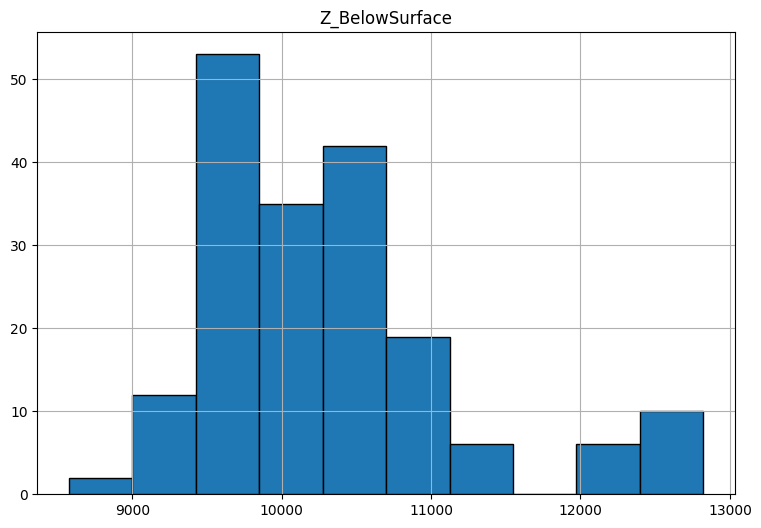

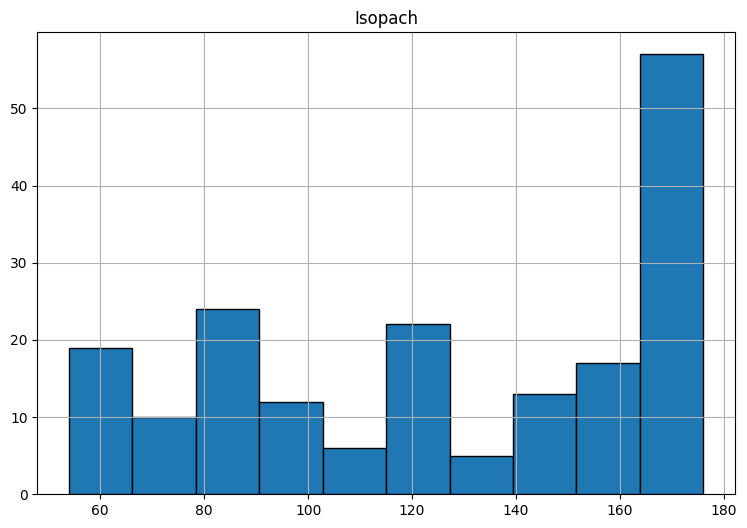

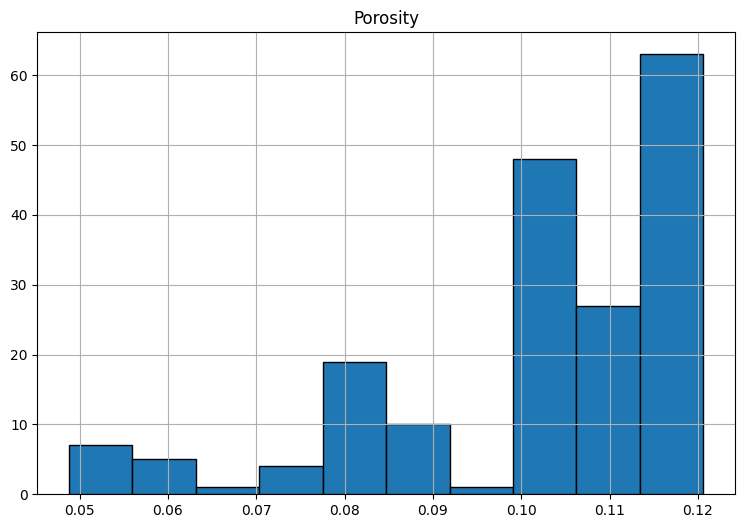

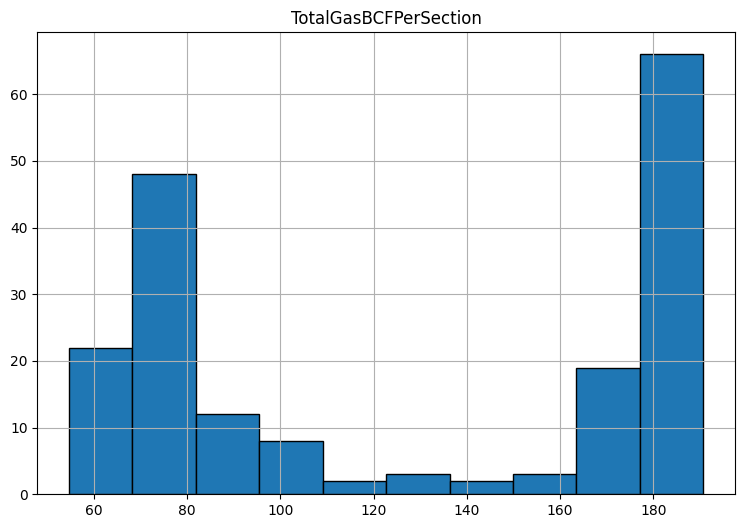

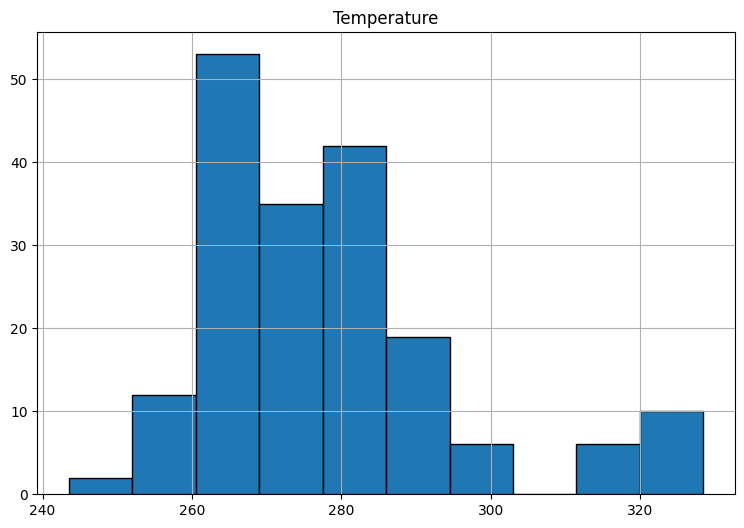

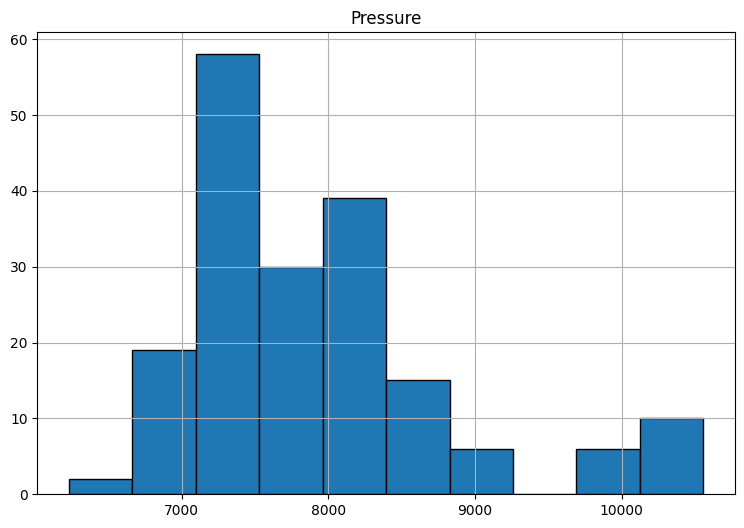

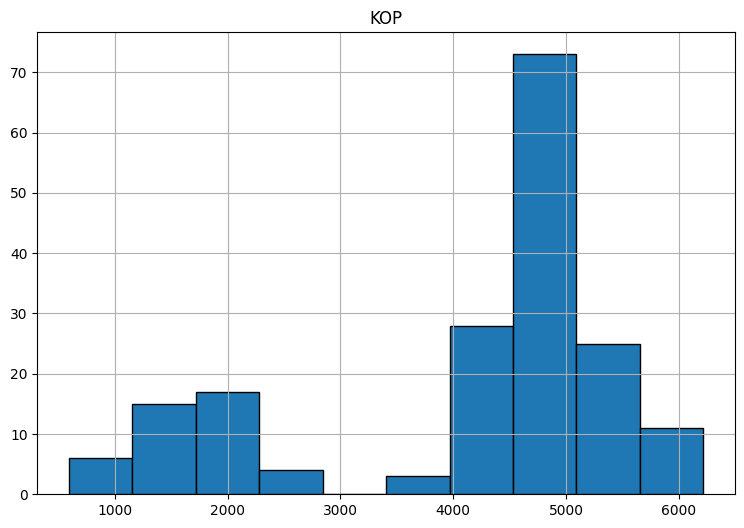

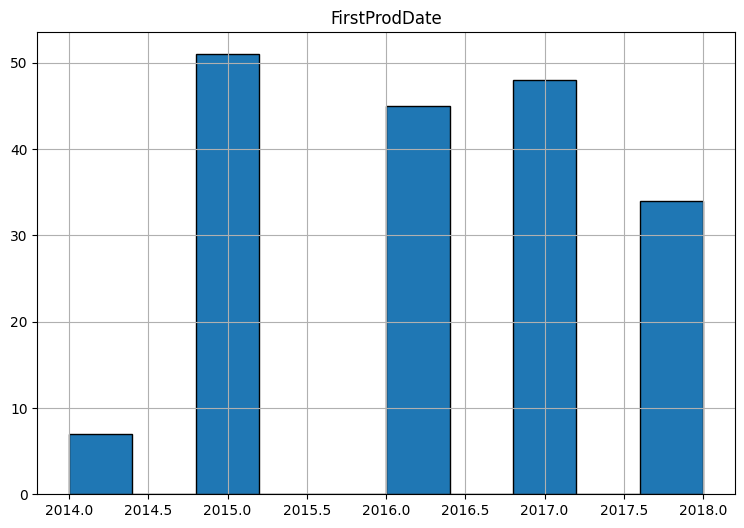

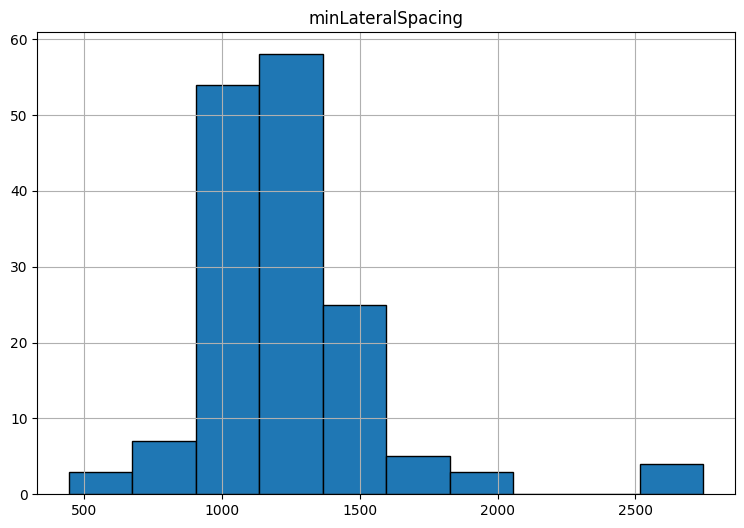

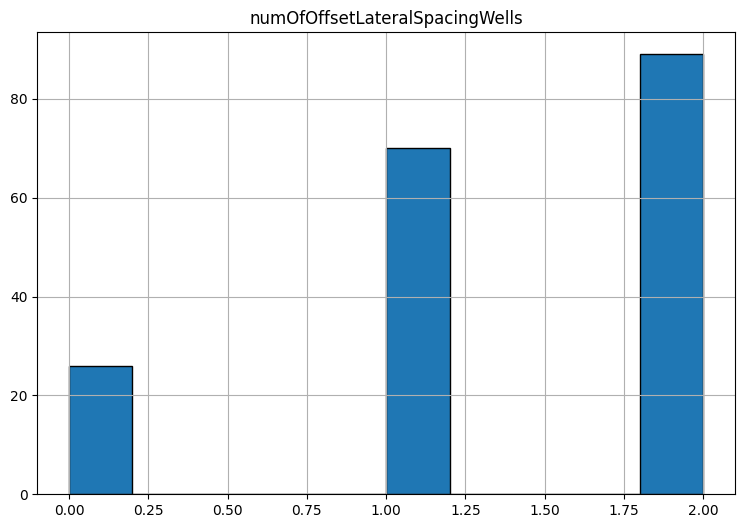

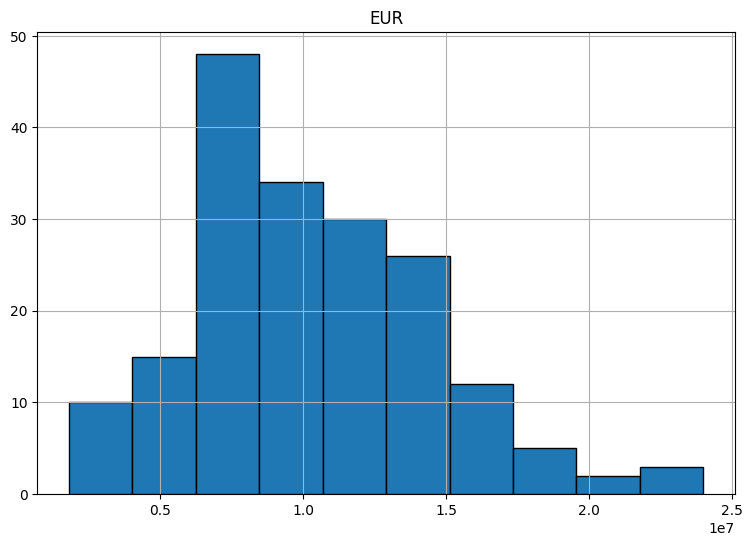

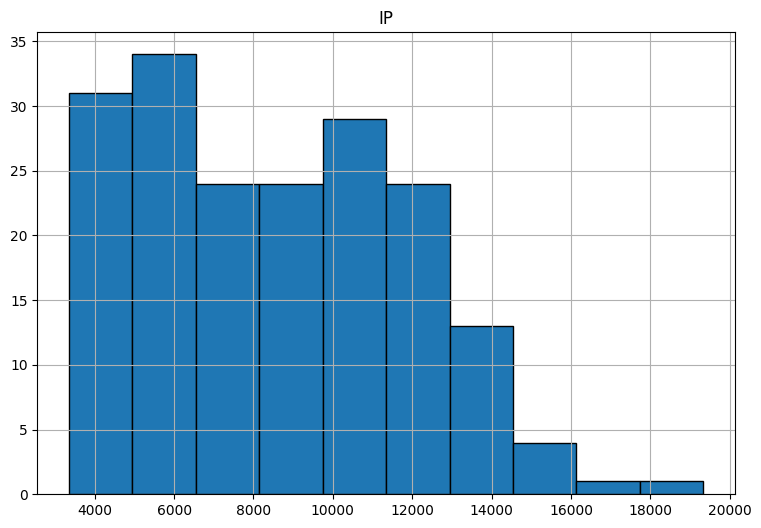

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

for column in df.columns:
    plt.figure(figsize=(9, 6))
    #sns.histplot(df[column], kde=True)
    df[column].hist(edgecolor='black')
    plt.title(column)
    plt.show()

#### The dataset has been plotted as a histogram for each feature to understand how the data has been distributed

##### Data pre-processing (one-hot encoding) step to convert non-interger values into integer values. This is done on 'operator' and 'fluidType'

In [9]:
label_encoder=LabelEncoder()
df['Operator']=label_encoder.fit_transform(df['Operator'])

In [10]:
df['Operator'].head(15)

0     2
1     2
2     2
3     2
4     2
5     2
6     2
7     0
8     0
9     2
10    2
11    3
12    2
13    2
14    2
Name: Operator, dtype: int32

In [11]:
df['FluidType']=label_encoder.fit_transform(df['FluidType'])

In [12]:
df['FluidType'].head(15)

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     0
8     0
9     1
10    1
11    0
12    1
13    1
14    1
Name: FluidType, dtype: int32

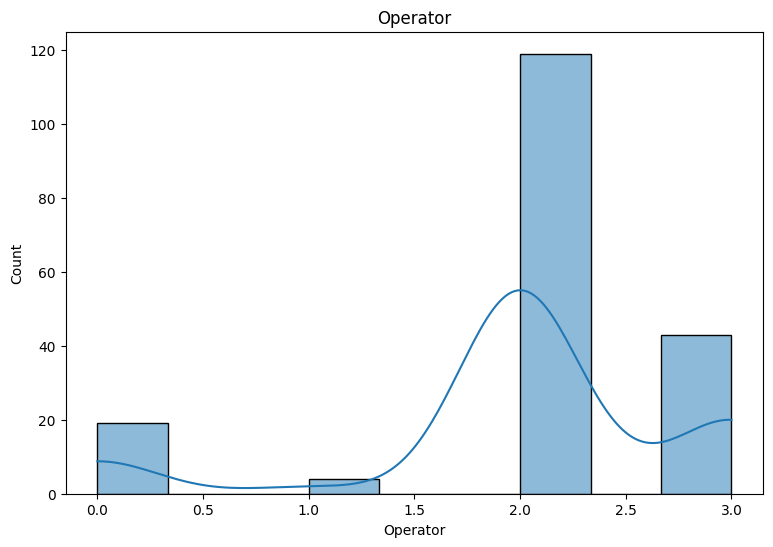

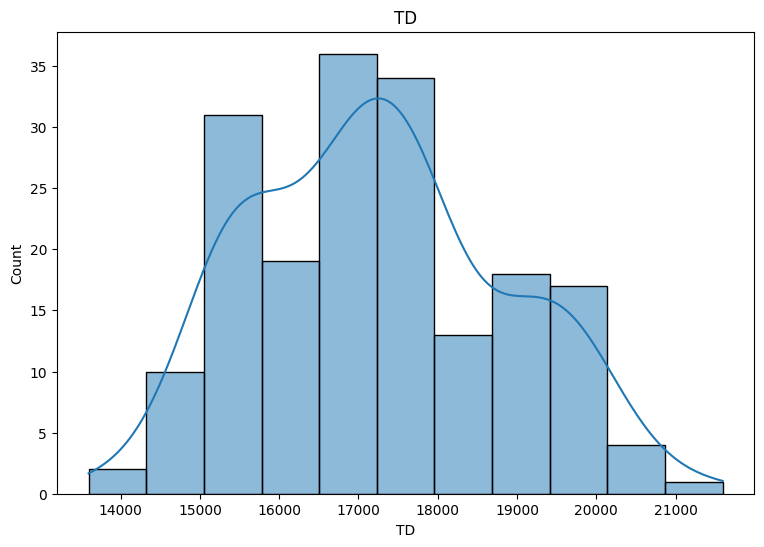

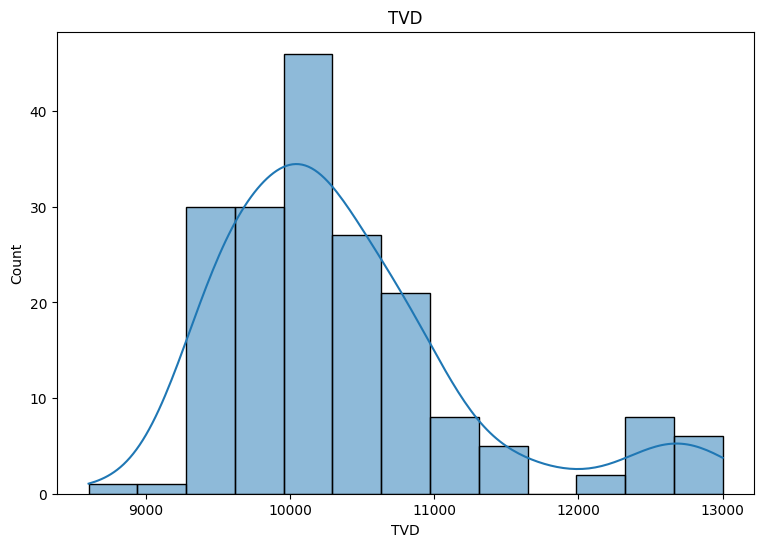

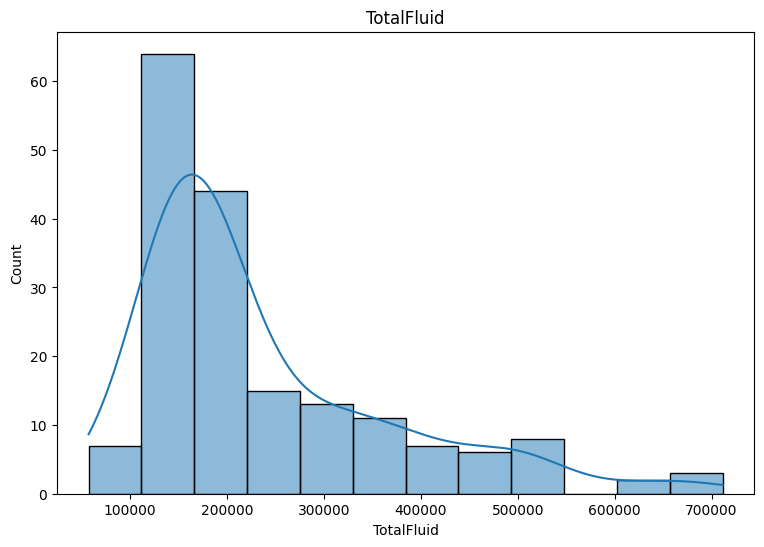

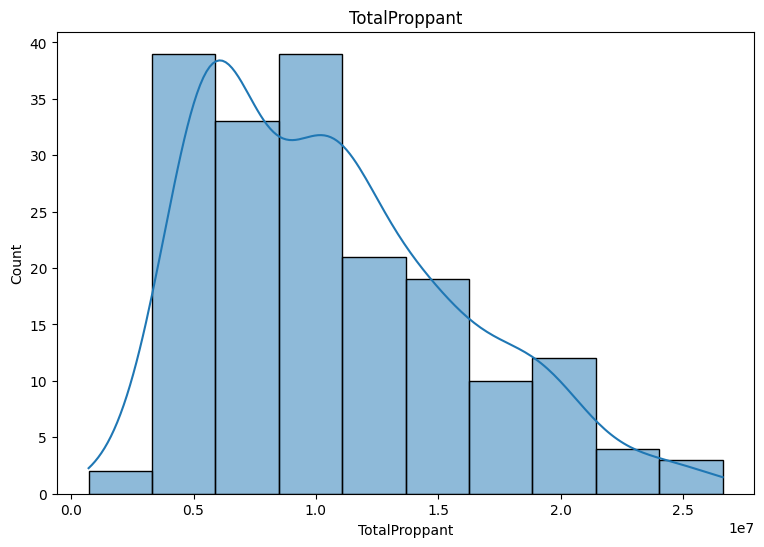

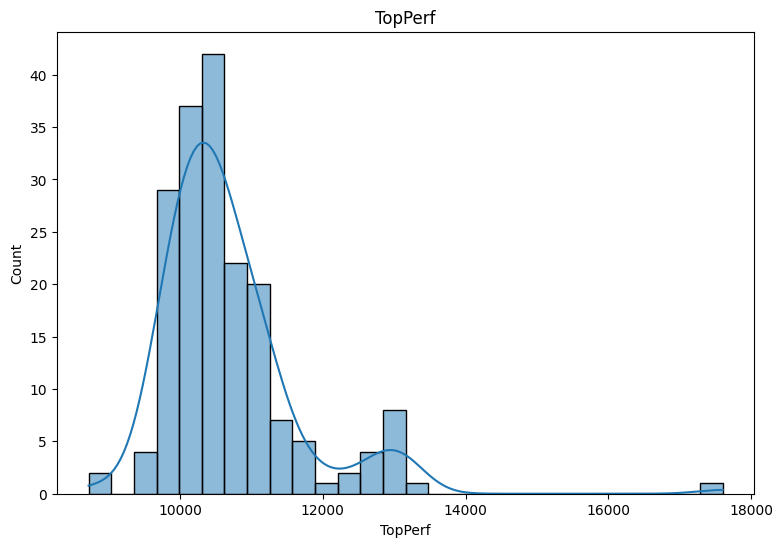

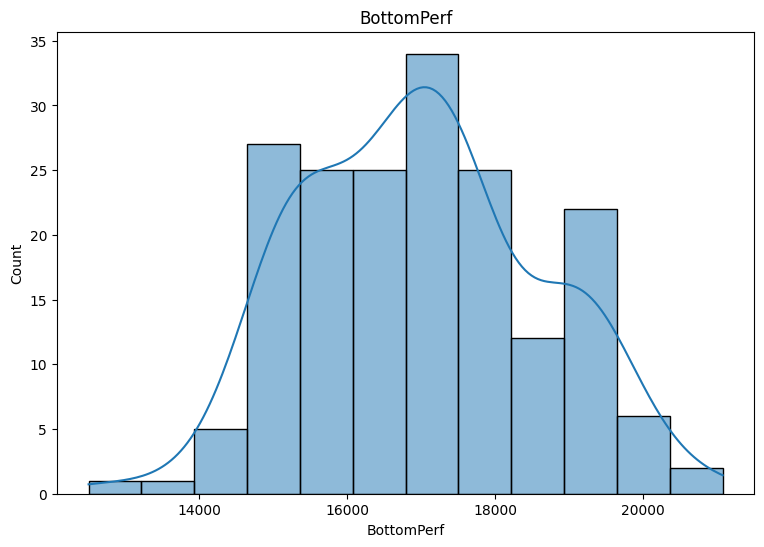

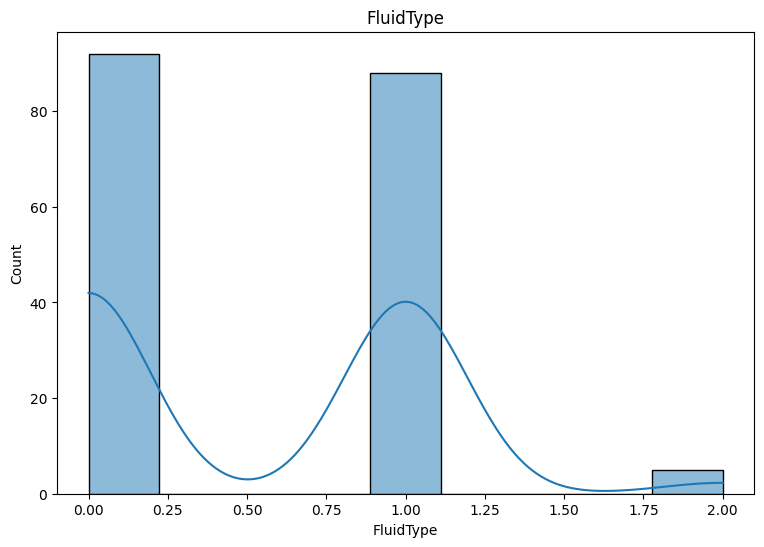

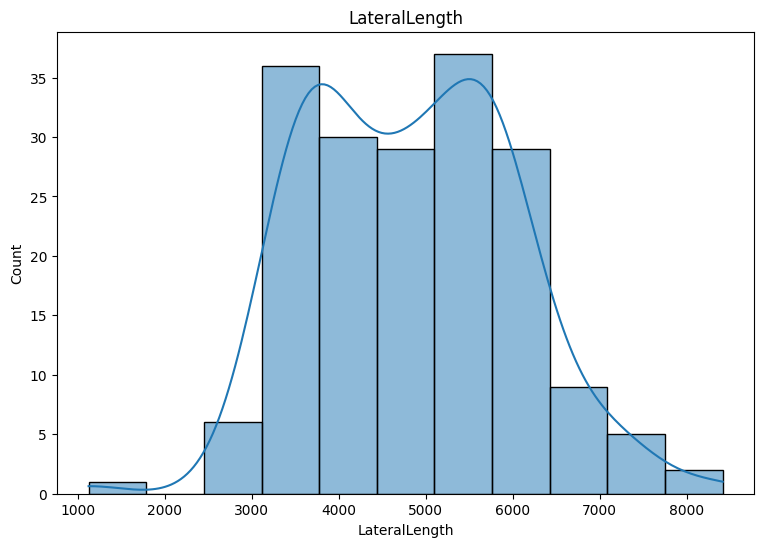

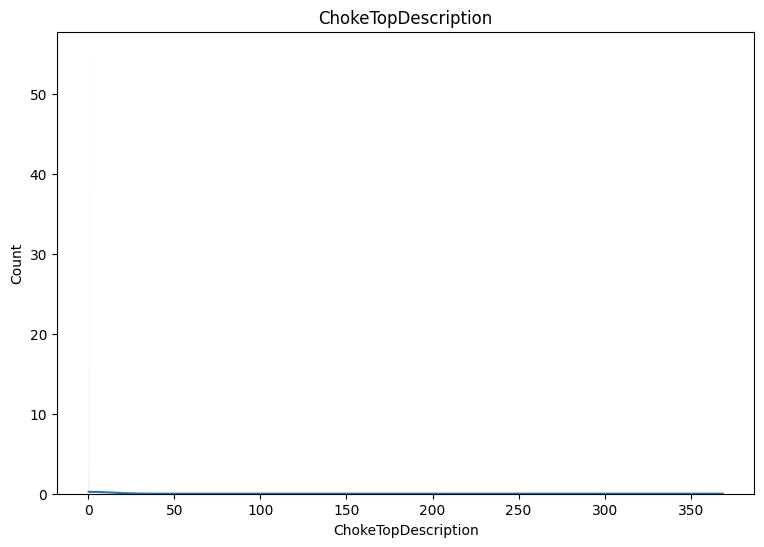

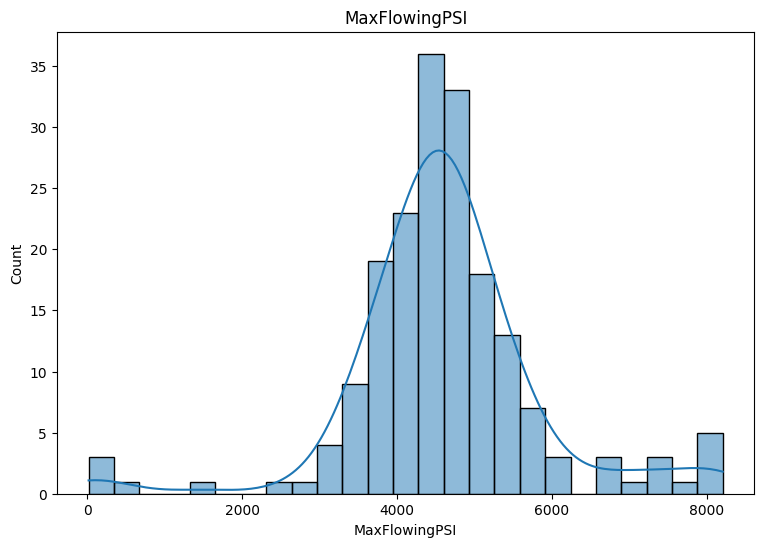

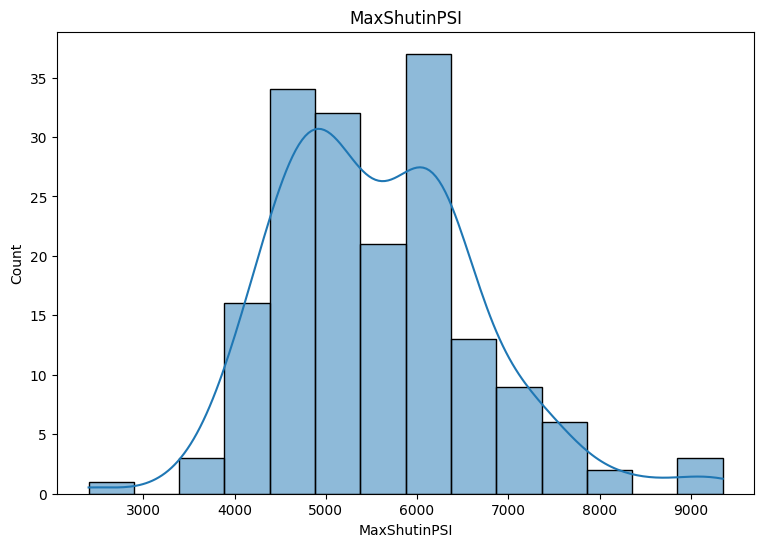

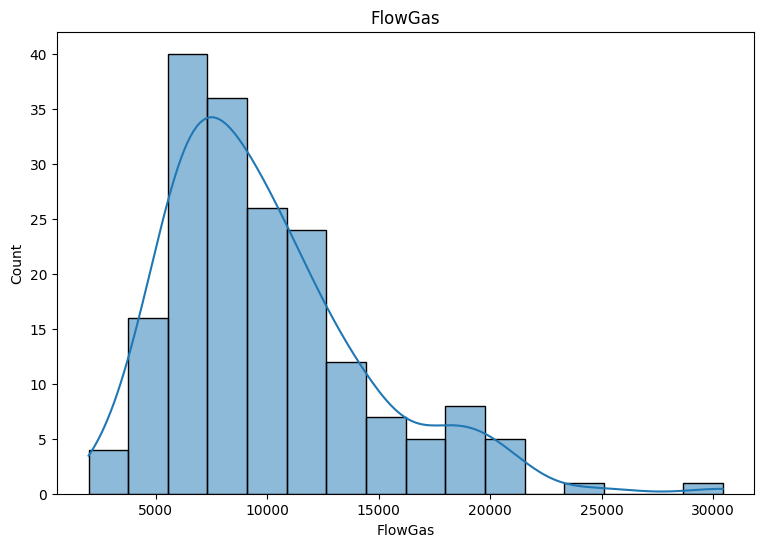

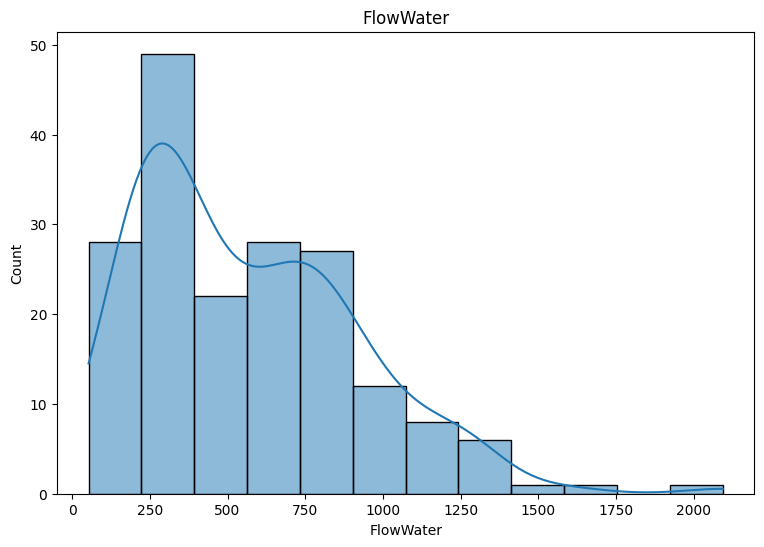

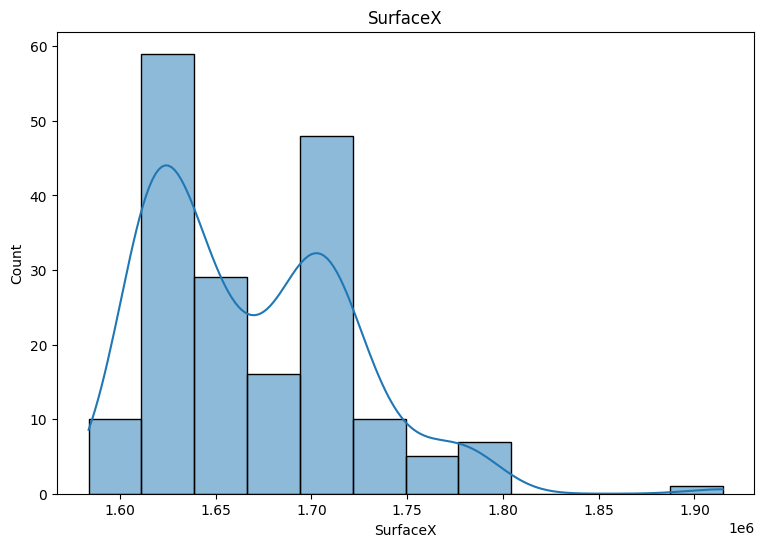

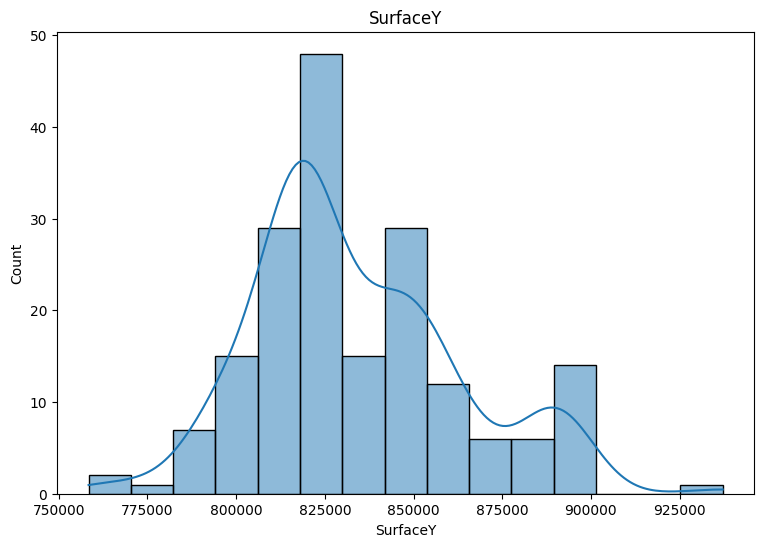

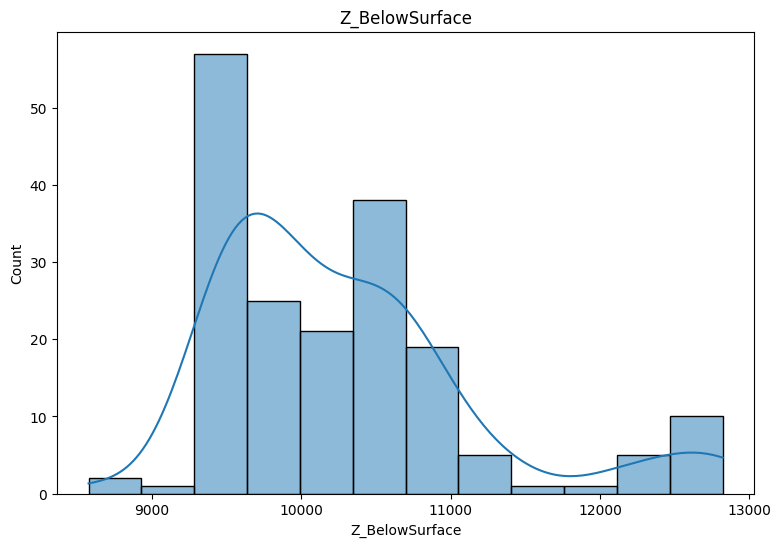

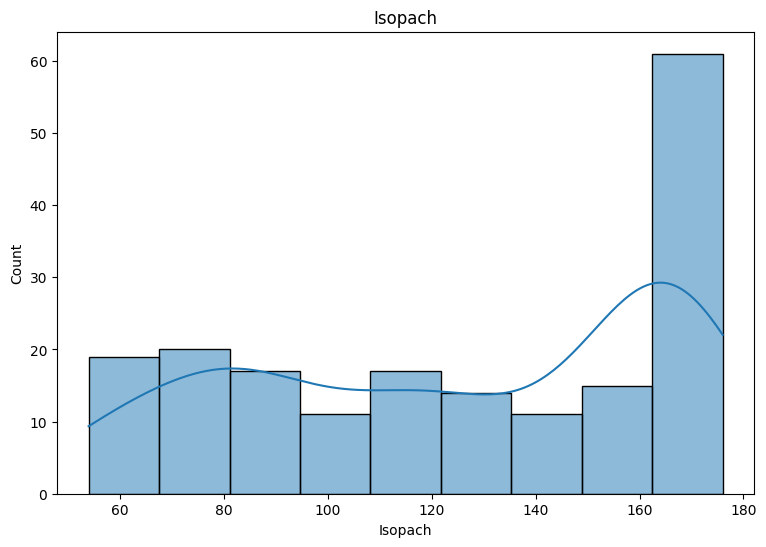

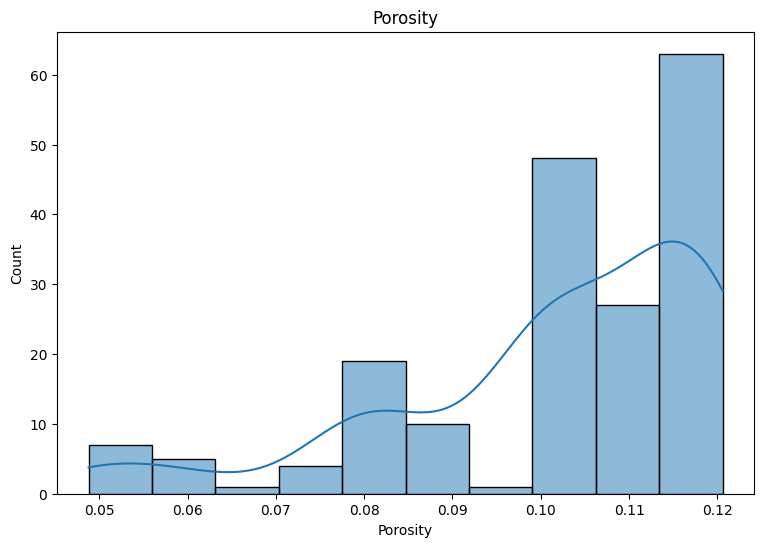

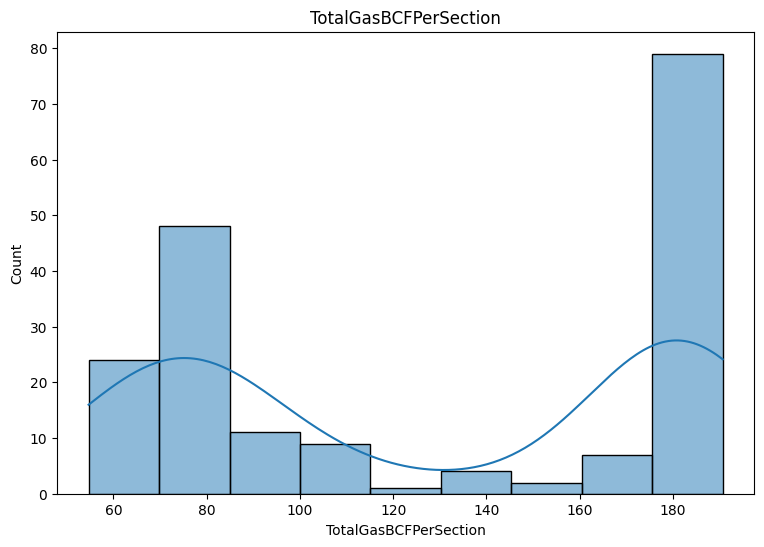

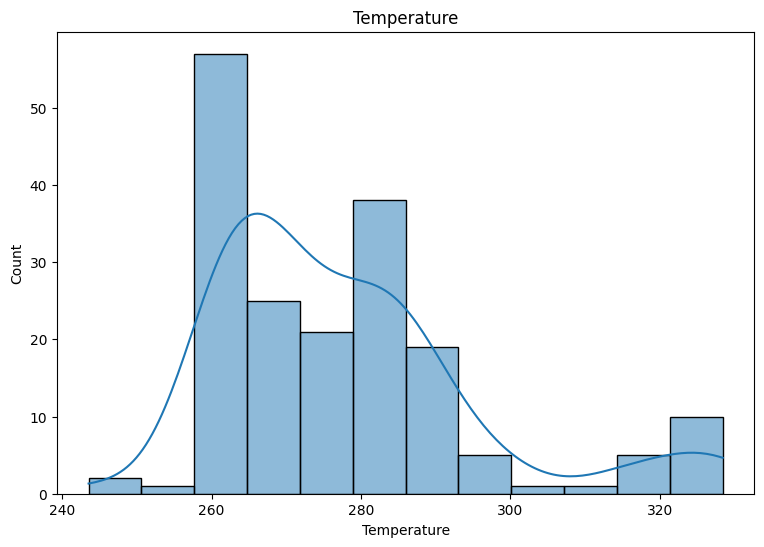

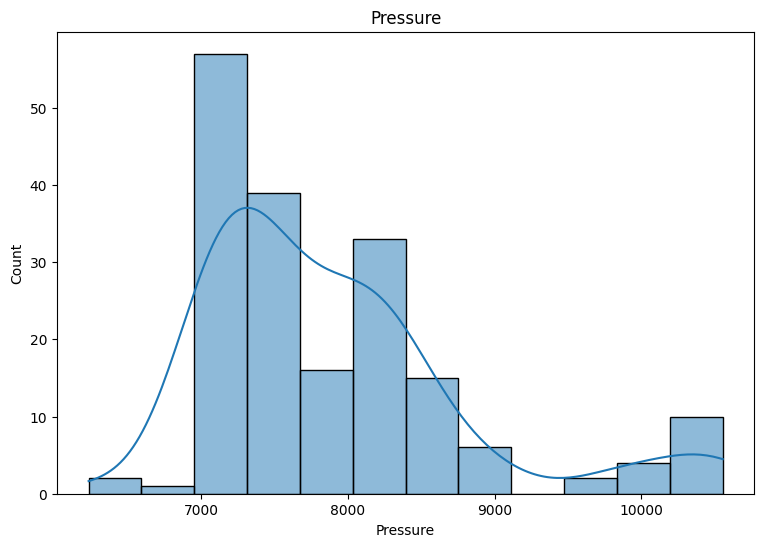

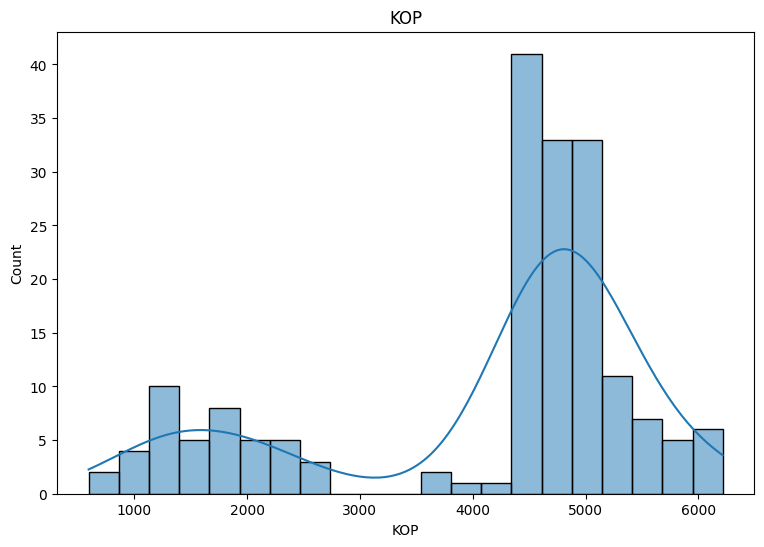

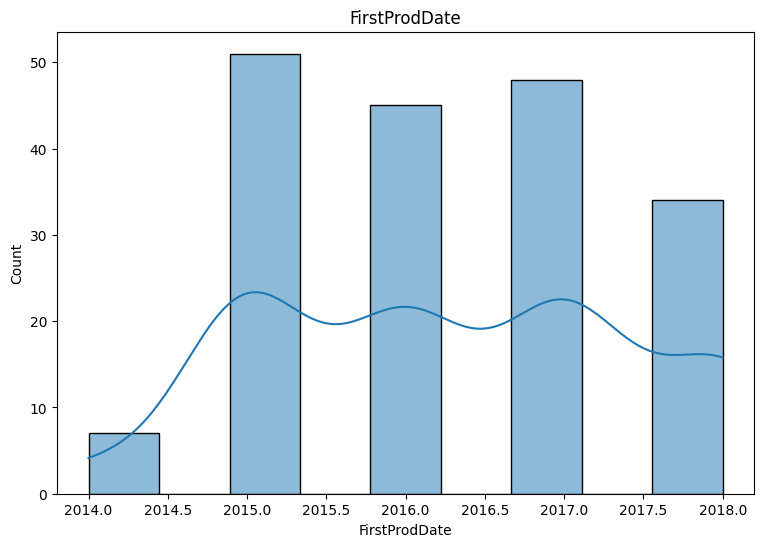

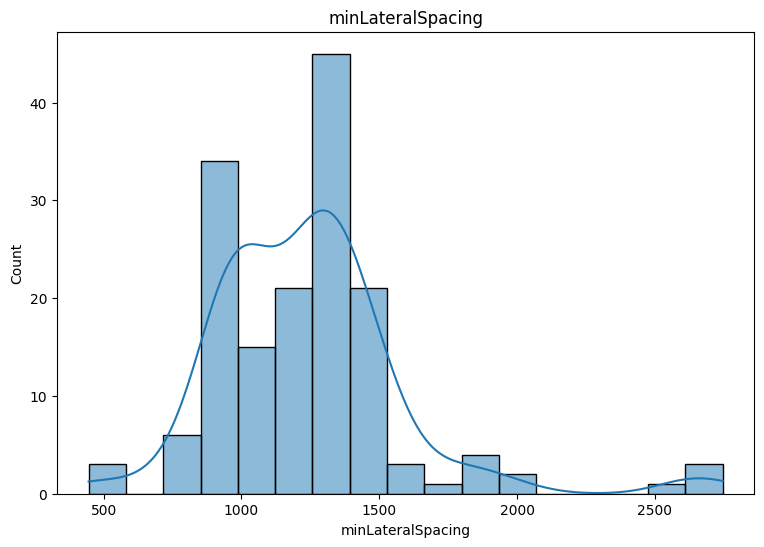

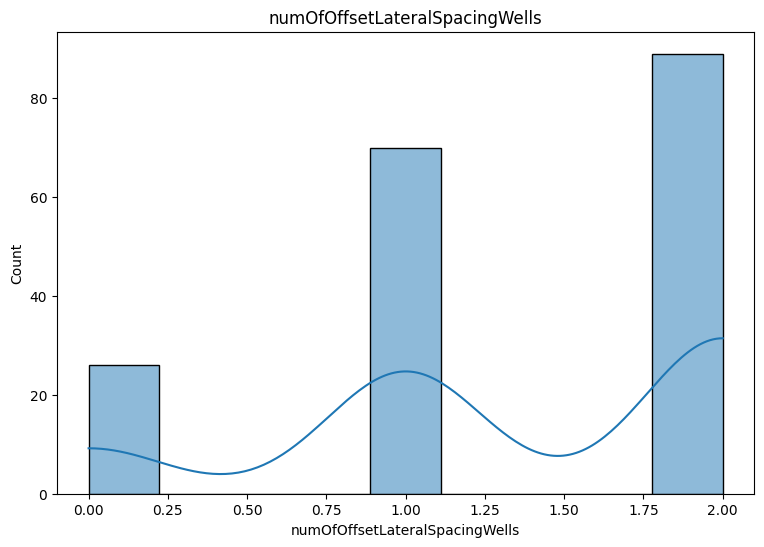

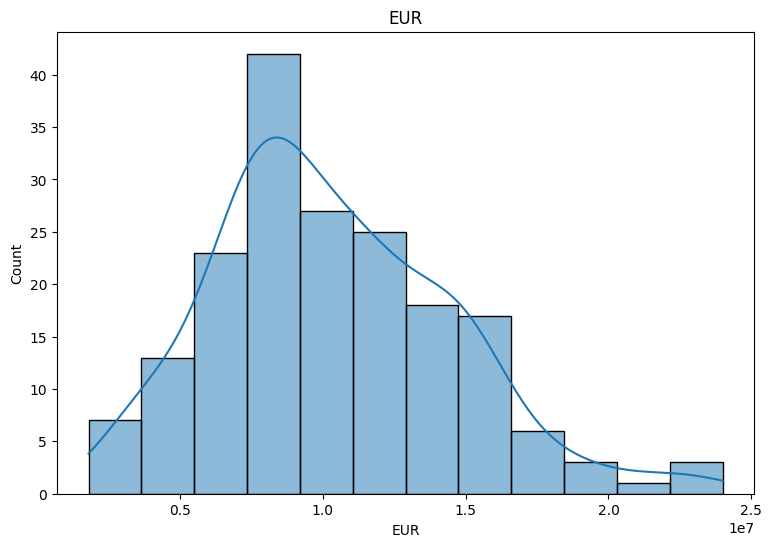

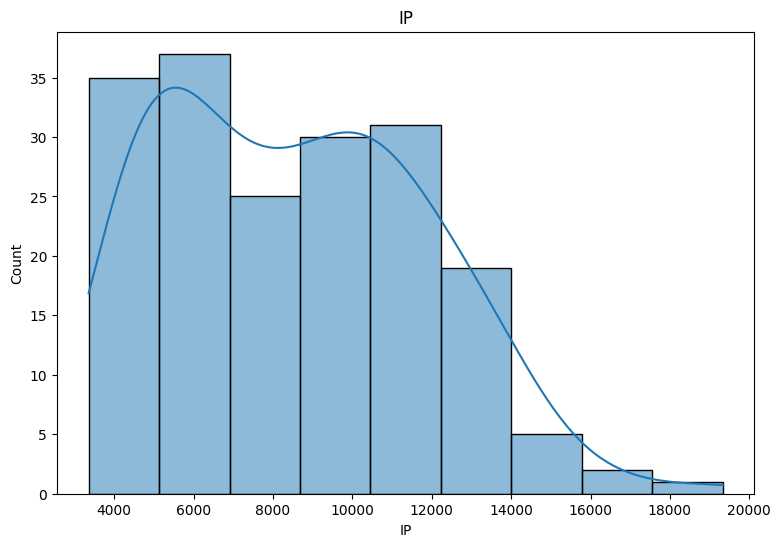

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

for column in df.columns:
    plt.figure(figsize=(9, 6))
    sns.histplot(df[column], kde=True)
    #X_train[column].hist(edgecolor='black')
    plt.title(column)
    plt.show()

#### After one-hot encoding we have plotted the dataset with KDE to observe the distribution. Most of the features appear to be normally distributed with a few skewed features

In [14]:
a =df.columns.values

#### Plotting the data across all the features to observe trend in data distribution 

<Figure size 2000x4000 with 0 Axes>

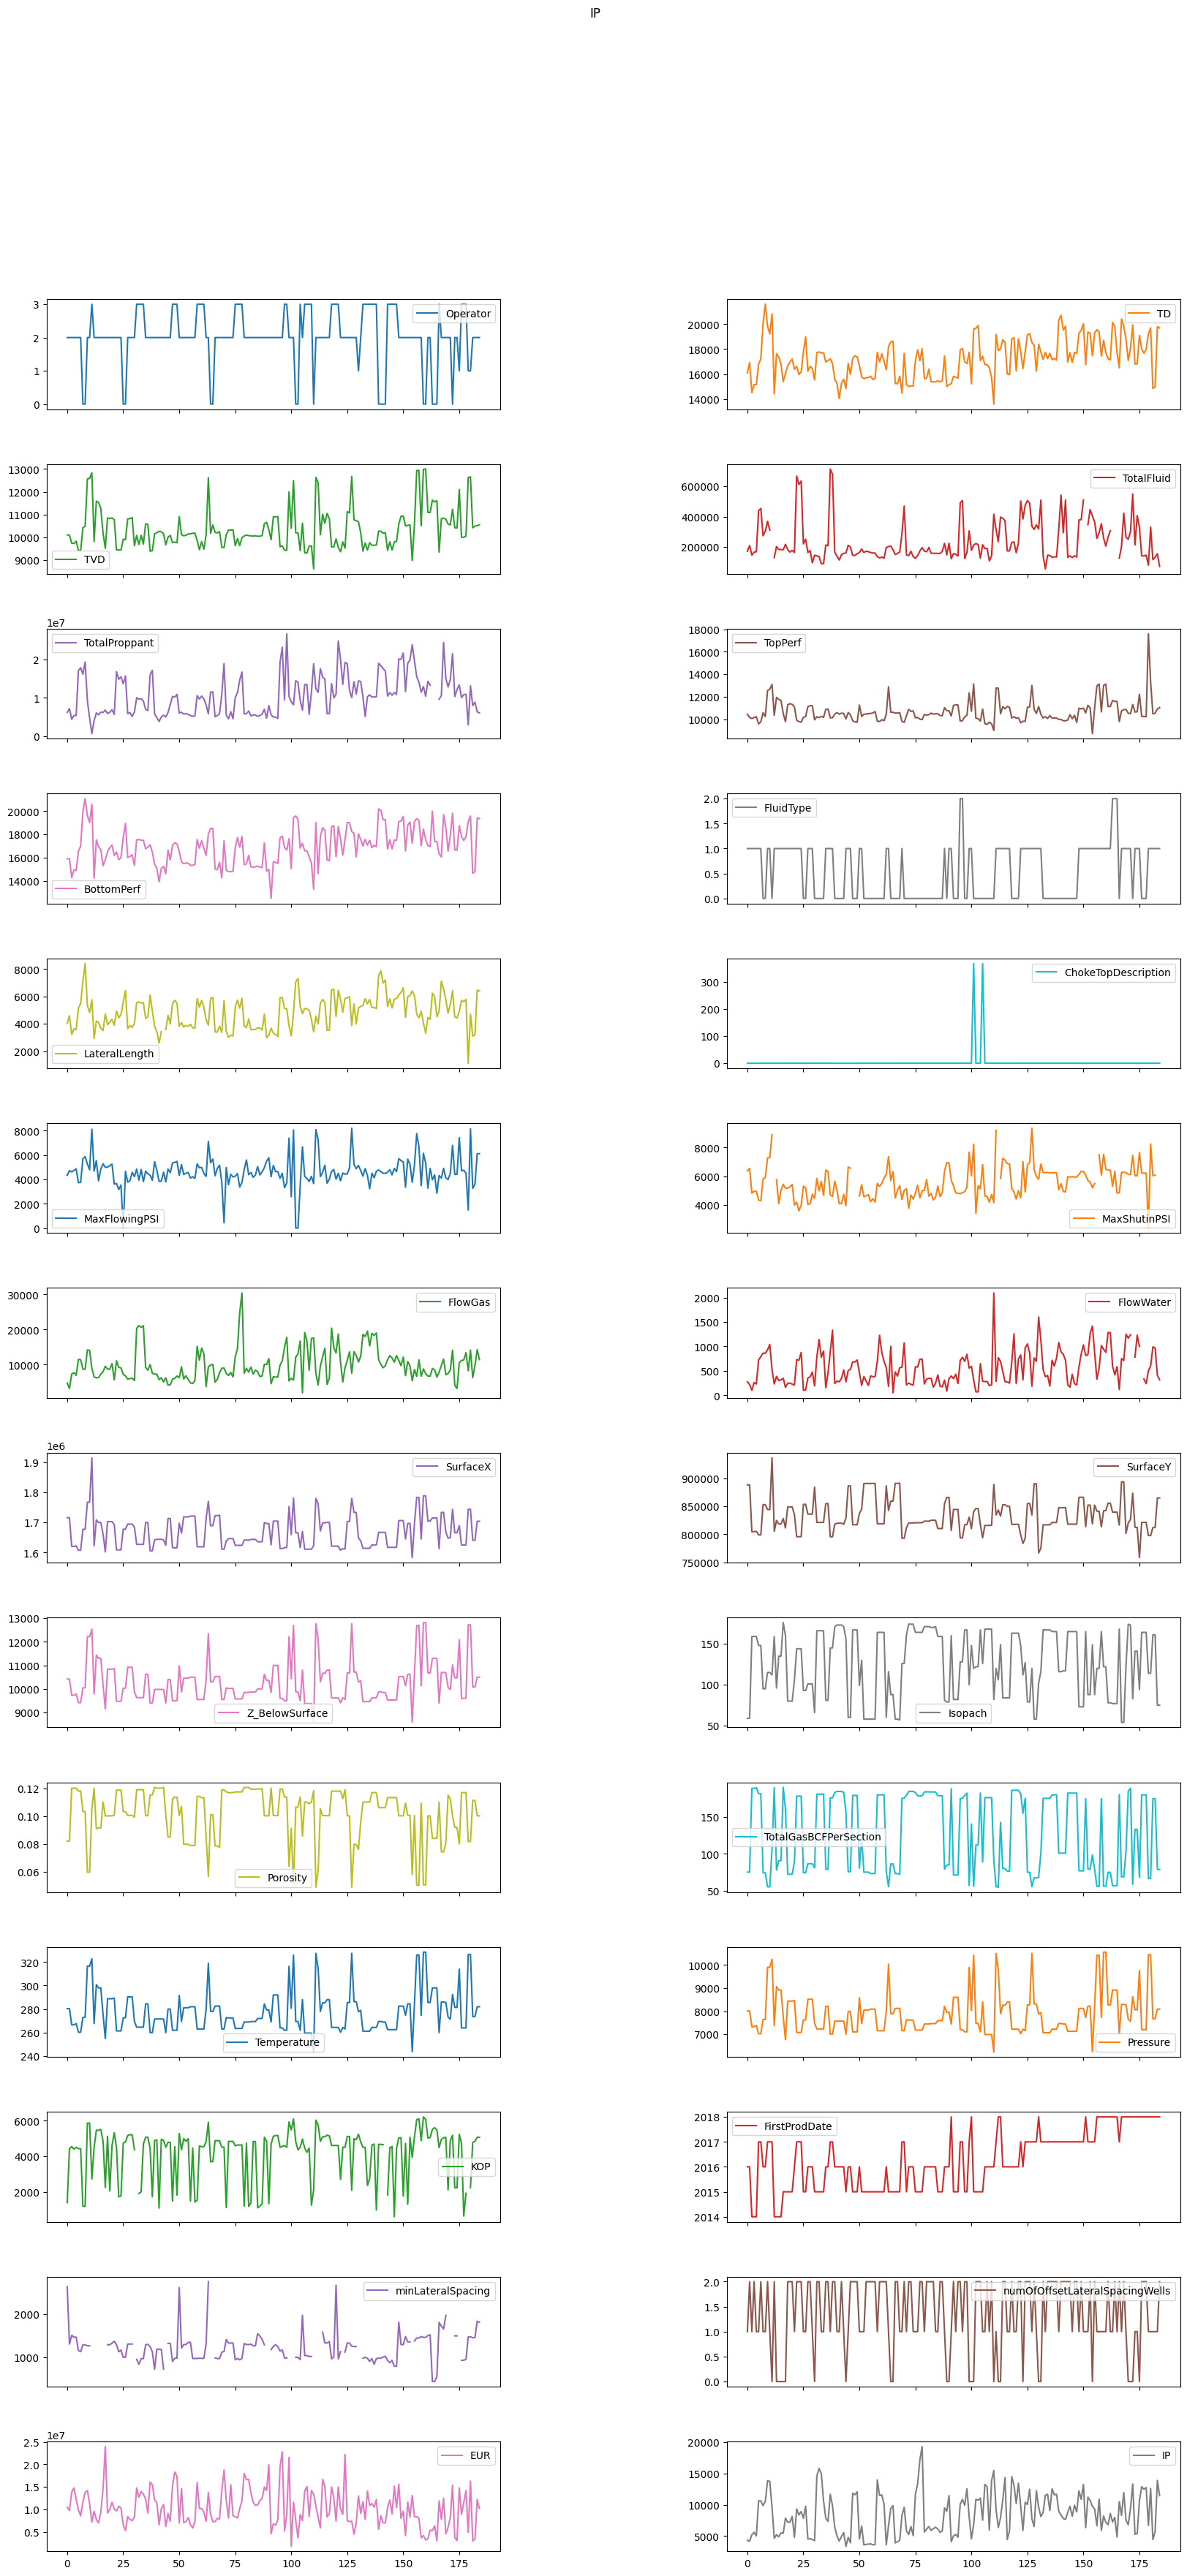

In [15]:
plt.figure(figsize=(20, 40))  # Adjust the size as needed

df.plot(subplots=True, layout=(14, 2), figsize=(20, 40), title = a.all())

# Adjust the spacing
plt.subplots_adjust(hspace=0.5, wspace=0.5)

# Show the plot
plt.show()

##### Observing the dataset to identify how many mising values are there in the data

In [16]:
df.isna().any(axis = 0)

Operator                          False
TD                                False
TVD                               False
TotalFluid                         True
TotalProppant                      True
TopPerf                           False
BottomPerf                        False
FluidType                         False
LateralLength                      True
ChokeTopDescription               False
MaxFlowingPSI                     False
MaxShutinPSI                       True
FlowGas                           False
FlowWater                          True
SurfaceX                          False
SurfaceY                          False
Z_BelowSurface                    False
Isopach                           False
Porosity                          False
TotalGasBCFPerSection             False
Temperature                       False
Pressure                          False
KOP                                True
FirstProdDate                     False
minLateralSpacing                  True


##### Filtering columns with missing data

In [17]:
missing_data = df.isna().any()

# Select only the columns that have missing data
columns_with_missing_data = missing_data[missing_data].index

columns_with_missing_data

Index(['TotalFluid', 'TotalProppant', 'LateralLength', 'MaxShutinPSI',
       'FlowWater', 'KOP', 'minLateralSpacing'],
      dtype='object')

##### Imputing missing data using spline interpolation technique

In [18]:
df = df.interpolate(method = 'spline', order =2)

C:\Users\Gopala Kala\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\interpolate\_fitpack2.py:298: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


In [19]:
df.isna().any(axis = 0)

Operator                          False
TD                                False
TVD                               False
TotalFluid                        False
TotalProppant                     False
TopPerf                           False
BottomPerf                        False
FluidType                         False
LateralLength                     False
ChokeTopDescription               False
MaxFlowingPSI                     False
MaxShutinPSI                      False
FlowGas                           False
FlowWater                         False
SurfaceX                          False
SurfaceY                          False
Z_BelowSurface                    False
Isopach                           False
Porosity                          False
TotalGasBCFPerSection             False
Temperature                       False
Pressure                          False
KOP                               False
FirstProdDate                     False
minLateralSpacing                 False


In [20]:
df.tail()

Operator     TD    TVD  TotalFluid  TotalProppant  TopPerf  BottomPerf  \
180         1  19708  12656    331634.0     13146000.0    13292       19583   
181         2  14847  10415    117964.0      7974000.0    10486       14670   
182         2  14975  10489    134076.0      8898000.0    10543       14800   
183         2  19795  10508    156475.0      6394000.0    10915       19432   
184         2  19695  10550     73442.0      6100000.0    11049       19345   

     FluidType  LateralLength  ChokeTopDescription  ...  Porosity  \
180          1        4718.25              0.28125  ...    0.0816   
181          1        3105.75              0.37500  ...    0.1112   
182          1        3200.25              0.37500  ...    0.1112   
183          1        6465.00              0.34375  ...    0.1001   
184          1        6393.75              0.31250  ...    0.1001   

     TotalGasBCFPerSection  Temperature      Pressure     KOP  FirstProdDate  \
180                66.4641       326.42  10443.073660  2227.5           2018   
181               175.3190       273.62   7670.953659  4785.0           2018   
182               175.3190       273.62   7670.953659  4833.0           2018   
183                78.8252       282.00   8089.772727  5073.0           2018   
184                78.8252       282.00   8089.772727  5066.5           2018   

     minLateralSpacing  numOfOffsetLateralSpacingWells       EUR            IP  
180        1476.132943                               1  16300000  12623.263380  
181        1455.863095                               1   3000000   4452.516585  
182        1455.863095                               1   3400000   5700.527422  
183        1835.921705                               1  12200000  13904.722170  
184        1813.325889                               2  10200000  11459.903780  

[5 rows x 28 columns]

In [21]:
df.shape

(185, 28)

In [22]:
df['FluidType'] = df['FluidType'].fillna(df['FluidType'].mode()[0])

In [23]:
df.isna().any(axis = 0)

Operator                          False
TD                                False
TVD                               False
TotalFluid                        False
TotalProppant                     False
TopPerf                           False
BottomPerf                        False
FluidType                         False
LateralLength                     False
ChokeTopDescription               False
MaxFlowingPSI                     False
MaxShutinPSI                      False
FlowGas                           False
FlowWater                         False
SurfaceX                          False
SurfaceY                          False
Z_BelowSurface                    False
Isopach                           False
Porosity                          False
TotalGasBCFPerSection             False
Temperature                       False
Pressure                          False
KOP                               False
FirstProdDate                     False
minLateralSpacing                 False


In [24]:
X = df.drop(['EUR', 'IP'], axis=1)
y = df[['EUR', 'IP']]

In [25]:
X.shape

(185, 26)

In [26]:
y.shape

(185, 2)

In [27]:
#from sklearn.model_selection import train_test_split
#X_traind, X_testd, y_traind, y_testd = train_test_split(X, y, random_state=4, train_size=0.8)

## Task 2

### Perform train-test-split; removing outliers, collinear features and creating new features

##### Splitting the dataset into train and test data ( we have split data into different training sizes to answer future questions)

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state = 42)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=.1, random_state = 42)
X_train4, X_test4, y_train4, y_test4 = train_test_split(X, y, test_size=.5, random_state = 42)

print("Training Features Shape", X_train.shape)
print("Training Targets Shape", y_train.shape)

Training Features Shape (148, 26)
Training Targets Shape (148, 2)


In [29]:
print("Testing Features Shape", X_test.shape)
print("Testing Targets Shape", y_test.shape)

Testing Features Shape (37, 26)
Testing Targets Shape (37, 2)


##### Plotting the dataset using box plot to observe outliers within the data

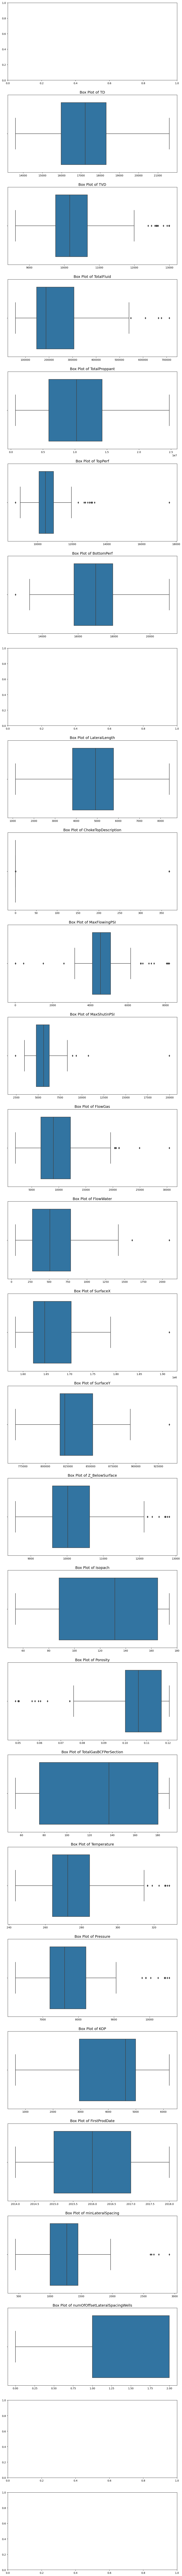

In [30]:
import seaborn as sns

fig, ax = plt.subplots(28, 1, figsize=(10, 5 * 28))

for i, column in enumerate(X_train.columns):
    if df[column].dtypes == 'float64' or df[column].dtypes == 'int64':
        sns.boxplot(x=X_train[column], ax=ax[i])
        ax[i].set_title(f'Box Plot of {column}', fontsize=14)
        ax[i].set_xlabel('')
    else:
        pass

# Adjust layout
plt.tight_layout()
plt.show()

In [31]:
df.dtypes

Operator                            int32
TD                                  int64
TVD                                 int64
TotalFluid                        float64
TotalProppant                     float64
TopPerf                             int64
BottomPerf                          int64
FluidType                           int32
LateralLength                     float64
ChokeTopDescription               float64
MaxFlowingPSI                       int64
MaxShutinPSI                      float64
FlowGas                             int64
FlowWater                         float64
SurfaceX                          float64
SurfaceY                          float64
Z_BelowSurface                      int64
Isopach                             int64
Porosity                          float64
TotalGasBCFPerSection             float64
Temperature                       float64
Pressure                          float64
KOP                               float64
FirstProdDate                     

In [32]:
columns = X_train.columns

##### Identifying and removing outliers/anomalies using interquartile range method

In [33]:
def iqr_trimming(df, df_y, cols):
    # Initialize an array to collect the indices to drop
    drop_indices = np.array([])

    for col in cols:
        if df[col].dtype == 'float64' or df[col].dtype == 'int64':
            # Calculate Q1, Q3, and IQR
            q1 = df[col].quantile(0.25)
            q3 = df[col].quantile(0.75)
            iqr = q3 - q1
            # Define upper and lower bounds
            upper_whisker = q3 + (2 * iqr)
            lower_whisker = q1 - (2 * iqr)
            # Find the indexes of outliers
            outlier_indices = df[(df[col] > upper_whisker) | (df[col] < lower_whisker)].index
            # Append to the drop_indices array
            drop_indices = np.append(drop_indices, outlier_indices)

    # Get unique indices to drop
    unique_indices_to_drop = np.unique(drop_indices)

    # Drop the outliers from df and df_y
    df_trimmed = df.drop(unique_indices_to_drop)
    df_y_trimmed = df_y.drop(unique_indices_to_drop)

    return df_trimmed, df_y_trimmed

columns = [col for col in X_train.columns if X_train[col].dtype in ['float64', 'int64']]
X_train_no_outliers, y_train_no_outliers = iqr_trimming(X_train, y_train, columns)
X_train_no_outliers3, y_train_no_outliers3 = iqr_trimming(X_train3, y_train3, columns)
X_train_no_outliers4, y_train_no_outliers4 = iqr_trimming(X_train4, y_train4, columns)


In [34]:
X_train_no_outliers.head()

Operator     TD    TVD  TotalFluid  TotalProppant  TopPerf  BottomPerf  \
65         0  18629  10540    183265.5     11552000.0    10626       18521   
67         2  15230  10192    158650.7      5390480.0    10561       14980   
31         3  17726  10081    143163.9     10048000.0    10230       17546   
12         2  14423   9806    131738.6      4146960.0    10362       14245   
41         2  14050  10259    115542.2      3862000.0    10455       13940   

    FluidType  LateralLength  ChokeTopDescription  ...  Z_BelowSurface  \
65          0        5924.25              0.31250  ...           10300   
67          0        3396.75              0.31250  ...           10528   
31          0        5556.75              0.46875  ...            9631   
12          1        2937.00              0.25000  ...            9784   
41          0        2598.00              0.25000  ...            9979   

    Isopach  Porosity  TotalGasBCFPerSection  Temperature     Pressure  \
65       88    0.1009                86.4267       278.00  7888.863636   
67       58    0.0785                73.2662       282.56  8118.045091   
31      166    0.1189               181.3498       264.62  7230.035477   
12      159    0.1200               190.2331       267.68  7378.914909   
41      173    0.1200               185.0614       271.58  7570.205477   

            KOP  FirstProdDate  minLateralSpacing  \
65  3703.000000           2015        1699.660220   
67  4878.500000           2015         975.579288   
31  3031.431467           2015         957.893313   
12  4498.000000           2014        1467.752020   
41  1084.500000           2016        1187.032412   

    numOfOffsetLateralSpacingWells  
65                               0  
67                               2  
31                               2  
12                               2  
41                               1  

[5 rows x 26 columns]

In [35]:
X_train_no_outliers.shape

(118, 26)

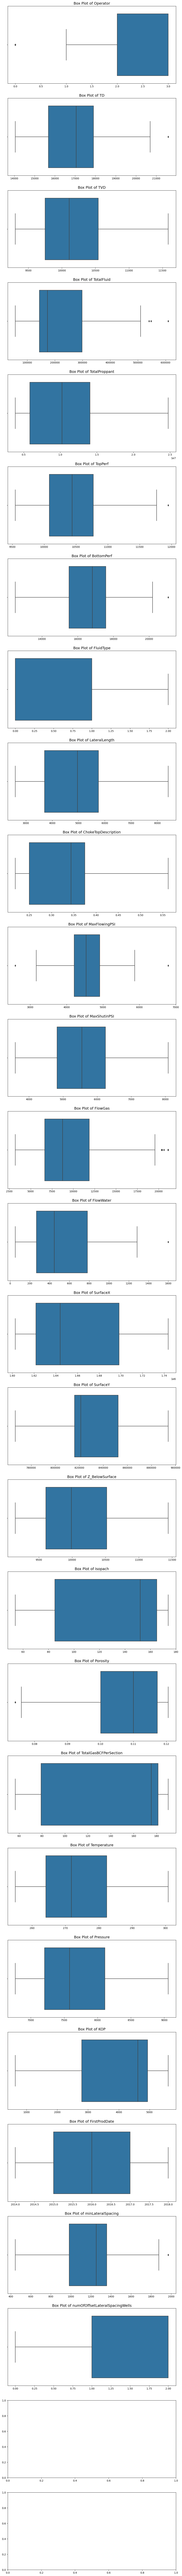

In [36]:
#numerical_data = X_train.select_dtypes(include=['float64', 'int64'])

fig, ax = plt.subplots(28, 1, figsize=(10, 5 * 28))

for i, column in enumerate(X_train_no_outliers.columns):
    sns.boxplot(x=X_train_no_outliers[column], ax=ax[i])
    ax[i].set_title(f'Box Plot of {column}', fontsize=14)
    ax[i].set_xlabel('')

# Adjust layout
plt.tight_layout()
plt.show()

In [37]:
X_train_no_outliers.head()

Operator     TD    TVD  TotalFluid  TotalProppant  TopPerf  BottomPerf  \
65         0  18629  10540    183265.5     11552000.0    10626       18521   
67         2  15230  10192    158650.7      5390480.0    10561       14980   
31         3  17726  10081    143163.9     10048000.0    10230       17546   
12         2  14423   9806    131738.6      4146960.0    10362       14245   
41         2  14050  10259    115542.2      3862000.0    10455       13940   

    FluidType  LateralLength  ChokeTopDescription  ...  Z_BelowSurface  \
65          0        5924.25              0.31250  ...           10300   
67          0        3396.75              0.31250  ...           10528   
31          0        5556.75              0.46875  ...            9631   
12          1        2937.00              0.25000  ...            9784   
41          0        2598.00              0.25000  ...            9979   

    Isopach  Porosity  TotalGasBCFPerSection  Temperature     Pressure  \
65       88    0.1009                86.4267       278.00  7888.863636   
67       58    0.0785                73.2662       282.56  8118.045091   
31      166    0.1189               181.3498       264.62  7230.035477   
12      159    0.1200               190.2331       267.68  7378.914909   
41      173    0.1200               185.0614       271.58  7570.205477   

            KOP  FirstProdDate  minLateralSpacing  \
65  3703.000000           2015        1699.660220   
67  4878.500000           2015         975.579288   
31  3031.431467           2015         957.893313   
12  4498.000000           2014        1467.752020   
41  1084.500000           2016        1187.032412   

    numOfOffsetLateralSpacingWells  
65                               0  
67                               2  
31                               2  
12                               2  
41                               1  

[5 rows x 26 columns]

In [38]:
y_train_no_outliers.head()

EUR            IP
65   7300000   9869.911330
67   8000000   4085.832184
31  14800000  14594.955010
12   9600000   4648.021018
41   6600000   4198.021675

##### Using pearson method for calculating correlation across all features in the dataset with a threshold of 0.9

In [39]:
corr_matrix = X_train_no_outliers.corr(method = "pearson")
corr_matrix3 = X_train_no_outliers3.corr(method = "pearson")
corr_matrix4 = X_train_no_outliers4.corr(method = "pearson")

In [40]:
corr_matrix.head()

Operator        TD       TVD  TotalFluid  TotalProppant  \
Operator       1.000000 -0.341014 -0.469863   -0.449715      -0.254941   
TD            -0.341014  1.000000  0.236078    0.525672       0.796318   
TVD           -0.469863  0.236078  1.000000    0.216912       0.034080   
TotalFluid    -0.449715  0.525672  0.216912    1.000000       0.763764   
TotalProppant -0.254941  0.796318  0.034080    0.763764       1.000000   

                TopPerf  BottomPerf  FluidType  LateralLength  \
Operator      -0.311731   -0.298312  -0.194121      -0.215216   
TD             0.078433    0.949860   0.103971       0.947985   
TVD            0.915329    0.185388   0.371736      -0.065644   
TotalFluid     0.075930    0.538745   0.490124       0.463609   
TotalProppant -0.111088    0.815917   0.260772       0.796353   

               ChokeTopDescription  ...  Z_BelowSurface   Isopach  Porosity  \
Operator                  0.302415  ...       -0.411247  0.460367  0.307711   
TD                        0.439063  ...        0.128286 -0.313830 -0.234785   
TVD                      -0.299050  ...        0.918006 -0.626957 -0.551020   
TotalFluid                0.147440  ...        0.182773 -0.356707 -0.184800   
TotalProppant             0.487677  ...       -0.040602 -0.214225 -0.089897   

               TotalGasBCFPerSection  Temperature  Pressure       KOP  \
Operator                    0.541411    -0.411247 -0.408367 -0.112075   
TD                         -0.387350     0.128286  0.129489  0.020615   
TVD                        -0.735849     0.918006  0.917840  0.304668   
TotalFluid                 -0.330397     0.182773  0.181880  0.070484   
TotalProppant              -0.206610    -0.040602 -0.040648  0.001510   

               FirstProdDate  minLateralSpacing  \
Operator           -0.127431          -0.233116   
TD                  0.364927          -0.051593   
TVD                 0.170679           0.441808   
TotalFluid          0.436410           0.197373   
TotalProppant       0.500489          -0.001307   

               numOfOffsetLateralSpacingWells  
Operator                             0.252401  
TD                                   0.059561  
TVD                                 -0.237913  
TotalFluid                          -0.065151  
TotalProppant                        0.065143  

[5 rows x 26 columns]

##### Creating a heatmap to visually observe the correlation matrix and correlation across all the features in the dataset

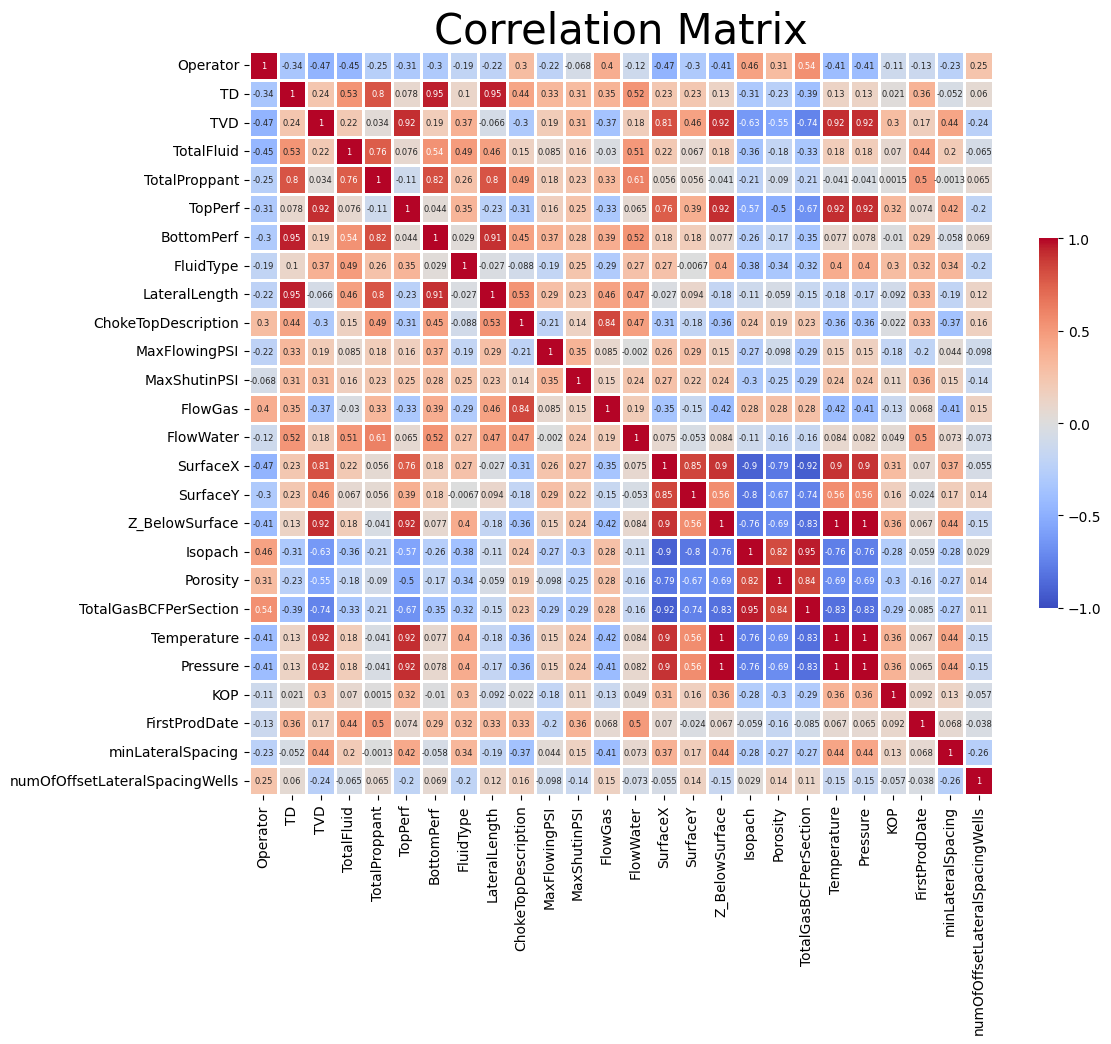

In [41]:
fig, ax = plt.subplots(figsize=(12, 12))

# Using Seaborn HeatMap
sns.heatmap(corr_matrix,  square = True, linewidths = .8, cbar_kws = {'shrink': .4,  'ticks' : [-1, -.5, 0, 0.5, 1]},
            cmap = 'coolwarm', vmin = -1,  vmax = 1, annot = True, annot_kws = {'size': 6})

# Setting Axis Properties
ax.set_yticklabels(corr_matrix.columns, rotation = 0, size = 10)
ax.set_xticklabels(corr_matrix.columns, rotation = 90, size =10)
ax.set_title("Correlation Matrix", size = 30)

sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

##### Masking the correlation matrix to get lower triangle

In [42]:
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True  ##  indices for the upper-triangle

mask[10]

mask3 = np.zeros_like(corr_matrix3, dtype=np.bool)
mask[np.triu_indices_from(mask3)] = True  ##  indices for the upper-triangle

mask3[10]

mask4 = np.zeros_like(corr_matrix4, dtype=np.bool)
mask[np.triu_indices_from(mask4)] = True  ##  indices for the upper-triangle

mask4[10]

C:\Users\Gopala Kala\AppData\Local\Temp\ipykernel_13720\301107441.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr_matrix, dtype=np.bool)
C:\Users\Gopala Kala\AppData\Local\Temp\ipykernel_13720\301107441.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask3 = np.zeros_like(corr_matrix3, dtype=np.bool)
C:\Users\Gopal

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False])

In [43]:
mask[10]

array([False, False, False, False, False, False, False, False, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

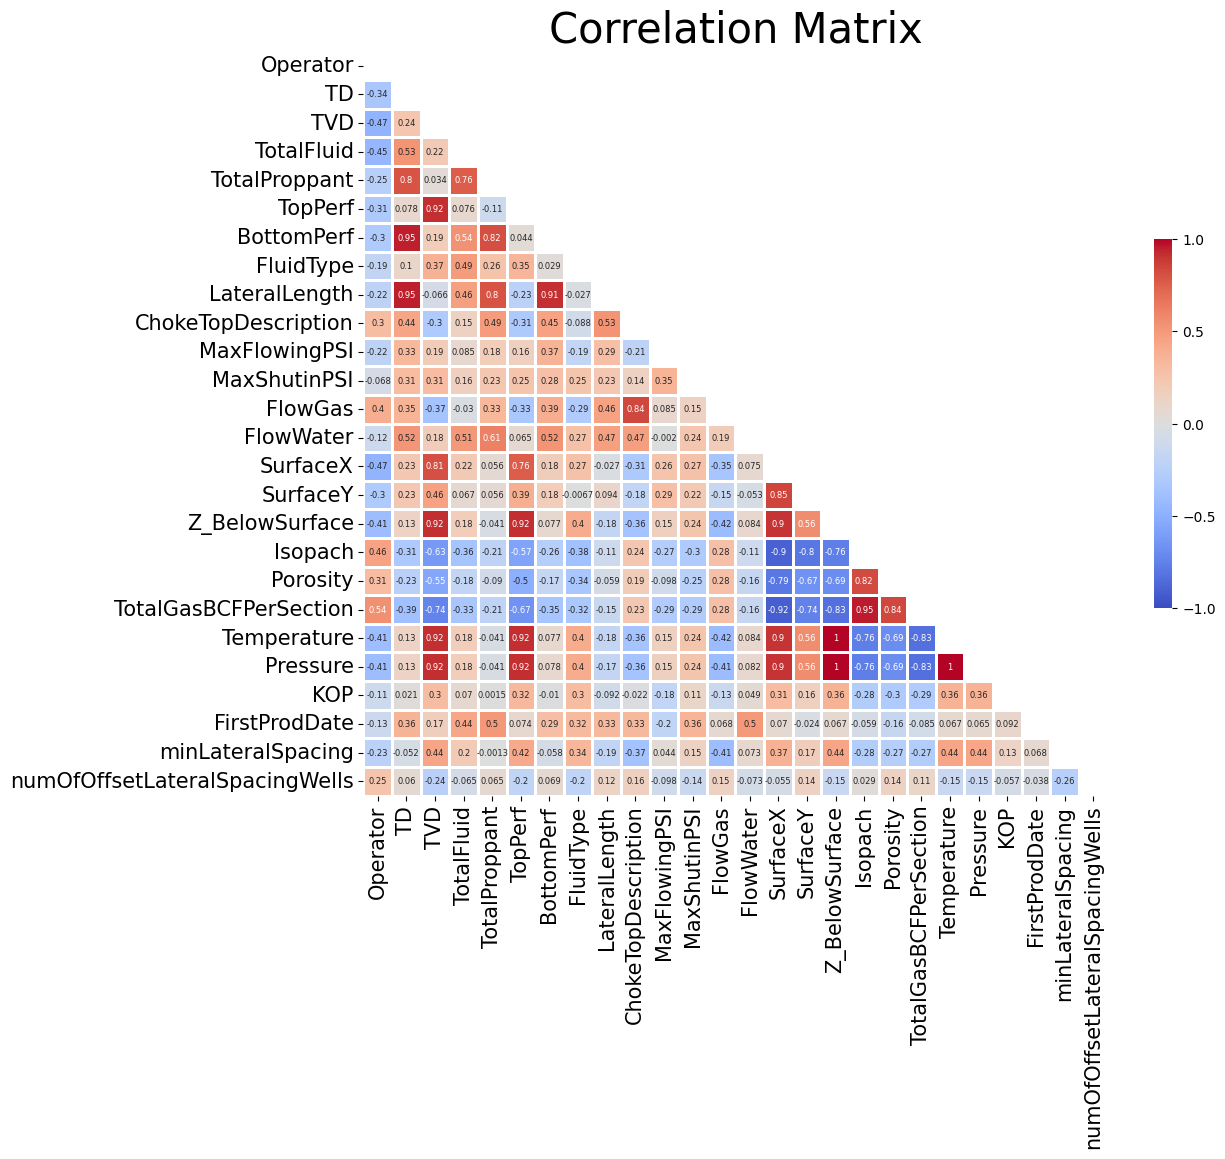

In [44]:
fig, ax = plt.subplots(figsize=(12, 12))

# Using Seaborn HeatMap
sns.heatmap(corr_matrix, mask = mask, square = True, linewidths = .8, cbar_kws = {'shrink': .4,  'ticks' : [-1, -.5, 0, 0.5, 1]},
            cmap = 'coolwarm', vmin = -1,  vmax = 1, annot = True, annot_kws = {'size': 6})

# Setting Axis Properties
ax.set_yticklabels(corr_matrix.columns, rotation = 0, size = 15)
ax.set_xticklabels(corr_matrix.columns, rotation = 90, size =15)
ax.set_title("Correlation Matrix", size = 30)

sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

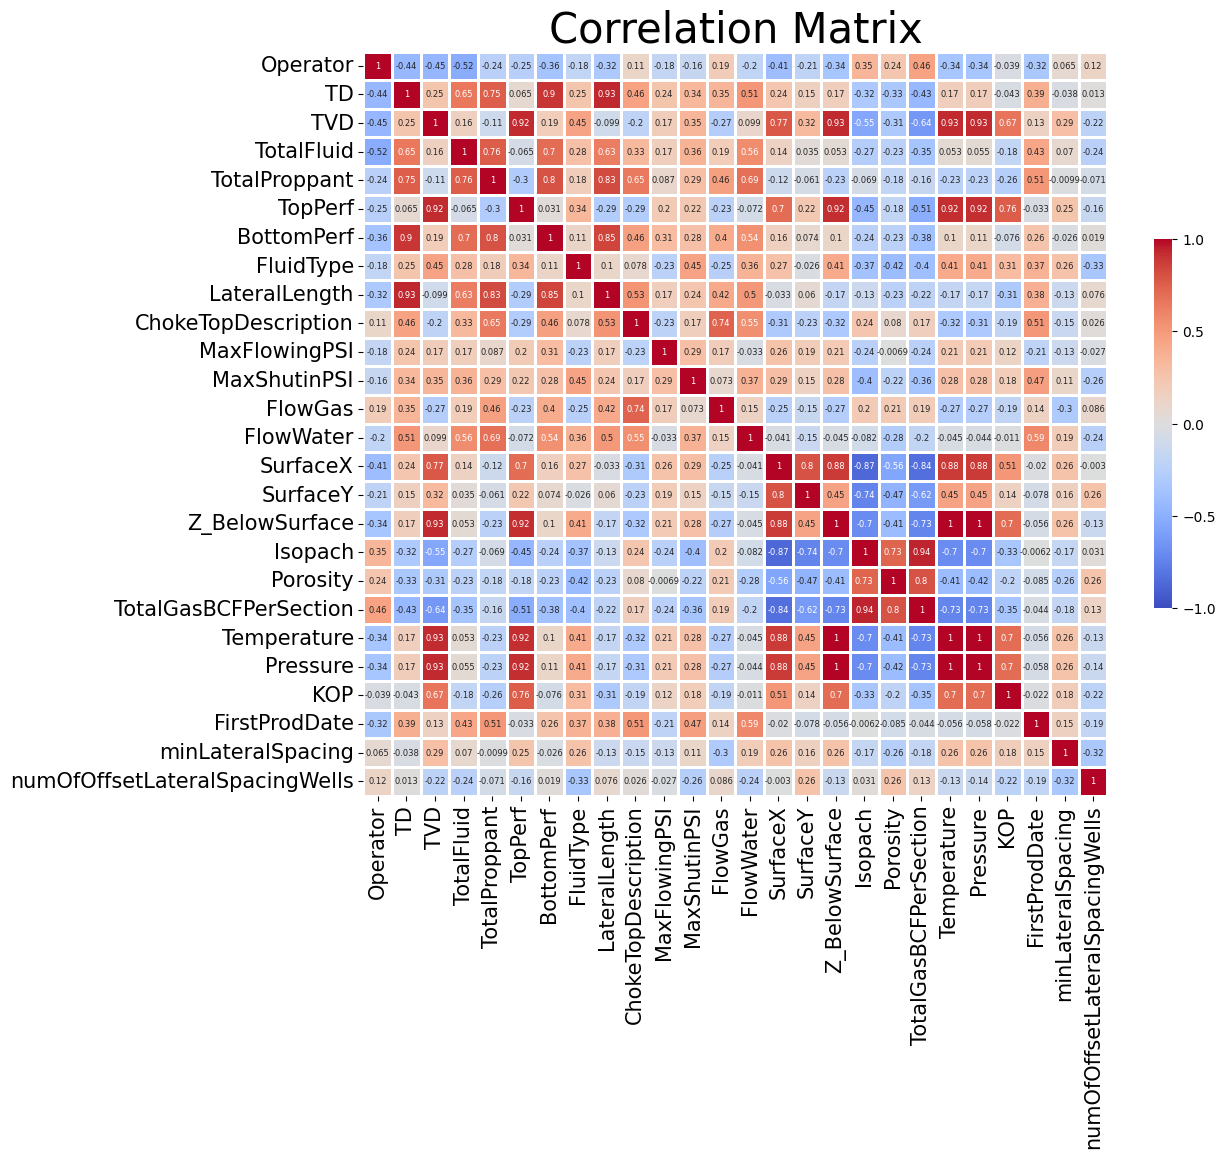

In [45]:
fig, ax = plt.subplots(figsize=(12, 12))

# Using Seaborn HeatMap
sns.heatmap(corr_matrix4, mask = mask4, square = True, linewidths = .8, cbar_kws = {'shrink': .4,  'ticks' : [-1, -.5, 0, 0.5, 1]},
            cmap = 'coolwarm', vmin = -1,  vmax = 1, annot = True, annot_kws = {'size': 6})

# Setting Axis Properties
ax.set_yticklabels(corr_matrix4.columns, rotation = 0, size = 15)
ax.set_xticklabels(corr_matrix4.columns, rotation = 90, size =15)
ax.set_title("Correlation Matrix", size = 30)

sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

#### Finding features with correlation greater than 0.9 and drop them

In [46]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))


to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]

upper3 = corr_matrix3.where(np.triu(np.ones(corr_matrix3.shape), k=1).astype(bool))


to_drop3 = [column for column in upper3.columns if any(upper3[column] > 0.90)]

upper4 = corr_matrix4.where(np.triu(np.ones(corr_matrix4.shape), k=1).astype(bool))


to_drop4 = [column for column in upper4.columns if any(upper4[column] > 0.90)]

In [47]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.8
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]

In [48]:
X_train_no_outliers.drop(to_drop, axis=1, inplace=True)
X_train_no_outliers3.drop(to_drop3, axis=1, inplace=True)
X_train_no_outliers4.drop(to_drop4, axis=1, inplace=True)

In [49]:
X_train_no_outliers.head()

Operator     TD    TVD  TotalFluid  TotalProppant  FluidType  \
65         0  18629  10540    183265.5     11552000.0          0   
67         2  15230  10192    158650.7      5390480.0          0   
31         3  17726  10081    143163.9     10048000.0          0   
12         2  14423   9806    131738.6      4146960.0          1   
41         2  14050  10259    115542.2      3862000.0          0   

    ChokeTopDescription  MaxFlowingPSI  MaxShutinPSI  FlowGas  FlowWater  \
65              0.31250           5677    6332.00000    10096       53.0   
67              0.31250           4904    5035.00000     5855      395.0   
31              0.46875           4855    5850.00000    20351      783.0   
12              0.25000           4683    8087.81167     6502      234.0   
41              0.25000           3846    4093.00000     5735      278.0   

       SurfaceX     SurfaceY  Isopach  Porosity          KOP  FirstProdDate  \
65  1689404.286  859472.0118       88    0.1009  3703.000000           2015   
67  1722814.660  891355.9303       58    0.0785  4878.500000           2015   
31  1627584.933  821415.9437      166    0.1189  3031.431467           2015   
12  1622542.457  805495.7506      159    0.1200  4498.000000           2014   
41  1644282.685  819977.0023      173    0.1200  1084.500000           2016   

    minLateralSpacing  numOfOffsetLateralSpacingWells  
65        1699.660220                               0  
67         975.579288                               2  
31         957.893313                               2  
12        1467.752020                               2  
41        1187.032412                               1

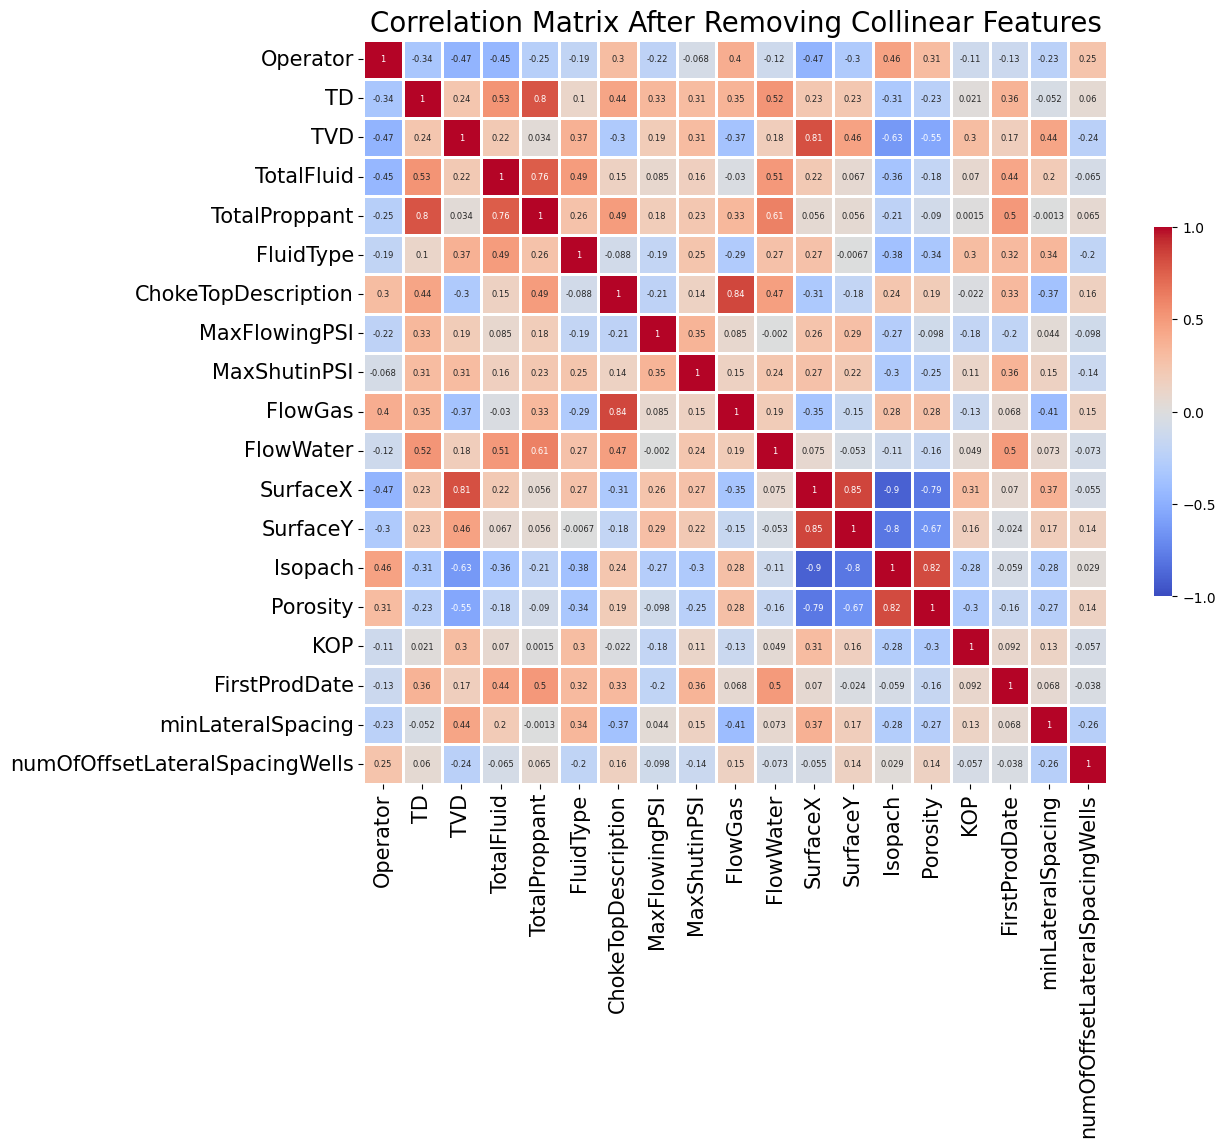

In [50]:
corr_matrix = X_train_no_outliers.corr(method = "pearson")

fig, ax = plt.subplots(figsize=(12, 12))

# Using Seaborn HeatMap
sns.heatmap(corr_matrix, square = True, linewidths = .8, cbar_kws = {'shrink': .4,  'ticks' : [-1, -.5, 0, 0.5, 1]},
            cmap = 'coolwarm', vmin = -1,  vmax = 1, annot = True, annot_kws = {'size': 6})

# Setting Axis Properties
ax.set_yticklabels(corr_matrix.columns, rotation = 0, size = 15)
ax.set_xticklabels(corr_matrix.columns, rotation = 90, size =15)
ax.set_title("Correlation Matrix After Removing Collinear Features", size = 20)

sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

In [51]:
X_test.drop(to_drop, axis=1, inplace=True)
#X_test.drop(to_drop, axis=1, inplace=True)
#X_test.drop(to_drop, axis=1, inplace=True)

In [52]:
X_test.shape

(37, 19)

In [53]:
X_train_no_outliers.shape

(118, 19)

In [54]:
X_train_no_outliers.head()

Operator     TD    TVD  TotalFluid  TotalProppant  FluidType  \
65         0  18629  10540    183265.5     11552000.0          0   
67         2  15230  10192    158650.7      5390480.0          0   
31         3  17726  10081    143163.9     10048000.0          0   
12         2  14423   9806    131738.6      4146960.0          1   
41         2  14050  10259    115542.2      3862000.0          0   

    ChokeTopDescription  MaxFlowingPSI  MaxShutinPSI  FlowGas  FlowWater  \
65              0.31250           5677    6332.00000    10096       53.0   
67              0.31250           4904    5035.00000     5855      395.0   
31              0.46875           4855    5850.00000    20351      783.0   
12              0.25000           4683    8087.81167     6502      234.0   
41              0.25000           3846    4093.00000     5735      278.0   

       SurfaceX     SurfaceY  Isopach  Porosity          KOP  FirstProdDate  \
65  1689404.286  859472.0118       88    0.1009  3703.000000           2015   
67  1722814.660  891355.9303       58    0.0785  4878.500000           2015   
31  1627584.933  821415.9437      166    0.1189  3031.431467           2015   
12  1622542.457  805495.7506      159    0.1200  4498.000000           2014   
41  1644282.685  819977.0023      173    0.1200  1084.500000           2016   

    minLateralSpacing  numOfOffsetLateralSpacingWells  
65        1699.660220                               0  
67         975.579288                               2  
31         957.893313                               2  
12        1467.752020                               2  
41        1187.032412                               1

In [55]:
y_train_no_outliers.shape

(118, 2)

In [56]:
y_test.shape

(37, 2)

##### Once the data has been pre-processed, train-test split, we are now trying to scale the data using StandardScaler 

In [57]:
from sklearn.preprocessing import StandardScaler

scl = StandardScaler()

X_train_s = scl.fit_transform(X_train_no_outliers) ## fit and transform the train

X_test_s = scl.transform(X_test)

X_train_s3 = scl.fit_transform(X_train_no_outliers3)

X_train_s4 = scl.fit_transform(X_train_no_outliers4)



## Task 3

##### Feature selection is done using f-regression test on the train data to compute F score and p-score. This will help determine the linear correlation between data in the training set and the target variable y_train_no_outliers['EUR'] and y_train_no_outliers['IP']

In [58]:
from sklearn.feature_selection import f_regression, chi2
F_eur, p_eur = f_regression(X_train_s, y_train_no_outliers['EUR'])
F_eur3, p_eur3 = f_regression(X_train_s3, y_train_no_outliers3['EUR'])
F_eur4, p_eur4 = f_regression(X_train_s4, y_train_no_outliers4['EUR'])

In [59]:
F_ip, p_ip = f_regression(X_train_s, y_train_no_outliers['IP'])
F_ip3, p_ip3 = f_regression(X_train_s3, y_train_no_outliers3['IP'])
F_ip4, p_ip4 = f_regression(X_train_s4, y_train_no_outliers4['IP'])

#### Using mutual info regression method of feature selection to calculate mutual information between features in the training dataset and the corresponding target variables EUR and IP

In [60]:
from sklearn.feature_selection import mutual_info_regression
mi_eur = mutual_info_regression(X_train_s, y_train_no_outliers['EUR'])
mi_ip = mutual_info_regression(X_train_s, y_train_no_outliers['IP'])

mi_eur3 = mutual_info_regression(X_train_s3, y_train_no_outliers3['EUR'])
mi_ip3 = mutual_info_regression(X_train_s3, y_train_no_outliers3['IP'])

mi_eur4 = mutual_info_regression(X_train_s4, y_train_no_outliers4['EUR'])
mi_ip4 = mutual_info_regression(X_train_s4, y_train_no_outliers4['IP'])

In [61]:
print("Fvalues of EUR", np.sort(F_eur))
print("Fvalues of IP", np.sort(F_ip))

Fvalues of EUR [ 0.07891594  0.07923459  0.57824592  0.67523185  0.77303208  0.92788278
  2.61867049  3.1057806   5.4740525   6.22427812  7.23871453  8.54001854
 10.92718721 14.41548552 17.1511769  17.48723284 17.65171797 19.99027135
 23.52481577]
Fvalues of IP [  1.27194237   1.85460308   2.61064269   3.35188991   3.66003711
   4.22391953   5.78907819   6.97179823   7.17909757   7.80643115
   9.42276936   9.66014652  12.09281789  12.67697277  13.49966476
  54.36744713  57.45708143 131.93992059 213.70257916]


In [62]:
type(F_eur)

numpy.ndarray

In [63]:
print("MI VALUES of EUR", np.sort(mi_eur))
print("MI VALUES of IP", np.sort(mi_ip))

MI VALUES of EUR [0.03653105 0.0690867  0.07387571 0.07463164 0.07728545 0.0794084
 0.09151305 0.09185875 0.10596003 0.11763431 0.13770736 0.16714904
 0.17063281 0.17450517 0.18833035 0.20762473 0.22568238 0.24461894
 0.25498285]
MI VALUES of IP [0.         0.0498544  0.07792194 0.09945968 0.11026014 0.16044763
 0.23638566 0.25763254 0.28556367 0.29892286 0.30506754 0.30541418
 0.32650658 0.4210505  0.42995184 0.44844087 0.46620652 0.64824641
 0.7201755 ]


Text(0.5, 0, 'features')

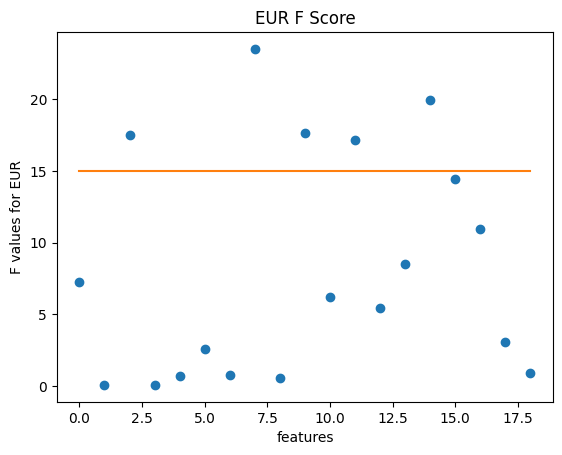

In [64]:
plt.figure()
plt.plot(F_eur, 'o')
plt.plot(15*np.ones(len(F_eur)))
plt.title('EUR F Score')
plt.ylabel('F values for EUR')
plt.xlabel('features')

Text(0.5, 0, 'features')

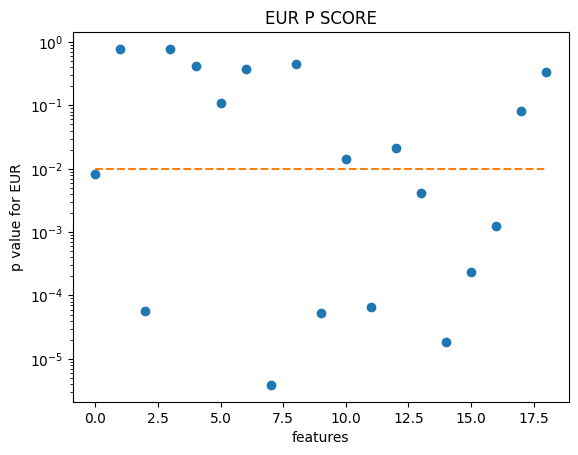

In [65]:
plt.figure()
plt.semilogy(p_eur, 'o')
plt.semilogy(0.01*np.ones(len(p_eur)), '--')
plt.title('EUR P SCORE')
plt.ylabel('p value for EUR')
plt.xlabel('features')

Text(0.5, 0, 'features')

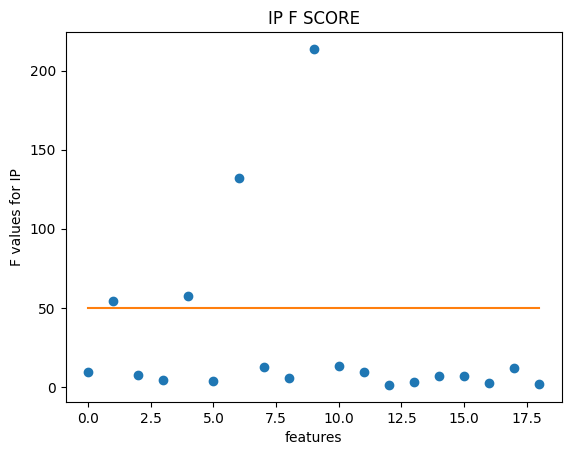

In [66]:
plt.figure()
plt.plot(F_ip, 'o')
plt.plot(50*np.ones(len(F_ip)))
plt.title('IP F SCORE')
plt.ylabel('F values for IP')
plt.xlabel('features')

Text(0.5, 0, 'features')

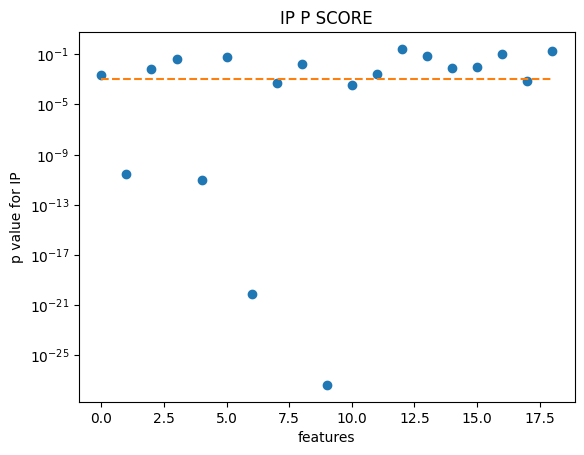

In [67]:
plt.figure()
plt.semilogy(p_ip, 'o')
plt.semilogy(0.001*np.ones(len(p_ip)), '--')
plt.title("IP P SCORE")
plt.ylabel('p value for IP')
plt.xlabel('features')

Text(0.5, 0, 'features')

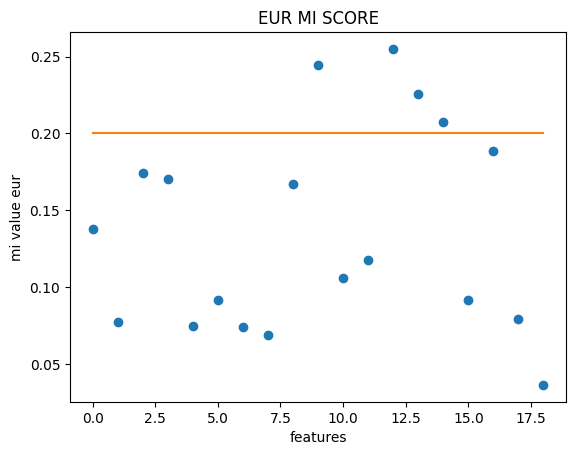

In [68]:
plt.figure()
plt.plot(mi_eur, 'o')
plt.plot(0.2*np.ones(len(mi_eur)))
plt.title('EUR MI SCORE')
plt.ylabel('mi value eur')
plt.xlabel('features')

Text(0.5, 0, 'features')

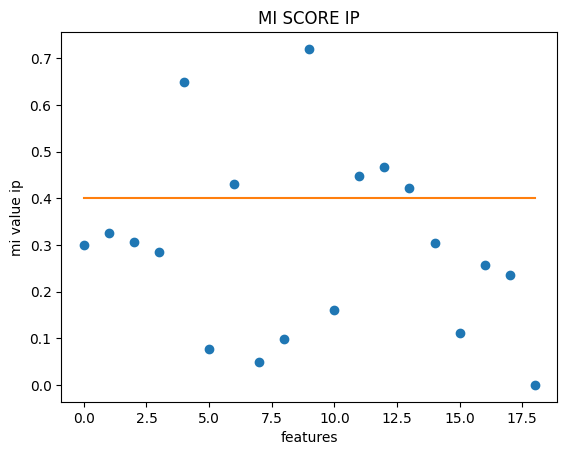

In [69]:
plt.figure()
plt.plot(mi_ip, 'o')
plt.plot(0.40*np.ones(len(mi_ip)))
plt.title('MI SCORE IP')
plt.ylabel('mi value ip')
plt.xlabel('features')

#### Creating dataframe of mi scores and f-scores and ranking the features appropriately

In [70]:
features = X_train_no_outliers.columns

scores_df = pd.DataFrame({
    'Feature': features,
    'F-Score': F_eur,
    'P-Value': p_eur,
    'MI-Score': mi_eur
})

eur_f_score = scores_df.sort_values(by='F-Score', ascending=False)
eur_f_score['Rank'] = range(1, len(eur_f_score) + 1)
eur_f_score['Target'] = 'EUR'

In [71]:
eur_f_score.drop(['MI-Score'], axis=1, inplace=True)

In [72]:
eur_f_score.head()

Feature    F-Score   P-Value  Rank Target
7   MaxFlowingPSI  23.524816  0.000004     1    EUR
14       Porosity  19.990271  0.000018     2    EUR
9         FlowGas  17.651718  0.000052     3    EUR
2             TVD  17.487233  0.000056     4    EUR
11       SurfaceX  17.151177  0.000066     5    EUR

##### In the below code, we are ranking the features that are associated with the target variable EUR based on the MI score obtained

In [73]:
scores_df = pd.DataFrame({
    'Feature': features,
    'F-Score': F_eur,
    'P-Value': p_eur,
    'MI-Score': mi_eur
})

eur_mi_score = scores_df.sort_values(by='MI-Score', ascending=False)
eur_mi_score['Rank'] = range(1, len(eur_mi_score) + 1)
eur_mi_score['Target'] = 'EUR'
eur_mi_score.drop(['F-Score', 'P-Value'], axis=1, inplace=True)

##### From the below table we can observe that the features 'SurfaceY', 'FlowGas', 'Porosity', 'Isopach' and 'FirstProdDate' are most associated with the Target 'EUR' and are ranked in the order they are most associated based on the MI score

In [74]:
eur_mi_score.head()

Feature  MI-Score  Rank Target
12       SurfaceY  0.254983     1    EUR
9         FlowGas  0.244619     2    EUR
13        Isopach  0.225682     3    EUR
14       Porosity  0.207625     4    EUR
16  FirstProdDate  0.188330     5    EUR

##### Plotting the F-score and MI-score results of the features associated with the Target Variable 'EUR'

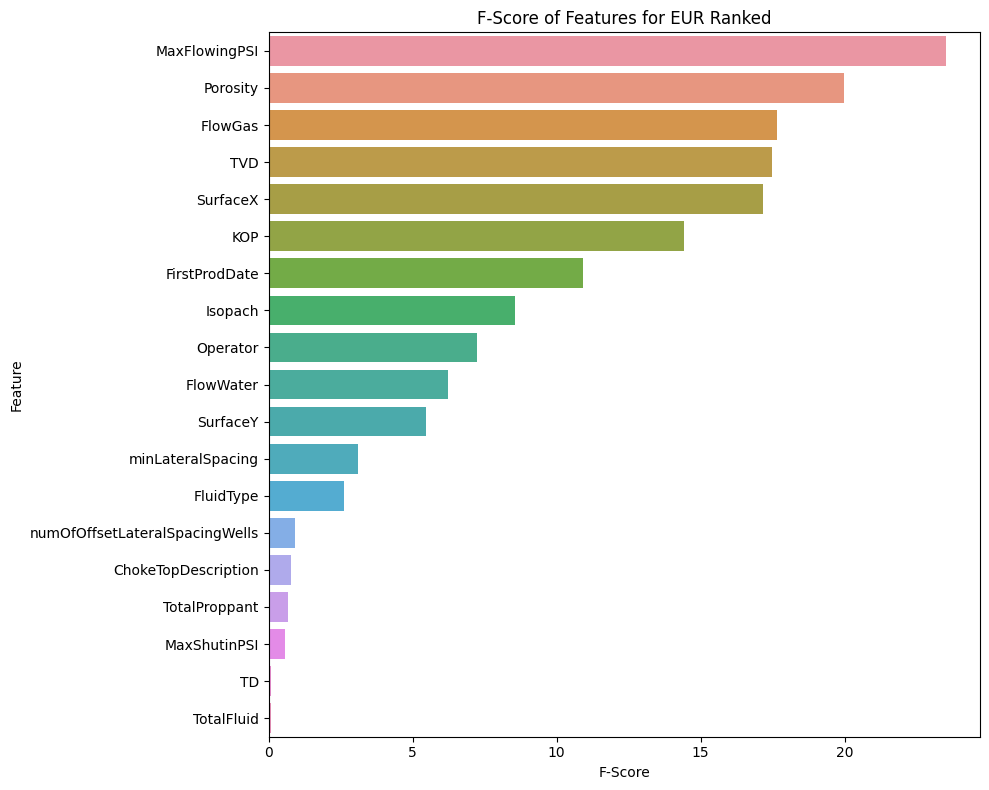

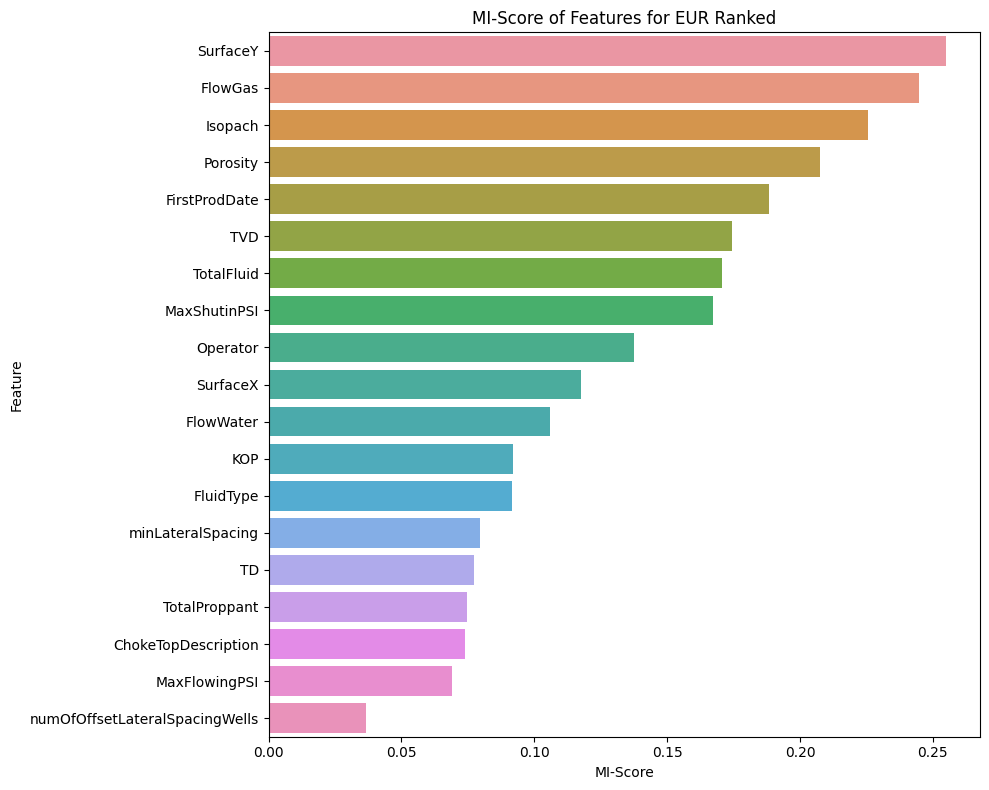

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
#sns.set(style="whitegrid")

# Plotting F-Score
plt.figure(figsize=(10, 8))
sns.barplot(x="F-Score", y="Feature", data=eur_f_score)
plt.title('F-Score of Features for EUR Ranked')
plt.tight_layout()

# Show plot
plt.show()

# Plotting MI-Score
plt.figure(figsize=(10, 8))
sns.barplot(x="MI-Score", y="Feature", data=eur_mi_score.sort_values(by='MI-Score', ascending=False))
plt.title('MI-Score of Features for EUR Ranked')
plt.tight_layout()

# Show plot
plt.show()


In [76]:
features = X_train_no_outliers.columns

scores_df_ip = pd.DataFrame({
    'Feature': features,
    'F-Score': F_ip,
    'P-Value': p_ip
})

ip_f_score = scores_df_ip.sort_values(by='F-Score', ascending=False)
ip_f_score['Rank_F'] = range(1, len(eur_f_score) + 1)
ip_f_score['Target'] = 'IP'

scores_df = pd.DataFrame({
    'Feature': features,
    'MI-Score': mi_eur
})

ip_mi_score = scores_df.sort_values(by='MI-Score', ascending=False)
ip_mi_score['Rank_MI'] = range(1, len(eur_mi_score) + 1)
ip_mi_score['Target'] = 'IP'

In [77]:
ip_f_score.head()

Feature     F-Score       P-Value  Rank_F Target
9               FlowGas  213.702579  4.450646e-28       1     IP
6   ChokeTopDescription  131.939921  7.396909e-21       2     IP
4         TotalProppant   57.457081  9.267934e-12       3     IP
1                    TD   54.367447  2.675513e-11       4     IP
10            FlowWater   13.499665  3.625792e-04       5     IP

In [78]:
ip_mi_score.head()

Feature  MI-Score  Rank_MI Target
12       SurfaceY  0.254983        1     IP
9         FlowGas  0.244619        2     IP
13        Isopach  0.225682        3     IP
14       Porosity  0.207625        4     IP
16  FirstProdDate  0.188330        5     IP

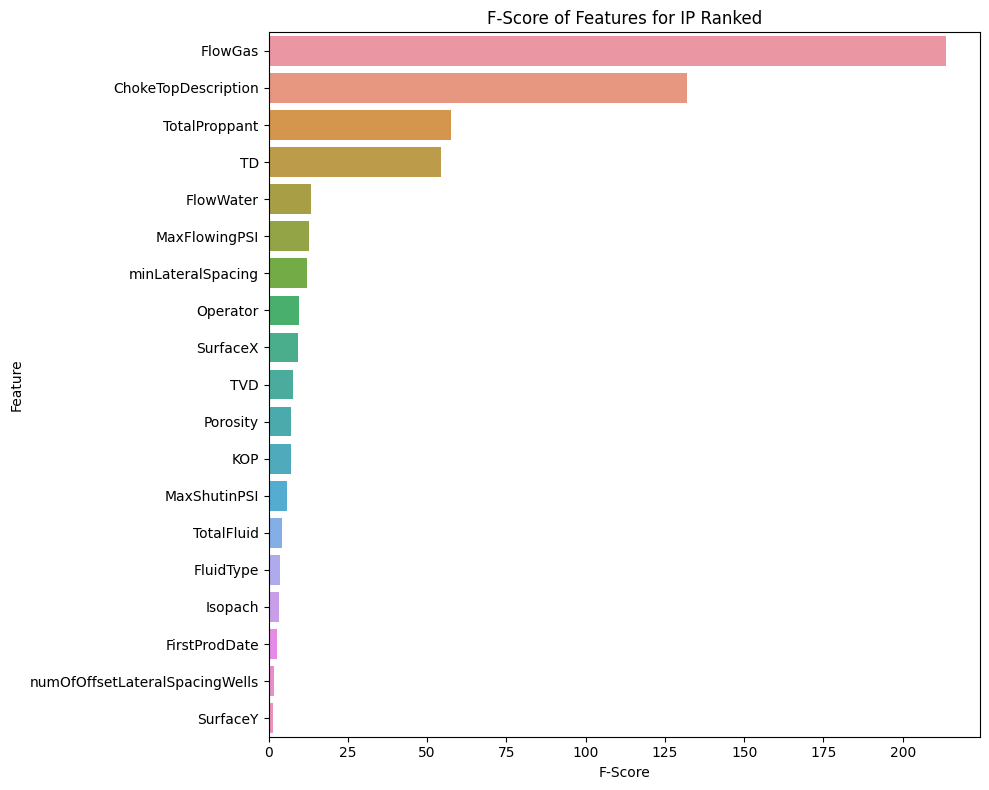

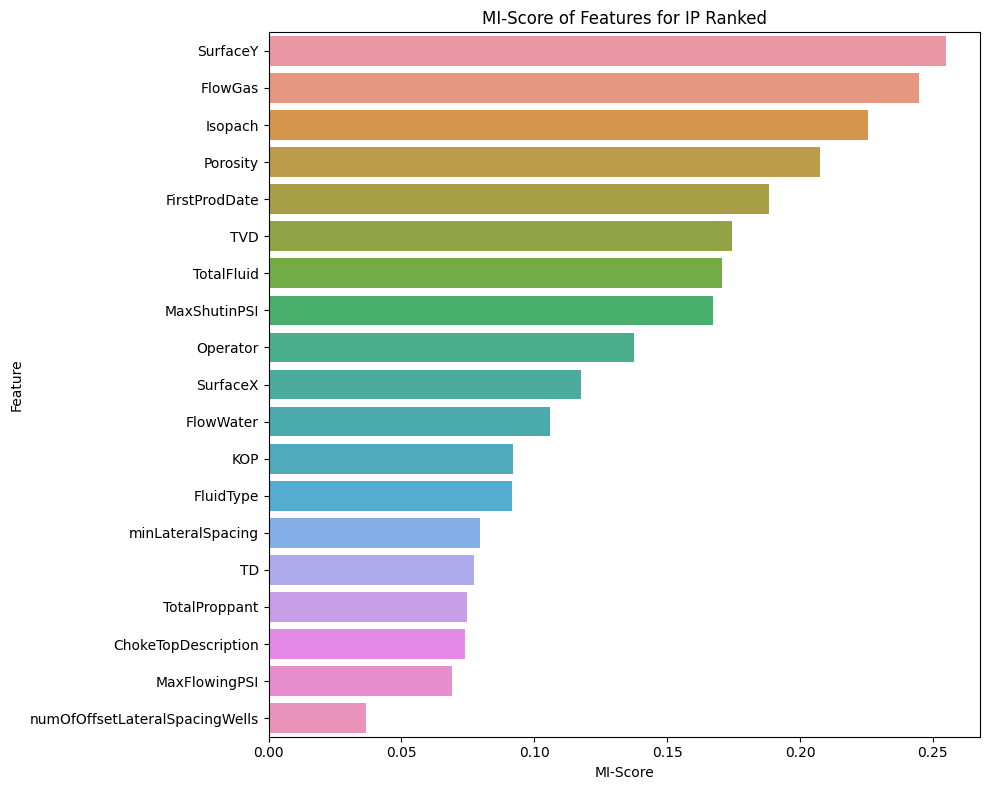

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
#sns.set(style="whitegrid")

# Plotting F-Score
plt.figure(figsize=(10, 8))
sns.barplot(x="F-Score", y="Feature", data=ip_f_score)
plt.title('F-Score of Features for IP Ranked')
plt.tight_layout()

# Show plot
plt.show()

# Plotting MI-Score
plt.figure(figsize=(10, 8))
sns.barplot(x="MI-Score", y="Feature", data=ip_mi_score.sort_values(by='MI-Score', ascending=False))
plt.title('MI-Score of Features for IP Ranked')
plt.tight_layout()

# Show plot
plt.show()

### Do the two techniques lead to similar feature ranking based on the strength of association between feature and target? Do the two target have similar associations with features? Provide your insights in few sentences in notebook.

#### Answer: 

As we can see from the 4 graphs above, when it comes to EUR, the f-score results show that MaxFlowingPSI, Porosity, FlowGas, TVD are the top features that have higher F-value and lower p-value while MI scores indicate that SurfaceY, FlowGas, Isopach, Porosity are the top features. From these 2 we can conclude that Porosity and FlowGas are a top feature to determine EUR.

However, there are some features which are found to have higher mi score but lower F-score. Isopach, KOP etc..

When it comes to IP, the f-score results show that FlowGas, ChokeTopDescription, TotalProppant, TD have higher F-score values. The rest of the features have significantly lower F-score values. However, MI scores indicate that the top features are SurfaceY, FlowGas, Isopach, Porosity and so on.

When we compare results of F-score and mi-score for IP, MI score shows significant features are important but F-score indicates only few features are needed to predict IP. The common features include FlowGas. It is also observed that SurfaceY which has a very high MI score is found to have a very low F-score.

In conclusion, there are a few common features which have MI-score and F-score for EUR and IP. There are some features which have high MI score and low F-score and vice versa.


In [80]:
combined = pd.merge(ip_f_score, ip_mi_score, on = 'Feature')

In [81]:
combined

Feature     F-Score       P-Value  Rank_F Target_x  \
0                          FlowGas  213.702579  4.450646e-28       1       IP   
1              ChokeTopDescription  131.939921  7.396909e-21       2       IP   
2                    TotalProppant   57.457081  9.267934e-12       3       IP   
3                               TD   54.367447  2.675513e-11       4       IP   
4                        FlowWater   13.499665  3.625792e-04       5       IP   
5                    MaxFlowingPSI   12.676973  5.378494e-04       6       IP   
6                minLateralSpacing   12.092818  7.133763e-04       7       IP   
7                         Operator    9.660147  2.368764e-03       8       IP   
8                         SurfaceX    9.422769  2.669117e-03       9       IP   
9                              TVD    7.806431  6.092764e-03      10       IP   
10                        Porosity    7.179098  8.448274e-03      11       IP   
11                             KOP    6.971798  9.420353e-03      12       IP   
12                    MaxShutinPSI    5.789078  1.770548e-02      13       IP   
13                      TotalFluid    4.223920  4.210340e-02      14       IP   
14                       FluidType    3.660037  5.819739e-02      15       IP   
15                         Isopach    3.351890  6.969465e-02      16       IP   
16                   FirstProdDate    2.610643  1.088653e-01      17       IP   
17  numOfOffsetLateralSpacingWells    1.854603  1.758879e-01      18       IP   
18                        SurfaceY    1.271942  2.617299e-01      19       IP   

    MI-Score  Rank_MI Target_y  
0   0.244619        2       IP  
1   0.073876       17       IP  
2   0.074632       16       IP  
3   0.077285       15       IP  
4   0.105960       11       IP  
5   0.069087       18       IP  
6   0.079408       14       IP  
7   0.137707        9       IP  
8   0.117634       10       IP  
9   0.174505        6       IP  
10  0.207625        4       IP  
11  0.091859       12       IP  
12  0.167149        8       IP  
13  0.170633        7       IP  
14  0.091513       13       IP  
15  0.225682        3       IP  
16  0.188330        5       IP  
17  0.036531       19       IP  
18  0.254983        1       IP

In [82]:
combined.drop('Target_y', axis =1, inplace = True)

In [83]:
combined = combined.rename({'Target_x': 'Target'}, axis=1)

In [84]:
combined.head()

Feature     F-Score       P-Value  Rank_F Target  MI-Score  \
0              FlowGas  213.702579  4.450646e-28       1     IP  0.244619   
1  ChokeTopDescription  131.939921  7.396909e-21       2     IP  0.073876   
2        TotalProppant   57.457081  9.267934e-12       3     IP  0.074632   
3                   TD   54.367447  2.675513e-11       4     IP  0.077285   
4            FlowWater   13.499665  3.625792e-04       5     IP  0.105960   

   Rank_MI  
0        2  
1       17  
2       16  
3       15  
4       11

In [85]:
X_train_s.shape

(118, 19)

In [86]:
X_train_s

array([[-2.68471934,  0.98246918,  0.66339277, ..., -1.07977685,
         1.89103275, -2.08893187],
       [-0.10913493, -1.15936682,  0.01906436, ..., -1.07977685,
        -0.94311741,  0.84552004],
       [ 1.17865727,  0.41345538, -0.18645418, ..., -1.07977685,
        -1.0123427 ,  0.84552004],
       ...,
       [ 1.17865727, -0.19903788, -1.62138095, ..., -0.2010619 ,
        -0.67523925, -0.62170591],
       [-0.10913493,  0.18660602,  2.49454447, ..., -1.9584918 ,
         1.16824087, -2.08893187],
       [-0.10913493, -0.7869558 ,  1.32438484, ..., -1.07977685,
         0.14276089,  0.84552004]])

In [87]:
X_train_no_outliers

Operator     TD    TVD  TotalFluid  TotalProppant  FluidType  \
65          0  18629  10540    183265.5     11552000.0          0   
67          2  15230  10192    158650.7      5390480.0          0   
31          3  17726  10081    143163.9     10048000.0          0   
12          2  14423   9806    131738.6      4146960.0          1   
41          2  14050  10259    115542.2      3862000.0          0   
..        ...    ...    ...         ...            ...        ...   
20          2  17202  10848    178530.5      6936100.0          1   
71          2  15144  10116    148832.3      5545120.0          0   
106         3  16754   9306    189705.3     13450000.0          0   
14          2  17366  11529    184862.0      5604470.0          1   
92          2  15821  10897    157154.0      5028420.0          0   

     ChokeTopDescription  MaxFlowingPSI  MaxShutinPSI  FlowGas  FlowWater  \
65               0.31250           5677    6332.00000    10096       53.0   
67               0.31250           4904    5035.00000     5855      395.0   
31               0.46875           4855    5850.00000    20351      783.0   
12               0.25000           4683    8087.81167     6502      234.0   
41               0.25000           3846    4093.00000     5735      278.0   
..                   ...            ...           ...      ...        ...   
20               0.28125           5255    5435.00000    10312      230.0   
71               0.25000           4978    5139.00000     7515      214.0   
106              0.46875           4238    4631.00000    19162      282.0   
14               0.25000           3884    4093.00000     6295      304.0   
92               0.25000           5155    5343.00000     6555      344.0   

        SurfaceX     SurfaceY  Isopach  Porosity          KOP  FirstProdDate  \
65   1689404.286  859472.0118       88    0.1009  3703.000000           2015   
67   1722814.660  891355.9303       58    0.0785  4878.500000           2015   
31   1627584.933  821415.9437      166    0.1189  3031.431467           2015   
12   1622542.457  805495.7506      159    0.1200  4498.000000           2014   
41   1644282.685  819977.0023      173    0.1200  1084.500000           2016   
..           ...          ...      ...       ...          ...            ...   
20   1702993.180  849138.1819       80    0.1001  4609.500000           2015   
71   1638382.139  811962.6562      161    0.1173  1116.000000           2015   
106  1611484.830  816054.9231      168    0.1100  4463.000000           2016   
14   1700074.772  818599.4852      135    0.0915  5463.000000           2014   
92   1704693.521  844623.1239       82    0.1003  5123.000000           2015   

     minLateralSpacing  numOfOffsetLateralSpacingWells  
65         1699.660220                               0  
67          975.579288                               2  
31          957.893313                               2  
12         1467.752020                               2  
41         1187.032412                               1  
..                 ...                             ...  
20         1330.354795                               2  
71         1414.773488                               1  
106        1044.017958                               1  
14         1514.998228                               0  
92         1253.004171                               2  

[118 rows x 19 columns]

##### From the below table we can observe that the features 'MaxFlowingPSI', 'Porosity','FlowGas', 'TVD' and 'SurfaceX' are most associated with the Target 'EUR' and are ranked in the order they are most associated based on the F-score

In [88]:
eur_f_score

Feature    F-Score   P-Value  Rank Target
7                    MaxFlowingPSI  23.524816  0.000004     1    EUR
14                        Porosity  19.990271  0.000018     2    EUR
9                          FlowGas  17.651718  0.000052     3    EUR
2                              TVD  17.487233  0.000056     4    EUR
11                        SurfaceX  17.151177  0.000066     5    EUR
15                             KOP  14.415486  0.000235     6    EUR
16                   FirstProdDate  10.927187  0.001261     7    EUR
13                         Isopach   8.540019  0.004177     8    EUR
0                         Operator   7.238715  0.008188     9    EUR
10                       FlowWater   6.224278  0.014009    10    EUR
12                        SurfaceY   5.474053  0.021011    11    EUR
17               minLateralSpacing   3.105781  0.080649    12    EUR
5                        FluidType   2.618670  0.108329    13    EUR
18  numOfOffsetLateralSpacingWells   0.927883  0.337417    14    EUR
6              ChokeTopDescription   0.773032  0.381098    15    EUR
4                    TotalProppant   0.675232  0.412919    16    EUR
8                     MaxShutinPSI   0.578246  0.448544    17    EUR
1                               TD   0.079235  0.778839    18    EUR
3                       TotalFluid   0.078916  0.779272    19    EUR

In [89]:
X_train_s.shape

(118, 19)

##### Filtering features based on threshold values for F-score, P-score and MI score

In [90]:
X_train_s_r_eur = X_train_s[:,((F_eur > 15) & (p_eur<0.001))| (mi_eur > 0.2)]
#X_train_s_r_eur = X_train_s[:, (F_eur > 20)]
X_train_s_r_eur3 = X_train_s3[:,((F_eur3 > 18) & (p_eur3<0.001))| (mi_eur3 > 0.2)]

X_train_s_r_eur4 = X_train_s4[:,((F_eur4 > 15) & (p_eur4<0.001))| (mi_eur4 > 0.2)]


In [91]:
X_train_s_r_eur4.shape

(56, 7)

In [92]:
X_train_s.shape

(118, 19)

In [93]:
X_test_s_r_eur = X_test_s[:,((F_eur > 15) & (p_eur<0.001))| (mi_eur > 0.2)]

In [94]:
X_test_s_r_eur.shape

(37, 7)

In [95]:
X_train_s.shape

(118, 19)

In [96]:
X_train_s_r_ip = X_train_s[:,((F_ip > 50) & (p_ip<0.001))| (mi_ip > 0.4)]

X_train_s_r_ip3 = X_train_s3[:,((F_ip3 > 50) & (p_ip3<0.001))| (mi_ip3 > 0.45)]

X_train_s_r_ip4 = X_train_s4[:,((F_ip4 > 20) & (p_ip4<0.001))| (mi_ip4 > 0.4)]

In [97]:
X_train_s_r_ip3.shape

(134, 7)

In [98]:
X_test_s_r_ip = X_test_s[:,((F_ip > 50) & (p_ip<0.001))| (mi_ip > 0.4)]

In [99]:
X_test_s_r_ip.shape

(37, 7)

## Task 4

### Joint Model or separate model

# Gradient Boosting

#### Gradient Boosting Model performance for targets 'EUR' and 'IP'


In [100]:
from sklearn.ensemble import GradientBoostingRegressor

In [101]:
grb = GradientBoostingRegressor(n_estimators=1000, max_depth=5, learning_rate=0.1, subsample = 0.8, max_features = 0.7, n_iter_no_change=50, loss='huber')

In [102]:
grb.fit(X_train_s_r_eur, y_train_no_outliers['EUR'])


GradientBoostingRegressor(loss='huber', max_depth=5, max_features=0.7,
                          n_estimators=1000, n_iter_no_change=50,
                          subsample=0.8)

In [103]:
from sklearn.metrics import r2_score

r2_score_gb_eur = r2_score(y_test['EUR'], grb.predict(X_test_s_r_eur))
print("R2 Score of GB for EUR ", r2_score_gb_eur)


R2 Score of GB for EUR  0.5780393364612131


In [104]:
grbip = GradientBoostingRegressor(n_estimators=1000, max_depth=5, learning_rate=0.1, subsample = 0.8, max_features = 0.7, n_iter_no_change=50, loss='huber')

In [105]:
grbip.fit(X_train_s_r_ip, y_train_no_outliers['IP'])


GradientBoostingRegressor(loss='huber', max_depth=5, max_features=0.7,
                          n_estimators=1000, n_iter_no_change=50,
                          subsample=0.8)

In [106]:
r2_score_gb_ip = r2_score(y_test['IP'], grbip.predict(X_test_s_r_ip))
print("R2 Score of GB for IP ", r2_score_gb_ip)


R2 Score of GB for IP  0.8158194250916136


#### Predicting EUR and IP together

In [107]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import GradientBoostingRegressor  # Import the GradientBoostingRegressor

...

params = {'n_estimators': 5000, 'max_depth': 4, 'min_samples_split': 2, 'min_samples_leaf': 2}

# Now you can use GradientBoostingRegressor directly without prefixing it with `ensemble`.
estimator = MultiOutputRegressor(GradientBoostingRegressor(**params))
estimator.fit(X_train_s, y_train_no_outliers)

MultiOutputRegressor(estimator=GradientBoostingRegressor(max_depth=4,
                                                         min_samples_leaf=2,
                                                         n_estimators=5000))

In [108]:
r2_score_xg_all = r2_score(y_test, estimator.predict(X_test_s))
print("R2 Score for XGBoost for predicting both IP and EUR together = ", r2_score_xg_all)

R2 Score for XGBoost for predicting both IP and EUR together =  0.6111411723433853


# KNN

#### KNN model performance for targets 'EUR' and 'IP'

In [109]:
from sklearn.neighbors import KNeighborsRegressor
kneighbor_regression = KNeighborsRegressor(n_neighbors=3, algorithm='auto', p=1, leaf_size=100)
kneighbor_regression.fit(X_train_s_r_eur, y_train_no_outliers['EUR'])

KNeighborsRegressor(leaf_size=100, n_neighbors=3, p=1)

In [110]:
r2_score_knn_eur = r2_score(y_test['EUR'], kneighbor_regression.predict(X_test_s_r_eur))
print("R2 Score with KNN for EUR =", r2_score_knn_eur)

R2 Score with KNN for EUR = 0.3665105845226888


In [111]:
from sklearn.neighbors import KNeighborsRegressor
kneighbor_regression = KNeighborsRegressor(n_neighbors=3, algorithm='auto', p=1, leaf_size=100)
kneighbor_regression.fit(X_train_s_r_ip, y_train_no_outliers['IP'])

KNeighborsRegressor(leaf_size=100, n_neighbors=3, p=1)

In [112]:
r2_score_knn_ip = r2_score(y_test['IP'], kneighbor_regression.predict(X_test_s_r_ip))
print("R2 Score with KNN for IP = ", r2_score_knn_ip)

R2 Score with KNN for IP =  0.8035679190748436


#### KNN for predicting EUR and IP jointly

In [113]:
from sklearn.neighbors import KNeighborsRegressor
kneighbor_regression_all = KNeighborsRegressor(n_neighbors=3, algorithm='auto', p=1, leaf_size=100)
kneighbor_regression_all.fit(X_train_s, y_train_no_outliers)

KNeighborsRegressor(leaf_size=100, n_neighbors=3, p=1)

In [114]:
r2_score_knn_joint = r2_score(y_test, kneighbor_regression_all.predict(X_test_s))
print("R2 Score of KNN for joint prediction = ", r2_score_knn_joint)

R2 Score of KNN for joint prediction =  0.6615378091410686


# Random Forest

#### Random Forest model performance for targets 'EUR' and 'IP'

In [115]:
from sklearn.ensemble import RandomForestRegressor

# Instantiate model with 300 decision trees
rf = RandomForestRegressor(n_estimators = 500,  max_features='sqrt')


# Train the model on training data
rf.fit(X_train_s_r_eur, y_train_no_outliers['EUR'])


RandomForestRegressor(max_features='sqrt', n_estimators=500)

In [116]:
rf_predictions = rf.predict(X_test_s_r_eur)

r2_score_rf = r2_score(y_test['EUR'], rf.predict(X_test_s_r_eur))
print("R2 Score with RF for EUR= ", r2_score_rf)



R2 Score with RF for EUR=  0.5371760035775213


In [117]:
rf = RandomForestRegressor(n_estimators = 1000)

# Train the model on training data
rf.fit(X_train_s_r_ip, y_train_no_outliers['IP'])

RandomForestRegressor(n_estimators=1000)

In [118]:
rf_predictions_ip = rf.predict(X_test_s_r_ip)

r2_score_rf_ip = r2_score(y_test['IP'], rf.predict(X_test_s_r_ip))
print("R2 Score with RF for IP =", r2_score_rf_ip)

R2 Score with RF for IP = 0.8412618723832325


#### Random Forest for predicting jointly

In [119]:
from sklearn.ensemble import RandomForestRegressor

# Instantiate model with 300 decision trees
rf_joint = RandomForestRegressor(n_estimators = 500)

# Train the model on training data
rf_joint.fit(X_train_s, y_train_no_outliers)

RandomForestRegressor(n_estimators=500)

In [120]:
rf_predictions_joint = rf_joint.predict(X_test_s)

r2_score_rf_all = r2_score(y_test, rf_joint.predict(X_test_s))
print("R2 Score of RF for joint prediction = ", r2_score_rf_all)

R2 Score of RF for joint prediction =  0.6573146398436094


# Linear Regression

#### Linear Regression model performance for targets 'EUR' and 'IP'

In [121]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression().fit(X_train_s_r_eur, y_train_no_outliers['EUR'])
train_eur_r2 = linear_reg.score(X_train_s_r_eur, y_train_no_outliers['EUR'])
test_eur_r2 = linear_reg.score(X_test_s_r_eur, y_test['EUR'])
print("R^2 on training set of EUR: %f" % train_eur_r2)
print("R^2 on test set of EUR: %f" % test_eur_r2)

R^2 on training set of EUR: 0.451012
R^2 on test set of EUR: 0.319028


In [122]:
linear_reg = LinearRegression().fit(X_train_s_r_ip, y_train_no_outliers['IP'])
train_ip_r2 = linear_reg.score(X_train_s_r_ip, y_train_no_outliers['IP'])
test_ip_r2 = linear_reg.score(X_test_s_r_ip, y_test['IP'])
print("R^2 on training set of IP: %f" % train_ip_r2)
print("R^2 on test set of IP: %f" % test_ip_r2)

R^2 on training set of IP: 0.777534
R^2 on test set of IP: 0.768627


#### Linear Regression for predicting EUR and IP Jointly

In [123]:
linear_reg_joint = LinearRegression().fit(X_train_s, y_train_no_outliers)

train_r2_joint_lr = linear_reg_joint.score(X_train_s, y_train_no_outliers)
test_r2_joint_lr = linear_reg_joint.score(X_test_s, y_test)

print("R^2 on training set of JOINT: %f" % train_r2_joint_lr)
print("R^2 on test set of JOINT: %f" % test_r2_joint_lr)

R^2 on training set of JOINT: 0.740265
R^2 on test set of JOINT: 0.459356


#### Comparing the performances of Seperate prediction vs Joint Prediction

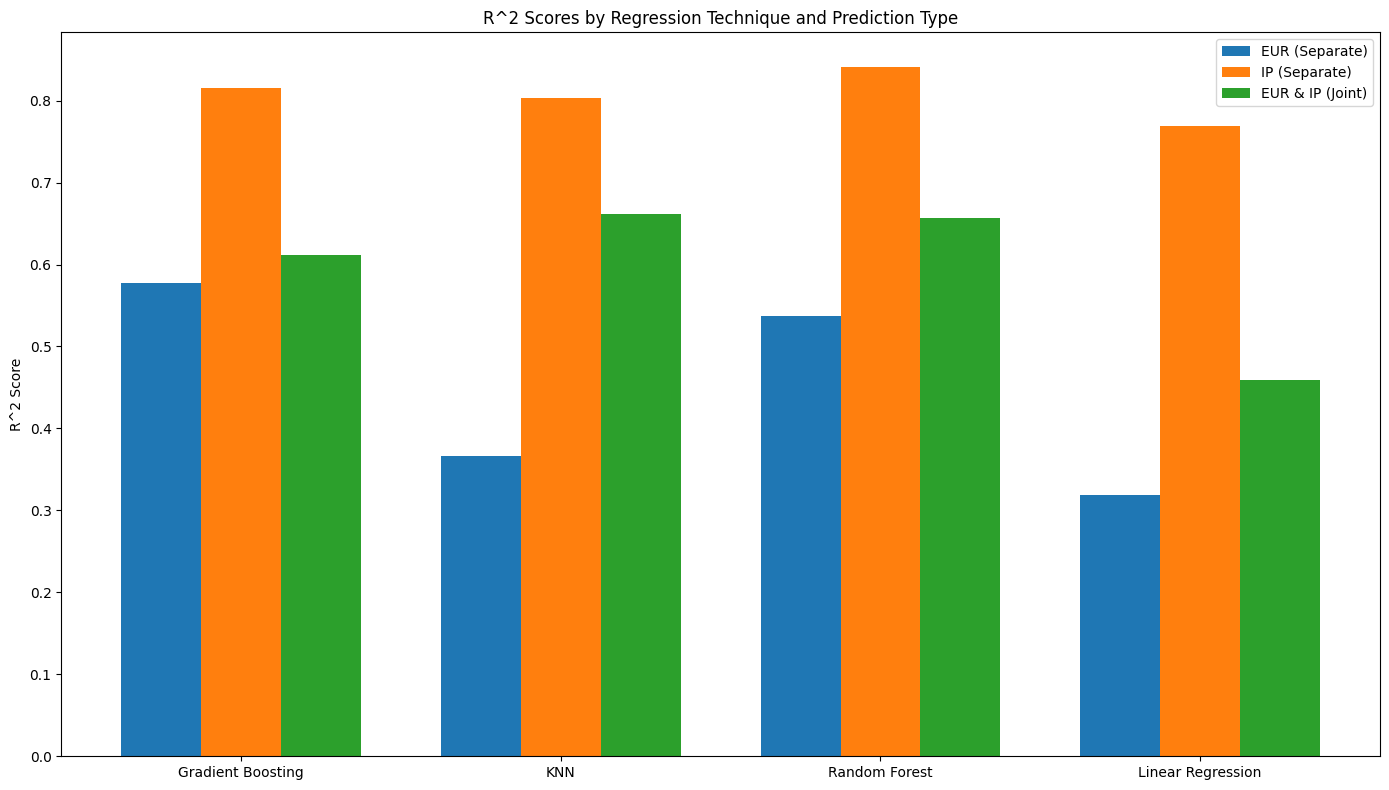

In [124]:
import matplotlib.pyplot as plt
import numpy as np

# Replace hardcoded scores with your variable names

# R2 scores for separate predictions
r2_scores_separate = {
    'Gradient Boosting': [r2_score_gb_eur, r2_score_gb_ip],  # EUR, IP
    'KNN': [r2_score_knn_eur, r2_score_knn_ip],  # Assuming the last KNN score for IP overwrites the first one for EUR
    'Random Forest': [r2_score_rf, r2_score_rf_ip],
    'Linear Regression': [test_eur_r2, test_ip_r2]
}

# R2 scores for joint predictions
r2_scores_joint = {
    'Gradient Boosting': [r2_score_xg_all],  # Joint
    'KNN': [r2_score_knn_joint],
    'Random Forest': [r2_score_rf_all],
    'Linear Regression': [linear_reg_joint.score(X_test_s, y_test)]
}

# Prepare data for bar plot
labels = list(r2_scores_separate.keys())
separate_EUR_scores = [scores[0] for scores in r2_scores_separate.values()]
separate_IP_scores = [scores[1] for scores in r2_scores_separate.values()]
joint_scores = [score[0] for score in r2_scores_joint.values()]

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(14, 8))
rects1 = ax.bar(x - width, separate_EUR_scores, width, label='EUR (Separate)')
rects2 = ax.bar(x, separate_IP_scores, width, label='IP (Separate)')
rects3 = ax.bar(x + width, joint_scores, width, label='EUR & IP (Joint)')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('R^2 Score')
ax.set_title('R^2 Scores by Regression Technique and Prediction Type')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


fig.tight_layout()

plt.show()


#### One joint model vs separate model

Answer:

As we can see from the above graph that compares the performance of 4 different models for joint and separate prediction, predicting IP separately has a very high R^2 score which indicates that it is a good model (>0.80). 
However, while observing the performance of the joint model that predicts EUR and IP, it gives a fair score but not as good for IP's individual model. 
Predicting EUR separately is giving a low R^2 score.
To decide whether a joint model is better than a separate model, we will recommend using a separate model for each feature as IP has a very good R^2 score and EUR has near equal score to the joint model (+/- 0.10). It is better to use a separate model instead of joint model while predicting EUR and IP.

## Task 6

### Important features for IP Prediction based on feature importance for gradient boosting and random forest

Note: Task 5 (Using IP as a feature for EUR) has been done at the end 

#### Feature Importance generated using optimized Gradient Boosting 

In [125]:
# Random Forest Feature Importances
rf_feature_importances_ip = rf.feature_importances_

# Gradient Boosting Feature Importances
gb_feature_importances_ip = grb.feature_importances_

features_selected_ip = features[((F_ip > 50) & (p_ip < 0.001)) | (mi_ip > 0.4)]

# Create DataFrame for Random Forest and Gradient Boosting Importances
importances_df = pd.DataFrame({
    'Feature': features_selected_ip,
    'RF_Importance': rf_feature_importances_ip,
    'GB_Importance': gb_feature_importances_ip
})

# Rank the features based on importance for both models
importances_df['RF_Rank'] = importances_df['RF_Importance'].rank(ascending=False)
importances_df['GB_Rank'] = importances_df['GB_Importance'].rank(ascending=False)

# Sort the DataFrame based on Random Forest importance for visualization
importances_df_sorted = importances_df.sort_values(by='RF_Importance', ascending=False)

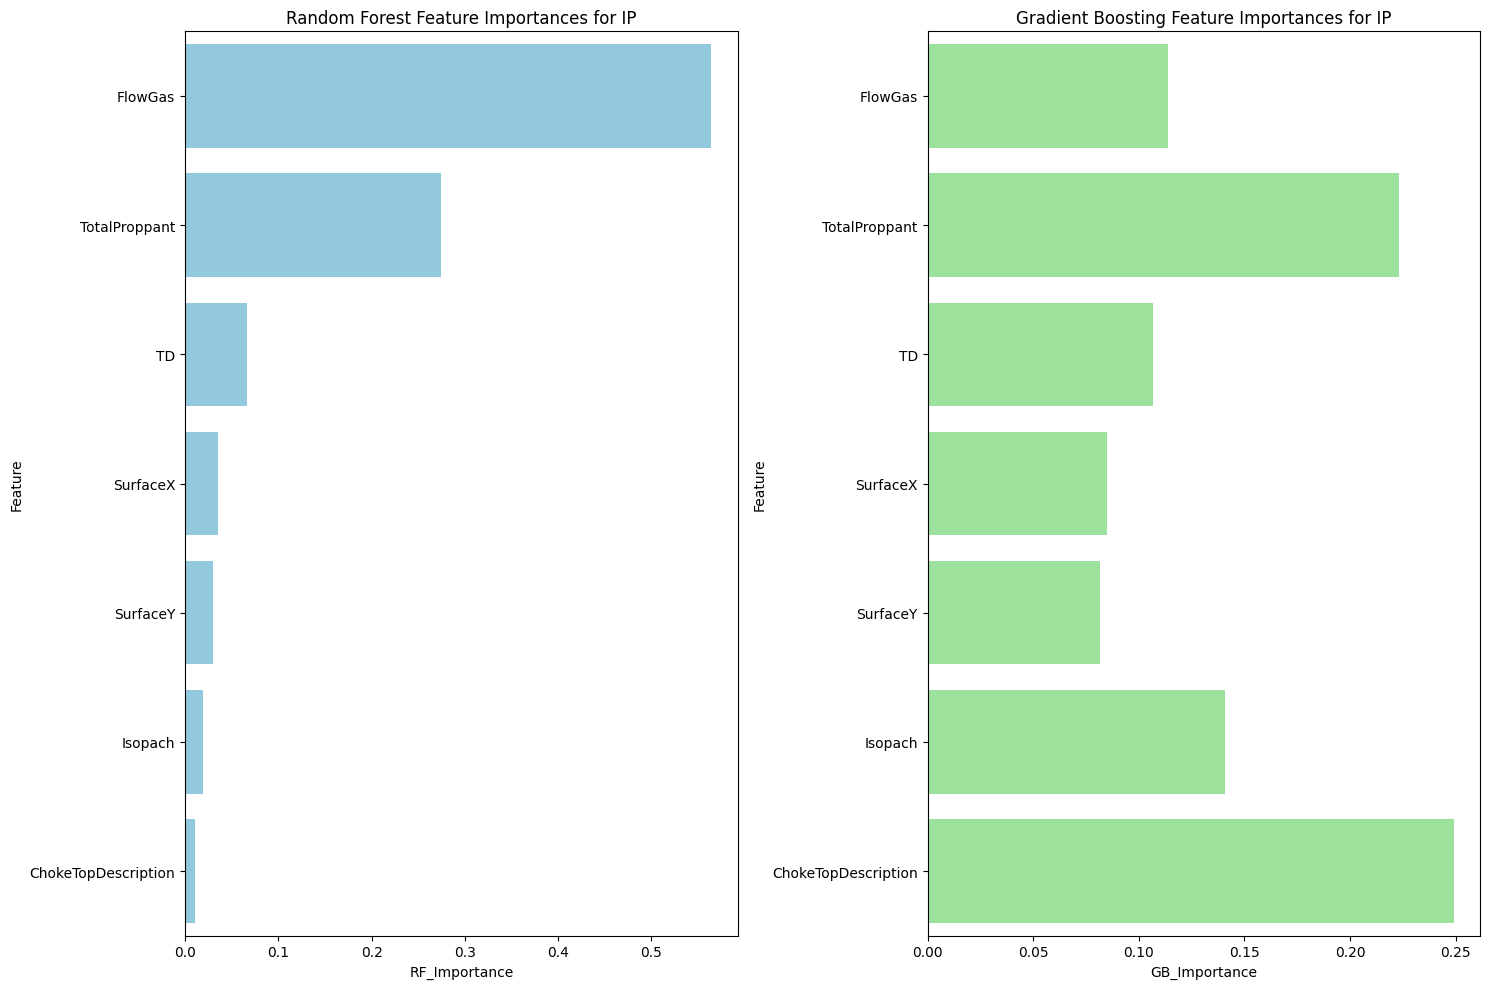

In [126]:
import matplotlib.pyplot as plt

# Setting up the matplotlib figure
plt.figure(figsize=(15, 10))

# Plotting Random Forest Importances
plt.subplot(1, 2, 1)
sns.barplot(x="RF_Importance", y="Feature", data=importances_df_sorted, color="skyblue")
plt.title("Random Forest Feature Importances for IP")

# Plotting Gradient Boosting Importances
plt.subplot(1, 2, 2)
sns.barplot(x="GB_Importance", y="Feature", data=importances_df_sorted, color="lightgreen")
plt.title("Gradient Boosting Feature Importances for IP")

plt.tight_layout()
plt.show()


#### Do the 2 techniques lead to a similar ranking in feature importance

Answer: As we can see from the above graph, we have ranked the feature importance for RF regressor and optimized GB. It can be observed that the ranking is not the same for both. RF has some specific features that are more important and the same features are less important in GB. FlowGas and TotalProppant have similar but interchanged rankings (rank 1 and rank 2) but the other features have significant difference in their positions.

To conclude, the techniques don't result in a similar ranking. 

## Task 7

### Comparing the ranking of optimized RF and optimized GB with the scores obtained using F-score and MI-score

In [127]:
importances_df_sorted

Feature  RF_Importance  GB_Importance  RF_Rank  GB_Rank
3              FlowGas       0.563995       0.113859      1.0      4.0
1        TotalProppant       0.274227       0.223127      2.0      2.0
0                   TD       0.066698       0.106906      3.0      5.0
4             SurfaceX       0.035313       0.084924      4.0      6.0
5             SurfaceY       0.029817       0.081512      5.0      7.0
6              Isopach       0.018735       0.140640      6.0      3.0
2  ChokeTopDescription       0.011214       0.249033      7.0      1.0

In [128]:
features_df = pd.merge(combined, importances_df_sorted, on = 'Feature')

In [129]:
features_df

Feature     F-Score       P-Value  Rank_F Target  MI-Score  \
0              FlowGas  213.702579  4.450646e-28       1     IP  0.244619   
1  ChokeTopDescription  131.939921  7.396909e-21       2     IP  0.073876   
2        TotalProppant   57.457081  9.267934e-12       3     IP  0.074632   
3                   TD   54.367447  2.675513e-11       4     IP  0.077285   
4             SurfaceX    9.422769  2.669117e-03       9     IP  0.117634   
5              Isopach    3.351890  6.969465e-02      16     IP  0.225682   
6             SurfaceY    1.271942  2.617299e-01      19     IP  0.254983   

   Rank_MI  RF_Importance  GB_Importance  RF_Rank  GB_Rank  
0        2       0.563995       0.113859      1.0      4.0  
1       17       0.011214       0.249033      7.0      1.0  
2       16       0.274227       0.223127      2.0      2.0  
3       15       0.066698       0.106906      3.0      5.0  
4       10       0.035313       0.084924      4.0      6.0  
5        3       0.018735       0.140640      6.0      3.0  
6        1       0.029817       0.081512      5.0      7.0

In [130]:
features_df = pd.DataFrame(features_selected_ip, columns=['Feature'])

features_df['RF_Importance'] = rf.feature_importances_
features_df['GB_Importance'] = grb.feature_importances_

features_df['RF_Rank'] = features_df['RF_Importance'].rank(ascending=False, method='min')
features_df['GB_Rank'] = features_df['GB_Importance'].rank(ascending=False, method='min')

# Assuming F_ip and mi_ip have been computed, incorporate their ranks into features_df. We have taken ranks of F Score and MI Score from previous code and using those ranks here
features_df['F_Score_Rank'] = pd.Series(F_ip).rank(ascending=False, method='min')
features_df['MI_Score_Rank'] = pd.Series(mi_ip).rank(ascending=False, method='min')


In [131]:
features_df

Feature  RF_Importance  GB_Importance  RF_Rank  GB_Rank  \
0                   TD       0.066698       0.106906      3.0      5.0   
1        TotalProppant       0.274227       0.223127      2.0      2.0   
2  ChokeTopDescription       0.011214       0.249033      7.0      1.0   
3              FlowGas       0.563995       0.113859      1.0      4.0   
4             SurfaceX       0.035313       0.084924      4.0      6.0   
5             SurfaceY       0.029817       0.081512      5.0      7.0   
6              Isopach       0.018735       0.140640      6.0      3.0   

   F_Score_Rank  MI_Score_Rank  
0           8.0           10.0  
1           4.0            7.0  
2          10.0            8.0  
3          14.0           11.0  
4           3.0            2.0  
5          15.0           17.0  
6           2.0            5.0

In [132]:
features_df

Feature  RF_Importance  GB_Importance  RF_Rank  GB_Rank  \
0                   TD       0.066698       0.106906      3.0      5.0   
1        TotalProppant       0.274227       0.223127      2.0      2.0   
2  ChokeTopDescription       0.011214       0.249033      7.0      1.0   
3              FlowGas       0.563995       0.113859      1.0      4.0   
4             SurfaceX       0.035313       0.084924      4.0      6.0   
5             SurfaceY       0.029817       0.081512      5.0      7.0   
6              Isopach       0.018735       0.140640      6.0      3.0   

   F_Score_Rank  MI_Score_Rank  
0           8.0           10.0  
1           4.0            7.0  
2          10.0            8.0  
3          14.0           11.0  
4           3.0            2.0  
5          15.0           17.0  
6           2.0            5.0

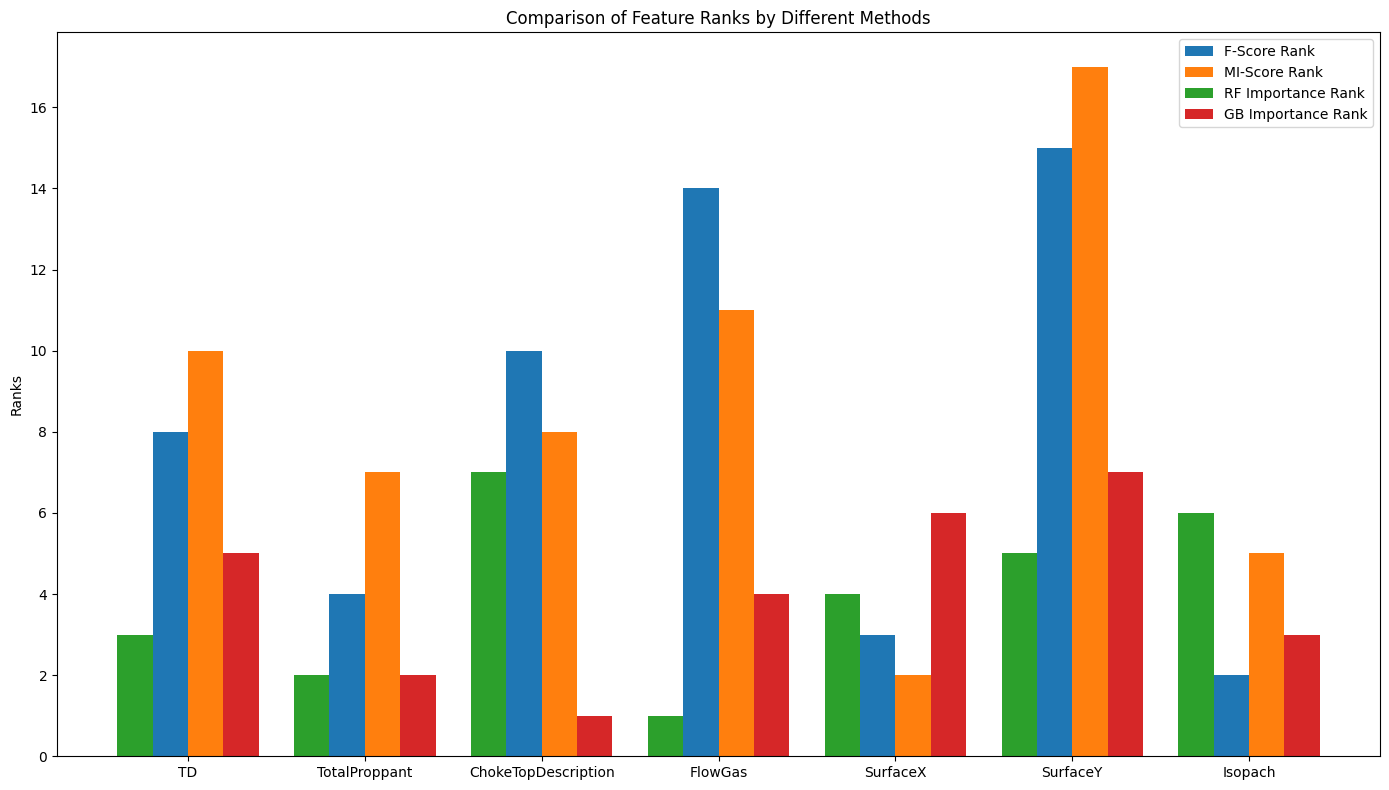

In [133]:
labels = features_df['Feature']
x = np.arange(len(labels))
width = 0.2

fig, ax = plt.subplots(figsize=(14, 8))
rects1 = ax.bar(x - width/2, features_df['F_Score_Rank'], width, label='F-Score Rank')
rects2 = ax.bar(x + width/2, features_df['MI_Score_Rank'], width, label='MI-Score Rank')
rects3 = ax.bar(x - 1.5*width, features_df['RF_Rank'], width, label='RF Importance Rank')
rects4 = ax.bar(x + 1.5*width, features_df['GB_Rank'], width, label='GB Importance Rank')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Ranks')
ax.set_title('Comparison of Feature Ranks by Different Methods')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


fig.tight_layout()
plt.show()

#### Comparing optimized RF and optimized GB with ranks based on F-score and MI-score

From the results obtained, we can observe that features like TD which ranks 3 in RF and 4 in GB has a rank 4 in F-score. But in MI the TD ranks 16. 
Similarly for FlowGas, it ranks 1 in RF and 3 in GB, but the rank based on F-score is 1 and the rank based on MI is 4.
Analyzing further, we can observe the ranking for features based on RF and GB. It is observed that the feature ranks obtained from RF and GB are similar to that obtained from F-score and MI-score.

#### Plotting feature importance of optimized RF and optimized GB models

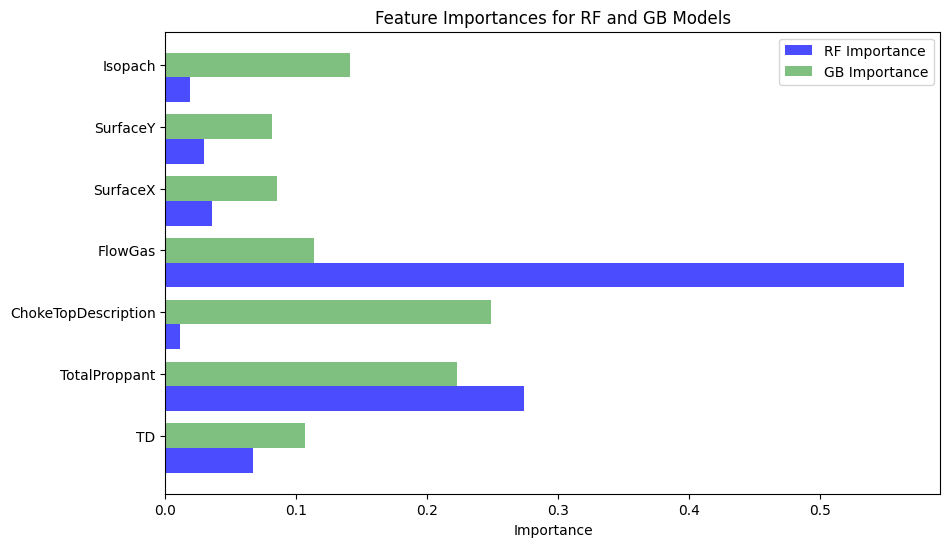

In [134]:
# Plotting bar graph for the feature importances only, from the sample dataframe features_df

plt.figure(figsize=(10, 6))
width = 0.4  # the width of the bars
r = range(len(features_df))

plt.barh(r, features_df['RF_Importance'], height=width, color='blue', alpha=0.7, label='RF Importance')
plt.barh([x + width for x in r], features_df['GB_Importance'], height=width, color='green', alpha=0.5, label='GB Importance')

plt.xlabel('Importance')
plt.title('Feature Importances for RF and GB Models')
plt.yticks([x + width for x in r], features_df['Feature'])
plt.legend()

plt.show()


#### Consolidated ranking of F-Score, MI Score from optimized Random forest model and optimized Gradient Boosting model

In [135]:
features_df

Feature  RF_Importance  GB_Importance  RF_Rank  GB_Rank  \
0                   TD       0.066698       0.106906      3.0      5.0   
1        TotalProppant       0.274227       0.223127      2.0      2.0   
2  ChokeTopDescription       0.011214       0.249033      7.0      1.0   
3              FlowGas       0.563995       0.113859      1.0      4.0   
4             SurfaceX       0.035313       0.084924      4.0      6.0   
5             SurfaceY       0.029817       0.081512      5.0      7.0   
6              Isopach       0.018735       0.140640      6.0      3.0   

   F_Score_Rank  MI_Score_Rank  
0           8.0           10.0  
1           4.0            7.0  
2          10.0            8.0  
3          14.0           11.0  
4           3.0            2.0  
5          15.0           17.0  
6           2.0            5.0

## Task 5

#### Using IP as a feature to predict EUR
Note : Replicating steps from Task 1, task 2 and Task 3 as we want the target to have only EUR and the features must have IP and other features

In [136]:
df_2 = pd.read_csv('Shale_Gas.csv')

In [137]:
df_2.head()

Operator     TD    TVD  TotalFluid  TotalProppant  TopPerf  BottomPerf  \
0        P  16098  10101    173409.2      6226000.0    10445       15916   
1        P  16927  10088    210602.0      7260000.0    10166       15916   
2        P  14511   9735    147372.7      4438660.0    10068       14300   
3        P  15161   9721    167104.9      5415940.0    10154       14945   
4        P  15153   9823    169611.9      5419180.0    10232       14905   

  FluidType  LateralLength  ChokeTopDescription  ...  Porosity  \
0      SLKW        4051.50              0.25000  ...    0.0819   
1      SLKW        4590.00              0.25000  ...    0.0819   
2      SLKW        3212.25              0.25000  ...    0.1200   
3      SLKW        3635.25              0.21875  ...    0.1200   
4      SLKW        3570.75              0.25000  ...    0.1200   

   TotalGasBCFPerSection  Temperature     Pressure     KOP  FirstProdDate  \
0                75.2214       280.40  8009.190909  1400.0           2016   
1                75.2214       280.40  8009.190909  4423.5           2016   
2               189.2644       266.64  7328.196000  4548.0           2014   
3               189.2644       266.64  7328.196000  4402.0           2014   
4               190.2331       267.68  7378.914909  4502.0           2014   

   minLateralSpacing  numOfOffsetLateralSpacingWells       EUR           IP  
0        2631.552728                               1  10500000  4311.304105  
1        1308.706458                               2   9800000  4174.570115  
2        1512.592043                               1  13800000  5208.021675  
3        1467.752020                               2  14800000  5596.057143  
4        1468.171250                               1  12300000  5024.213793  

[5 rows x 28 columns]

In [138]:
df_2.drop('FirstProdDate', axis =1, inplace = True)

In [139]:
df_2.isna().any(axis = 0)

Operator                          False
TD                                False
TVD                               False
TotalFluid                         True
TotalProppant                      True
TopPerf                           False
BottomPerf                        False
FluidType                          True
LateralLength                      True
ChokeTopDescription               False
MaxFlowingPSI                     False
MaxShutinPSI                       True
FlowGas                           False
FlowWater                          True
SurfaceX                          False
SurfaceY                          False
Z_BelowSurface                    False
Isopach                           False
Porosity                          False
TotalGasBCFPerSection             False
Temperature                       False
Pressure                          False
KOP                                True
minLateralSpacing                  True
numOfOffsetLateralSpacingWells    False


In [140]:
from sklearn.preprocessing import LabelEncoder

In [141]:
label_encoder=LabelEncoder()
df_2['Operator']=label_encoder.fit_transform(df_2['Operator'])

In [142]:
df_2['FluidType']=label_encoder.fit_transform(df_2['FluidType'])

In [143]:
df_2 = df_2.interpolate(method = 'spline', order =2)

C:\Users\Gopala Kala\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\interpolate\_fitpack2.py:298: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


In [144]:
df_2.isna().any(axis = 0)

Operator                          False
TD                                False
TVD                               False
TotalFluid                        False
TotalProppant                     False
TopPerf                           False
BottomPerf                        False
FluidType                         False
LateralLength                     False
ChokeTopDescription               False
MaxFlowingPSI                     False
MaxShutinPSI                      False
FlowGas                           False
FlowWater                         False
SurfaceX                          False
SurfaceY                          False
Z_BelowSurface                    False
Isopach                           False
Porosity                          False
TotalGasBCFPerSection             False
Temperature                       False
Pressure                          False
KOP                               False
minLateralSpacing                 False
numOfOffsetLateralSpacingWells    False


In [145]:
X_2 = df_2.drop(['EUR'], axis=1)
y_2 = df_2['EUR']

In [146]:
X_2.shape

(185, 26)

In [147]:
y_2.shape

(185,)

#### Train-Test data split 

In [148]:
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_2, y_2, test_size=.2, random_state = 42)

print("Training Features Shape", X_train2.shape)
print("Training Targets Shape", y_train2.shape)

Training Features Shape (148, 26)
Training Targets Shape (148,)


In [149]:
df_2.dtypes

Operator                            int32
TD                                  int64
TVD                                 int64
TotalFluid                        float64
TotalProppant                     float64
TopPerf                             int64
BottomPerf                          int64
FluidType                           int32
LateralLength                     float64
ChokeTopDescription               float64
MaxFlowingPSI                       int64
MaxShutinPSI                      float64
FlowGas                             int64
FlowWater                         float64
SurfaceX                          float64
SurfaceY                          float64
Z_BelowSurface                      int64
Isopach                             int64
Porosity                          float64
TotalGasBCFPerSection             float64
Temperature                       float64
Pressure                          float64
KOP                               float64
minLateralSpacing                 

#### Removing outliers based on Interquartile range method

In [150]:
def iqr_trimming(df, df_y, cols):
    # Initialize an array to collect the indices to drop
    drop_indices = np.array([])

    for col in cols:
        if df[col].dtype == 'float64' or df[col].dtype == 'int64':
            # Calculate Q1, Q3, and IQR
            q1 = df[col].quantile(0.25)
            q3 = df[col].quantile(0.75)
            iqr = q3 - q1
            # Define upper and lower bounds
            upper_whisker = q3 + (2 * iqr)
            lower_whisker = q1 - (2 * iqr)
            # Find the indexes of outliers
            outlier_indices = df[(df[col] > upper_whisker) | (df[col] < lower_whisker)].index
            # Append to the drop_indices array
            drop_indices = np.append(drop_indices, outlier_indices)

    # Get unique indices to drop
    unique_indices_to_drop = np.unique(drop_indices)

    # Drop the outliers from df and df_y
    df_trimmed = df.drop(unique_indices_to_drop)
    df_y_trimmed = df_y.drop(unique_indices_to_drop)

    return df_trimmed, df_y_trimmed

# Usage of the function
# Assuming 'columns' is a list of column names you want to check for outliers
columns = [col for col in X_train2.columns if X_train2[col].dtype in ['float64', 'int64']]
X_train_no_outliers2, y_train_no_outliers2 = iqr_trimming(X_train2, y_train2, columns)


In [151]:
y_train_no_outliers2

65      7300000
67      8000000
31     14800000
12      9600000
41      6600000
         ...   
20     11600000
71     11900000
106    14100000
14      7000000
92      6800000
Name: EUR, Length: 118, dtype: int64

In [152]:
corr_matrix2 = X_train_no_outliers2.corr(method = "pearson")

In [153]:
mask2 = np.zeros_like(corr_matrix2, dtype=np.bool)
mask2[np.triu_indices_from(mask2)] = True  ##  indices for the upper-triangle

mask2[10]

C:\Users\Gopala Kala\AppData\Local\Temp\ipykernel_13720\238895210.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask2 = np.zeros_like(corr_matrix2, dtype=np.bool)


array([False, False, False, False, False, False, False, False, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

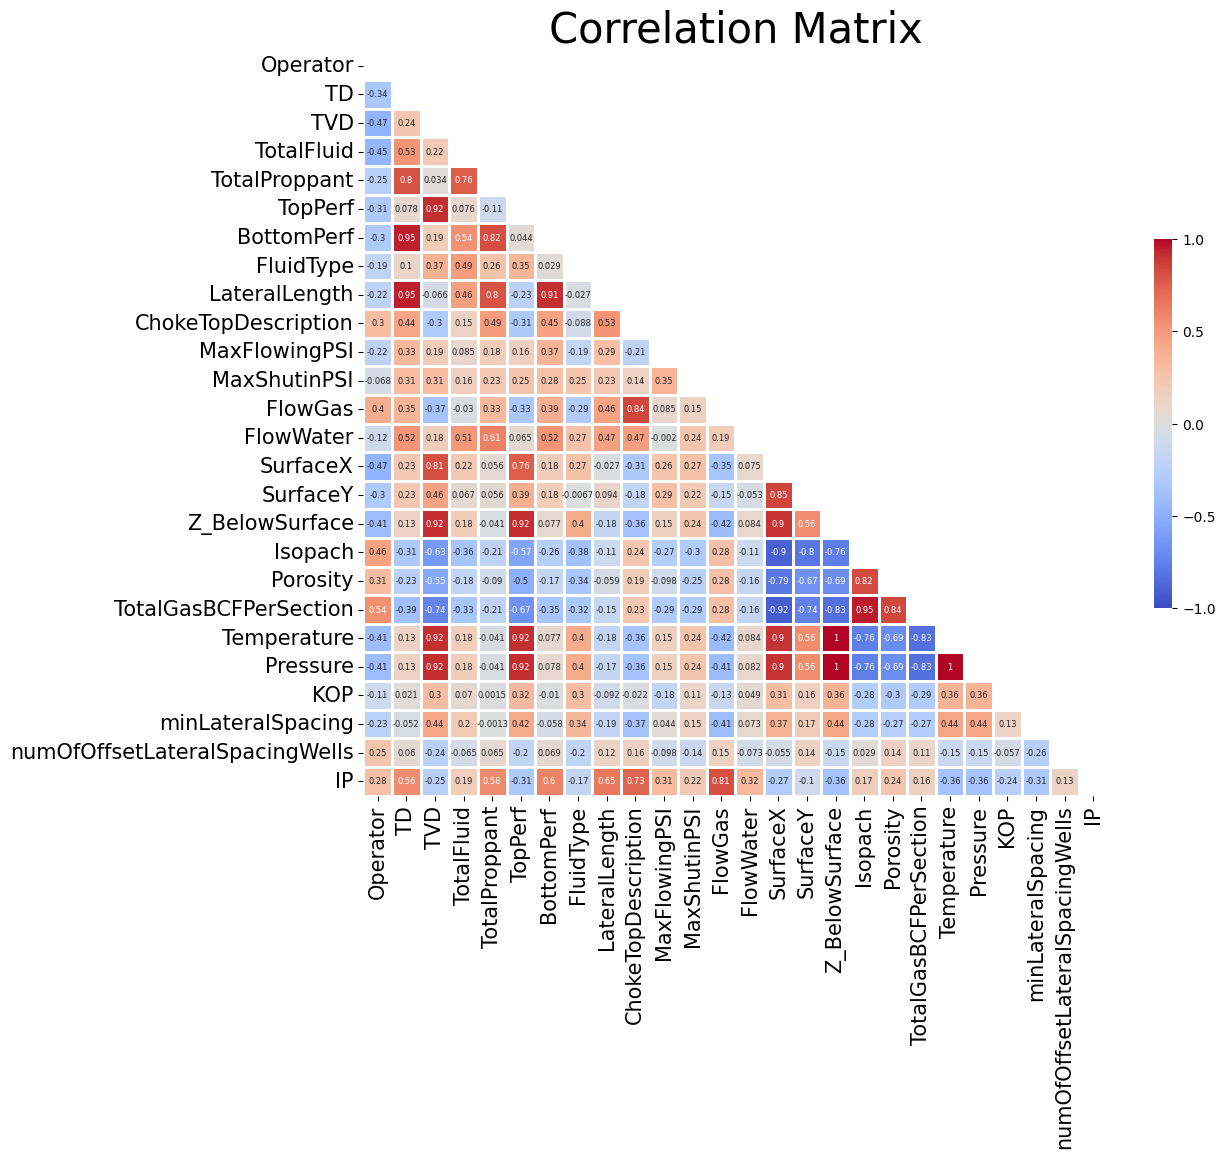

In [154]:
fig, ax = plt.subplots(figsize=(12, 12))

# Using Seaborn HeatMap
sns.heatmap(corr_matrix2, mask = mask2, square = True, linewidths = .8, cbar_kws = {'shrink': .4,  'ticks' : [-1, -.5, 0, 0.5, 1]},
            cmap = 'coolwarm', vmin = -1,  vmax = 1, annot = True, annot_kws = {'size': 6})

# Setting Axis Properties
ax.set_yticklabels(corr_matrix2.columns, rotation = 0, size = 15)
ax.set_xticklabels(corr_matrix2.columns, rotation = 90, size =15)
ax.set_title("Correlation Matrix", size = 30)

sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

In [155]:
upper2 = corr_matrix2.where(np.triu(np.ones(corr_matrix2.shape), k=1).astype(bool))

# Find features with correlation greater than 0.8
to_drop2 = [column for column in upper2.columns if any(upper2[column] > 0.90)]

In [156]:
to_drop2

['TopPerf',
 'BottomPerf',
 'LateralLength',
 'Z_BelowSurface',
 'TotalGasBCFPerSection',
 'Temperature',
 'Pressure']

In [157]:
X_train_no_outliers2.drop(to_drop2, axis=1, inplace=True)

#### Identifying correlation across features using Pearson method for correlation

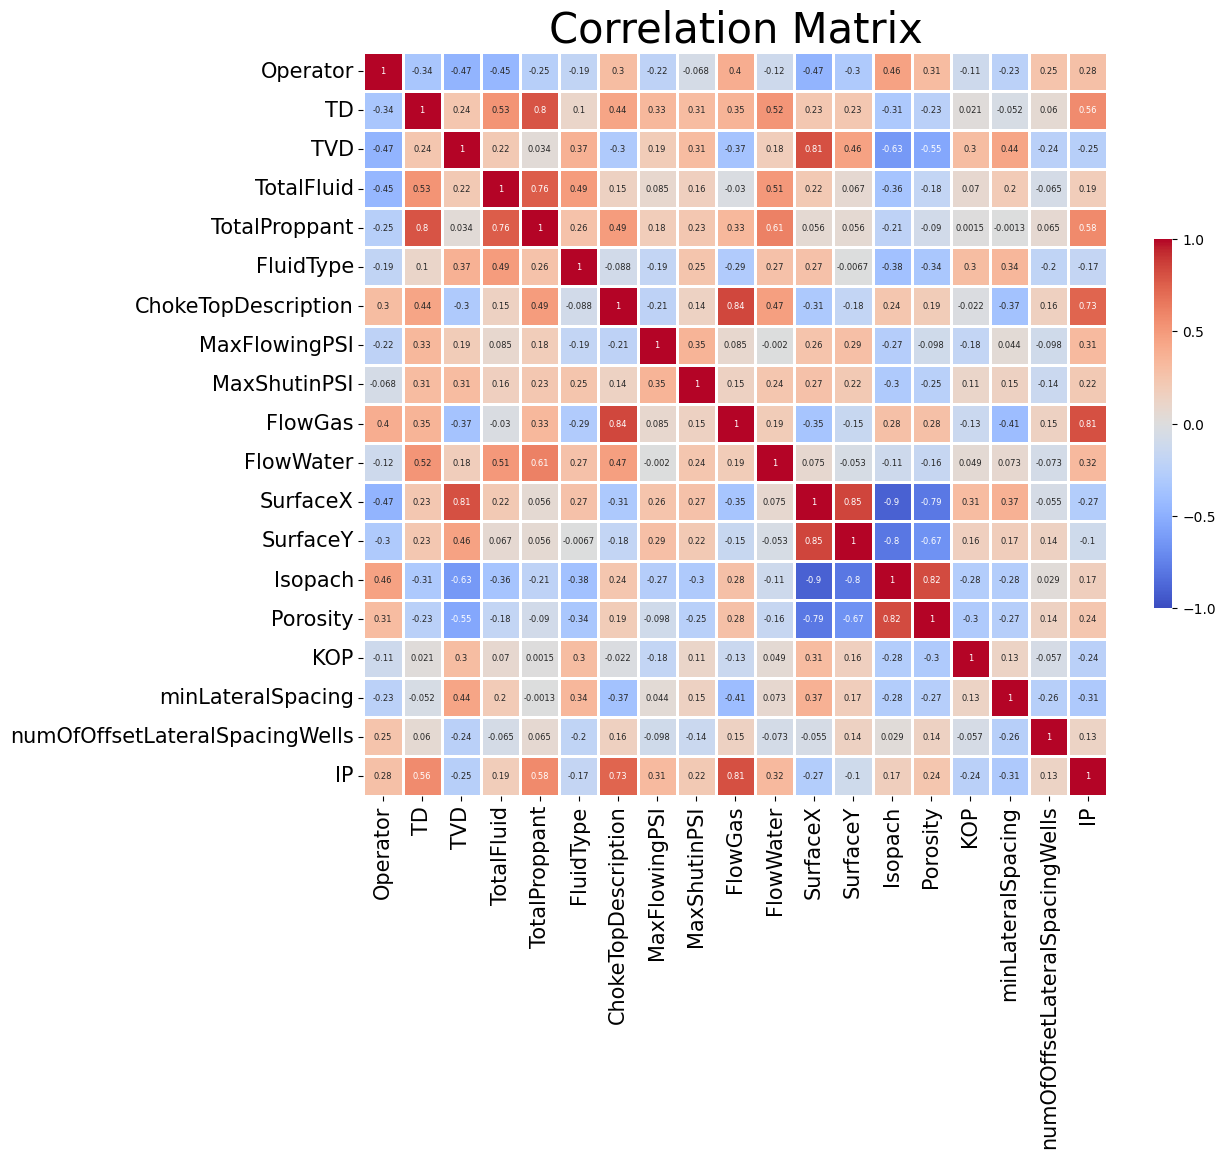

In [158]:
corr_matrix2 = X_train_no_outliers2.corr(method = "pearson")
fig, ax = plt.subplots(figsize=(12, 12))

# Using Seaborn HeatMap
sns.heatmap(corr_matrix2, square = True, linewidths = .8, cbar_kws = {'shrink': .4,  'ticks' : [-1, -.5, 0, 0.5, 1]},
            cmap = 'coolwarm', vmin = -1,  vmax = 1, annot = True, annot_kws = {'size': 6})

# Setting Axis Properties
ax.set_yticklabels(corr_matrix2.columns, rotation = 0, size = 15)
ax.set_xticklabels(corr_matrix2.columns, rotation = 90, size =15)
ax.set_title("Correlation Matrix", size = 30)

sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

In [159]:
X_test2.drop(to_drop2, axis=1, inplace=True)

In [160]:
X_test2.shape

(37, 19)

In [161]:
X_train_no_outliers2.shape

(118, 19)

In [162]:
y_train_no_outliers2.shape

(118,)

In [163]:
y_test2.shape

(37,)

In [164]:
from sklearn.preprocessing import StandardScaler

scl = StandardScaler()

X_train_s2 = scl.fit_transform(X_train_no_outliers2) ## fit and transform the train

X_test_s2 = scl.transform(X_test2)

In [165]:
from sklearn.feature_selection import f_regression, chi2
F2, p2 = f_regression(X_train_s2, y_train_no_outliers2)

In [166]:
from sklearn.feature_selection import mutual_info_regression
mi2 = mutual_info_regression(X_train_s2, y_train_no_outliers2)

Text(0.5, 0, 'features')

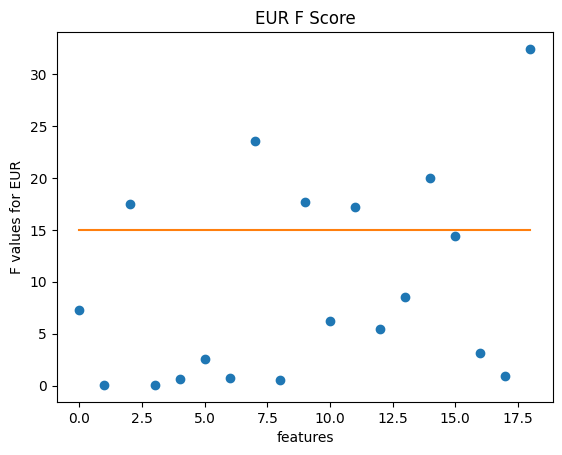

In [167]:
plt.figure()
plt.plot(F2, 'o')
plt.plot(15*np.ones(len(F2)))
plt.title('EUR F Score')
plt.ylabel('F values for EUR')
plt.xlabel('features')

Text(0.5, 0, 'features')

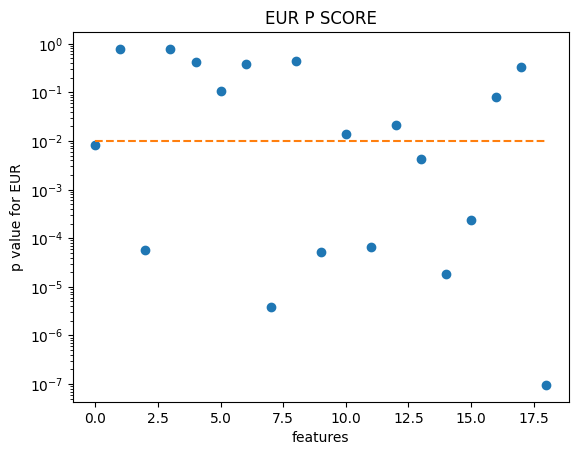

In [168]:
plt.figure()
plt.semilogy(p2, 'o')
plt.semilogy(0.01*np.ones(len(p2)), '--')
plt.title('EUR P SCORE')
plt.ylabel('p value for EUR')
plt.xlabel('features')

Text(0.5, 0, 'features')

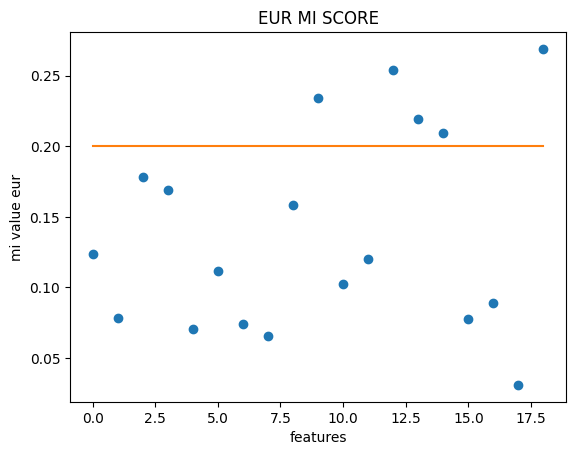

In [169]:
plt.figure()
plt.plot(mi2, 'o')
plt.plot(0.2*np.ones(len(mi2)))
plt.title('EUR MI SCORE')
plt.ylabel('mi value eur')
plt.xlabel('features')

In [170]:
features = X_train_no_outliers2.columns

scores_df = pd.DataFrame({
    'Feature': features,
    'F-Score': F2,
    'P-Value': p2
})

eur_f_score2 = scores_df.sort_values(by='F-Score', ascending=False)
eur_f_score2['Rank'] = range(1, len(eur_f_score2) + 1)
eur_f_score2['Target'] = 'EUR'

#### Ranking feaures based on F-score and P-score

In [171]:
eur_f_score2

Feature    F-Score       P-Value  Rank Target
18                              IP  32.398353  9.607020e-08     1    EUR
7                    MaxFlowingPSI  23.524816  3.868434e-06     2    EUR
14                        Porosity  19.990271  1.823837e-05     3    EUR
9                          FlowGas  17.651718  5.234508e-05     4    EUR
2                              TVD  17.487233  5.642593e-05     5    EUR
11                        SurfaceX  17.151177  6.580473e-05     6    EUR
15                             KOP  14.415486  2.348032e-04     7    EUR
13                         Isopach   8.540019  4.177396e-03     8    EUR
0                         Operator   7.238715  8.188462e-03     9    EUR
10                       FlowWater   6.224278  1.400853e-02    10    EUR
12                        SurfaceY   5.474053  2.101076e-02    11    EUR
16               minLateralSpacing   3.105781  8.064881e-02    12    EUR
5                        FluidType   2.618670  1.083288e-01    13    EUR
17  numOfOffsetLateralSpacingWells   0.927883  3.374175e-01    14    EUR
6              ChokeTopDescription   0.773032  3.810984e-01    15    EUR
4                    TotalProppant   0.675232  4.129192e-01    16    EUR
8                     MaxShutinPSI   0.578246  4.485436e-01    17    EUR
1                               TD   0.079235  7.788389e-01    18    EUR
3                       TotalFluid   0.078916  7.792724e-01    19    EUR

In [172]:
scores_df = pd.DataFrame({
    'Feature': features,
    'MI-Score': mi2
})

eur_mi_score2 = scores_df.sort_values(by='MI-Score', ascending=False)
eur_mi_score2['Rank'] = range(1, len(mi2) + 1)
eur_mi_score2['Target'] = 'EUR'

In [173]:
eur_mi_score2

Feature  MI-Score  Rank Target
18                              IP  0.268893     1    EUR
12                        SurfaceY  0.253940     2    EUR
9                          FlowGas  0.234051     3    EUR
13                         Isopach  0.219412     4    EUR
14                        Porosity  0.209495     5    EUR
2                              TVD  0.178056     6    EUR
3                       TotalFluid  0.169096     7    EUR
8                     MaxShutinPSI  0.158374     8    EUR
0                         Operator  0.123860     9    EUR
11                        SurfaceX  0.120242    10    EUR
5                        FluidType  0.111636    11    EUR
10                       FlowWater  0.102661    12    EUR
16               minLateralSpacing  0.088609    13    EUR
1                               TD  0.078241    14    EUR
15                             KOP  0.077524    15    EUR
6              ChokeTopDescription  0.073783    16    EUR
4                    TotalProppant  0.070757    17    EUR
7                    MaxFlowingPSI  0.065522    18    EUR
17  numOfOffsetLateralSpacingWells  0.030921    19    EUR

In [174]:
X_train_s_r_eur2 = X_train_s2[:,((F2 > 15) & (p2<0.01))| (mi2 > 0.2)]

In [175]:
X_train_s_r_eur2.shape

(118, 8)

In [176]:
X_test_s_r_eur2 = X_test_s2[:,((F2 > 15) & (p2<0.01))| (mi2 > 0.2)]

In [177]:
X_test_s_r_eur2.shape

(37, 8)

# Gradient Boosting

In [178]:
from sklearn.ensemble import GradientBoostingRegressor

In [179]:
grb_q2 = GradientBoostingRegressor(n_estimators=1000, max_depth=5, learning_rate=0.1, subsample = 0.8, max_features = 0.7, n_iter_no_change=50, loss='huber')

In [180]:
grb_q2.fit(X_train_s_r_eur2, y_train_no_outliers2)

GradientBoostingRegressor(loss='huber', max_depth=5, max_features=0.7,
                          n_estimators=1000, n_iter_no_change=50,
                          subsample=0.8)

In [181]:
X_test_s_r_eur2.shape

(37, 8)

In [182]:
r2_score_gb_eur2_q2 = r2_score(y_test2, grb_q2.predict(X_test_s_r_eur2))
print("R2 Score GB for EUR with IP ", r2_score_gb_eur2_q2)

R2 Score GB for EUR with IP  0.5638732828663989


# KNN

In [183]:
from sklearn.neighbors import KNeighborsRegressor
kneighbor_regression = KNeighborsRegressor(n_neighbors=3, algorithm='auto', p=1, leaf_size=100)
kneighbor_regression.fit(X_train_s_r_eur2, y_train_no_outliers2)

KNeighborsRegressor(leaf_size=100, n_neighbors=3, p=1)

In [184]:
r2_score_knn2 = r2_score(y_test2, kneighbor_regression.predict(X_test_s_r_eur2))
print("R2 Score with KNN for EUR with IP as a feature = ", r2_score_knn2)

R2 Score with KNN for EUR with IP as a feature =  0.5188727877715552


# Random Forest

In [185]:
from sklearn.ensemble import RandomForestRegressor

# Instantiate model with 300 decision trees
rf = RandomForestRegressor(n_estimators = 1000, max_features='sqrt')

# Train the model on training data
rf.fit(X_train_s_r_eur2, y_train_no_outliers2)

RandomForestRegressor(max_features='sqrt', n_estimators=1000)

In [186]:
rf_predictions2 = rf.predict(X_test_s_r_eur2)

r2_score_rf2 = r2_score(y_test2, rf.predict(X_test_s_r_eur2))
print("R2 Score with RF for EUR with IP as a feature = ", r2_score_rf2)

R2 Score with RF for EUR with IP as a feature =  0.5038073434277356


# Linear Regression

In [187]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression().fit(X_train_s_r_eur2, y_train_no_outliers2)

In [188]:
print("R^2 on training set: %f" % linear_reg.score(X_train_s_r_eur2, y_train_no_outliers2))
r2_score_lr2 = linear_reg.score(X_test_s_r_eur2, y_test2)
print("R^2 on test set: %f" % r2_score_lr2 )

R^2 on training set: 0.460863
R^2 on test set: 0.345597


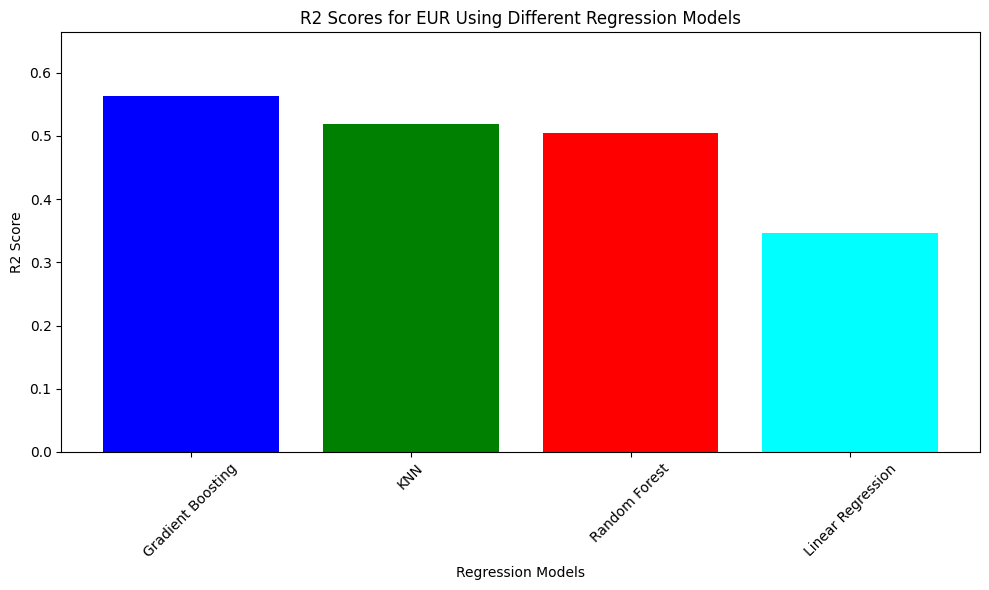

In [189]:
models = ['Gradient Boosting', 'KNN', 'Random Forest', 'Linear Regression']
# Corresponding R2 scores
r2_scores = [r2_score_gb_eur2_q2, r2_score_knn2, r2_score_rf2, r2_score_lr2]

# Plotting the bar graph
plt.figure(figsize=(10, 6))
bar_positions = np.arange(len(models))
plt.bar(bar_positions, r2_scores, color=['blue', 'green', 'red', 'cyan'])

plt.xlabel('Regression Models')
plt.ylabel('R2 Score')
plt.title('R2 Scores for EUR Using Different Regression Models')
plt.xticks(bar_positions, models, rotation=45)
plt.ylim(0, max(r2_scores) + 0.1)  # Setting y-limit a bit higher for visual aesthetics

plt.tight_layout()  # Adjust the layout to prevent clipping of tick-labels
plt.show()

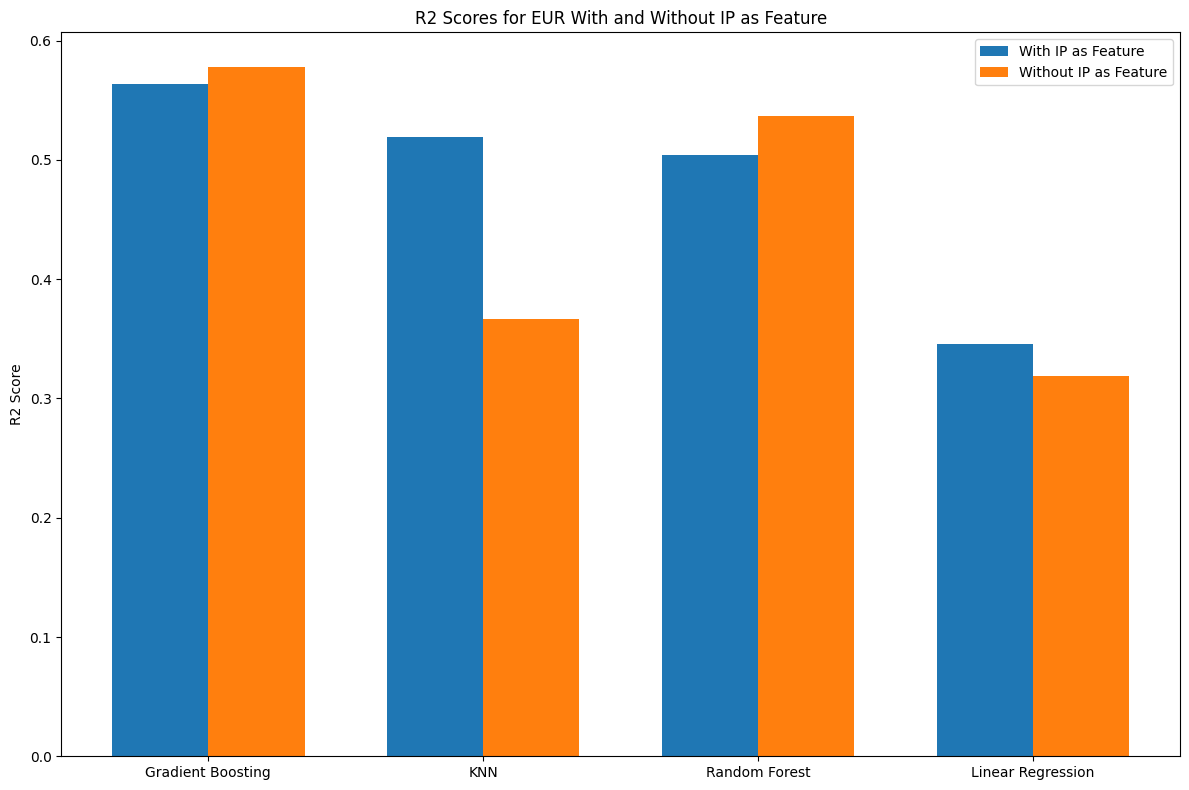

In [190]:
models = ['Gradient Boosting', 'KNN', 'Random Forest', 'Linear Regression']
# R2 scores for EUR with DR (from the user's output)
scores_with_ip = [r2_score_gb_eur2_q2, r2_score_knn2, r2_score_rf2, r2_score_lr2]
# R2 scores for EUR without IP (from the user's variables)
scores_without_ip = [r2_score_gb_eur, r2_score_knn_eur, r2_score_rf, test_eur_r2]

# Plotting the bar graph
x = np.arange(len(models))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 8))
rects1 = ax.bar(x - width/2, scores_with_ip, width, label='With IP as Feature')
rects2 = ax.bar(x + width/2, scores_without_ip, width, label='Without IP as Feature')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('R2 Score')
ax.set_title('R2 Scores for EUR With and Without IP as Feature')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()


fig.tight_layout()

plt.show()

#### Question: Should we use IP as a feature while predicting EUR?

Answer:
As we can see from the above graph, when IP is a feature, the R^2 score is compartively higher when compared to when IP is not used as a feature. R square value determines the performance of the model, so a higher R square indicates a better performing model and is better suited for prediction as it also indicates that error is less compared to a lower R square model. It is safe to conclude that it is safe to use IP as a feature when predicting EUR.

## Task 8

#### Effect of training dataset size on the generalization performance of the best regressor

The best regressor is Gradient Boosting as it has a better R2 score comapred to others

In [191]:
from sklearn.ensemble import GradientBoostingRegressor

grb = GradientBoostingRegressor(n_estimators=1000, max_depth=5, learning_rate=0.1, subsample = 0.8, max_features = 0.7, n_iter_no_change=50, loss='huber')
grb3 = GradientBoostingRegressor(n_estimators=1000, max_depth=5, learning_rate=0.1, subsample = 0.8, max_features = 0.7, n_iter_no_change=50, loss='huber')
grb4 = GradientBoostingRegressor(n_estimators=1000, max_depth=5, learning_rate=0.1, subsample = 0.8, max_features = 0.7, n_iter_no_change=50, loss='huber')

grb.fit(X_train_s_r_eur, y_train_no_outliers['EUR'])
grb3.fit(X_train_s_r_eur3, y_train_no_outliers3['EUR'])
grb4.fit(X_train_s_r_eur4, y_train_no_outliers4['EUR'])



from sklearn.metrics import r2_score
r2_score_gb_eur = r2_score(y_test['EUR'], grb.predict(X_test_s_r_eur))
print("R2 Score GB 80% Data Set for EUR", r2_score_gb_eur)

r2_score_gb_eur3 = r2_score(y_test['EUR'], grb3.predict(X_test_s_r_eur))
print("R2 Score GB 90% Data Set for EUR", r2_score_gb_eur3)

r2_score_gb_eur4 = r2_score(y_test['EUR'], grb4.predict(X_test_s_r_eur))
print("R2 Score GB 50% Data Set for EUR", r2_score_gb_eur4)

grbip = GradientBoostingRegressor(n_estimators=1000, max_depth=5, learning_rate=0.1, subsample = 0.8, max_features = 0.7, n_iter_no_change=50, loss='huber')
grbip3 = GradientBoostingRegressor(n_estimators=1000, max_depth=5, learning_rate=0.1, subsample = 0.8, max_features = 0.7, n_iter_no_change=50, loss='huber')
grbip4 = GradientBoostingRegressor(n_estimators=1000, max_depth=5, learning_rate=0.1, subsample = 0.8, max_features = 0.7, n_iter_no_change=50, loss='huber')

grbip.fit(X_train_s_r_ip, y_train_no_outliers['IP'])
grbip3.fit(X_train_s_r_ip3, y_train_no_outliers3['IP'])
grbip4.fit(X_train_s_r_ip4, y_train_no_outliers4['IP'])

r2_score_gb_ip = r2_score(y_test['IP'], grbip.predict(X_test_s_r_ip))
print("R2 Score GB 80% Data Set IP", r2_score_gb_ip)

r2_score_gb_ip3 = r2_score(y_test['IP'], grbip3.predict(X_test_s_r_ip))
print("R2 Score GB 90% Data Set IP", r2_score_gb_ip3)

r2_score_gb_ip4= r2_score(y_test['IP'], grbip4.predict(X_test_s_r_ip))
print("R2 Score GB 50% Data Set IP", r2_score_gb_ip4)

R2 Score GB 80% Data Set for EUR 0.5398109901178816
R2 Score GB 90% Data Set for EUR 0.5932788442553667
R2 Score GB 50% Data Set for EUR -0.13185957688993888
R2 Score GB 80% Data Set IP 0.8034587092939975
R2 Score GB 90% Data Set IP 0.8893993630241188
R2 Score GB 50% Data Set IP 0.05905446233337441


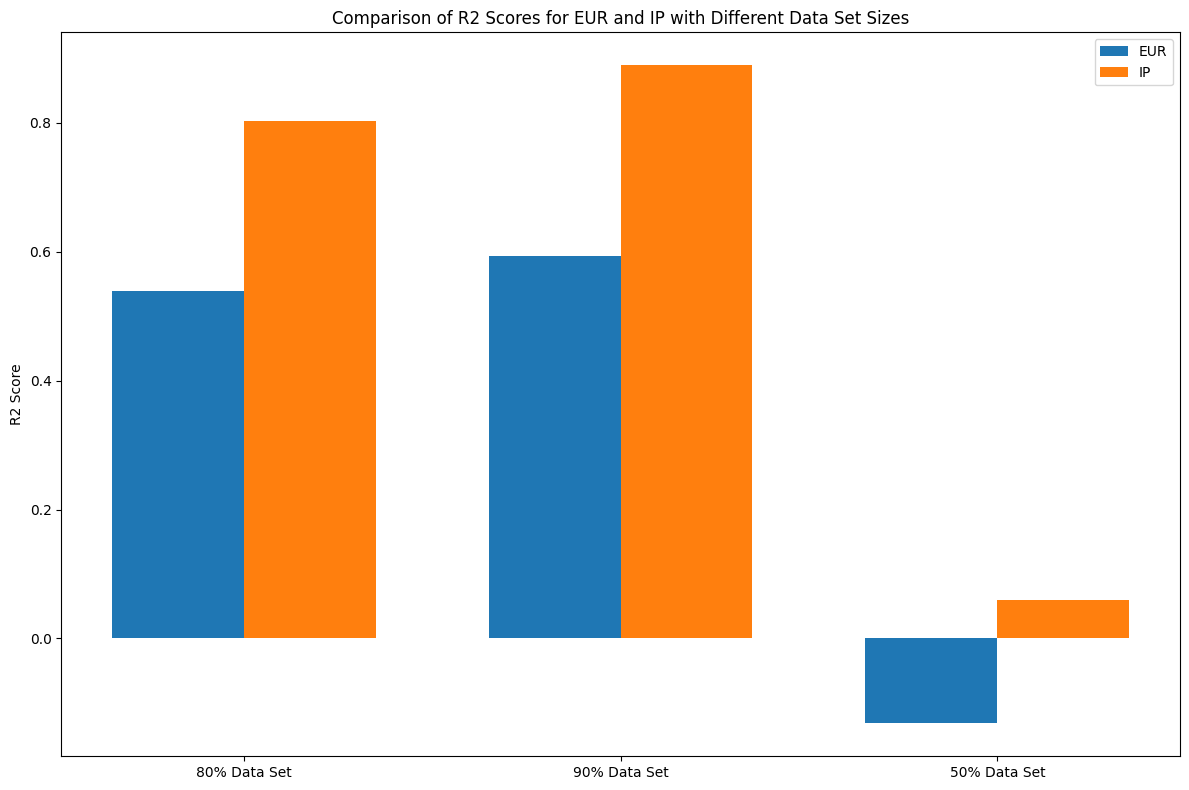

In [192]:
# Assuming the R^2 score variables are correctly assigned in your local environment, we can create a bar graph.
# We will compare the R^2 scores for EUR and IP with different data set sizes (80%, 90%, 50%).

# Names of the models/data set sizes
data_set_sizes = ['80% Data Set', '90% Data Set', '50% Data Set']
# R2 scores for EUR
r2_scores_eur = [r2_score_gb_eur, r2_score_gb_eur3, r2_score_gb_eur4]
# R2 scores for IP
r2_scores_ip = [r2_score_gb_ip, r2_score_gb_ip3, r2_score_gb_ip4]

# Plotting the bar graph
x = np.arange(len(data_set_sizes))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 8))
rects1 = ax.bar(x - width/2, r2_scores_eur, width, label='EUR')
rects2 = ax.bar(x + width/2, r2_scores_ip, width, label='IP')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('R2 Score')
ax.set_title('Comparison of R2 Scores for EUR and IP with Different Data Set Sizes')
ax.set_xticks(x)
ax.set_xticklabels(data_set_sizes)
ax.legend()


fig.tight_layout()

plt.show()


#### Insights

Answer

We have consideredf 20% of the data as test data and fed it to 3 different training set sizes like 50%, 80% and 90%. The data set with 90% training data had a better r2 score compared to the dataset with 50% and 80% training size data set.

This is because, the test data has been kept common across all the training dataset, the dataset with 90% training data might have already encountered few of the test cases in the model leading to a better r2 score. It has been trained across several data points resulting in improved model performance. On observing the performance of the data set with 50% training data, we can see that because the dataset is small, the model wouldn't have enough data to learn from. This resulted in lower r2 value and more errors in the model.  


## Task 9

In [193]:
### Exporting processors and regressors to use in predicting Shale_HO.csv 

In [194]:
import pickle

# Save Label Encoders
with open('label_encoder_operator.pkl', 'wb') as file:
    pickle.dump(label_encoder, file)

with open('label_encoder_fluidtype.pkl', 'wb') as file:
    pickle.dump(label_encoder, file)

# Save the columns to drop
with open('columns_to_drop.pkl', 'wb') as file:
    pickle.dump(to_drop, file)

# Save Scaler
with open('standard_scaler.pkl', 'wb') as file:
    pickle.dump(scl, file)

# Save the best models
with open('best_model_eur.pkl', 'wb') as file:
    pickle.dump(grb3, file)

   

interpolation_details = {
    'method': 'spline',
    'order': 2
}

with open('interpolation_details.pkl', 'wb') as file:
    pickle.dump(interpolation_details, file)

In [195]:
selected_features_indices_eur = np.where(((F_eur > 15) & (p_eur < 0.01)) | (mi_eur > 0.2))[0]

In [196]:
selected_features_indices_eur

array([ 2,  7,  9, 11, 12, 13, 14], dtype=int64)

In [197]:
with open('selected_features_indices_eur.pkl', 'wb') as file:
    pickle.dump(selected_features_indices_eur, file)

# END